In [1]:
import sys
import os
sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from reading_robot import load_data, describe_data, get_metadata, classify, st_tests, text2features, feature_analysis
import pandas as pd
import glob
import os
import re
import numpy as np

In [2]:
wdir = "/home/jose/Dropbox/Doktorarbeit/publications/201903 DHd/DATA/"

# Getting Data

In [3]:
from shutil import copyfile

copyfile("/home/jose/Dropbox/biblioteca/corpora/corde/corde_comp_low_7000.pqt", wdir+"corde_comp_low_7000.pqt")
copyfile("/home/jose/Dropbox/biblioteca/corpora/corde/corde_vocabulary_w_punct_7000.csv",  wdir+"corde_vocabulary_w_punct_7000.csv")
copyfile("/home/jose/Dropbox/biblioteca/corpora/corde/corde_comp_metadatos.csv",  wdir+"corde_comp_metadatos.csv")


'/home/jose/Dropbox/Doktorarbeit/publications/201903 DHd/DATA/corde_comp_metadatos.csv'

In [4]:
corde_freq = pd.read_parquet(wdir + "corde_comp_low_7000.pqt")
corde_freq.shape

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


(34152, 7000)

In [5]:
corde_freq.head()

token         de      se     una   para      la        ,      en      el  \
aazorin   2126.0   748.0   626.0  130.0  1560.0   3735.0  1274.0  1077.0   
abacca    4911.0   880.0   879.0  349.0  2808.0   6764.0  2075.0  1790.0   
abaddon   7327.0  2059.0  1395.0  808.0  4541.0  11181.0  3573.0  3594.0   
abadengo  5029.0   829.0   358.0  335.0  2155.0   7101.0  2156.0  2351.0   
abajo     1786.0   551.0   300.0  129.0  1117.0   2664.0   625.0   728.0   

token          y       a   ...     pasamos  veinticinco  vol   tam  vertical  \
aazorin   1700.0   980.0   ...         1.0          0.0  0.0   0.0       0.0   
abacca    2313.0  1284.0   ...         1.0          0.0  0.0   2.0       1.0   
abaddon   4248.0  2978.0   ...         1.0          2.0  0.0   0.0       2.0   
abadengo  1839.0  1286.0   ...         1.0          2.0  2.0  13.0       0.0   
abajo     1310.0   933.0   ...         1.0          3.0  0.0   0.0       0.0   

token      nº  pétalos  bsol  pereza  huellas  
aazorin   0.0      0.0   0.0     0.0      0.0  
abacca    0.0      0.0   0.0     0.0      0.0  
abaddon   1.0      0.0   0.0     0.0      0.0  
abadengo  0.0      0.0   0.0     0.0      0.0  
abajo     0.0      0.0   0.0     0.0      0.0  

[5 rows x 7000 columns]

In [6]:
corde_metadatos = pd.read_csv(wdir + "corde_comp_metadatos.csv", sep = "\t", index_col = 0)
corde_metadatos.shape

(34155, 17)

In [7]:
corde_metadatos.head()

archivo                                             titulo  \
0        defunsio                Defunsión de don Enrique de Villena   
1  docramirsub139  Concesión del derecho de usufructo de una casa...   
2   rosagentsub25  Romance [Rosa gentil. Tercera parte de romance...   
3   noticiersub11  Sin título [El Noticiero Universal. Diario ind...   
4        heclesia  Historia eclesiástica de España. Tomo I: El cr...   

                                            autor    pais fechacre  \
0  Marqués de Santillana (Íñigo López de Mendoza)  España     1434   
1                                         Anónimo  España     1094   
2                                         Anónimo  España     1573   
3                                         Anónimo  España     1899   
4                        García Villada, Zacarías  España     1929   

                                      tema   medio  formas  tokens  types  \
0           Verso lírico culto: Individual   Libro    1205    1404    680   
1           Derecho: Documentos notariales   Libro     382     409    218   
2  Verso lírico culto: En obras colectivas   Libro     351     388    203   
3                                   Prensa  Prensa      73      84     56   
4                          Religión: Otros   Libro  266259  323574  29245   

   prim_fecha  siglo continente matiz_fecha           prim_tema  \
0        1434     15     Europa         NaN  Verso lírico culto   
1        1094     11     Europa         NaN             Derecho   
2        1573     16     Europa         NaN  Verso lírico culto   
3        1899     19     Europa         NaN              Prensa   
4        1929     20     Europa         NaN            Religión   

             secund_tema abs_tema  
0             Individual    Verso  
1  Documentos notariales  Técnico  
2    En obras colectivas    Verso  
3                 Prensa  Técnico  
4                  Otros  Técnico

In [8]:
corde_metadatos.index = corde_metadatos["archivo"]

In [9]:
corde_metadatos = corde_metadatos.loc[corde_freq.index.tolist()].sort_values(by="archivo")
corde_metadatos.shape

(34152, 17)

In [10]:
for column in corde_freq.columns.tolist():
    corde_freq[column] = corde_freq[column] / corde_metadatos["tokens"]

In [11]:
corde_freq.head(3)

token          de        se       una      para        la         ,        en  \
aazorin  0.038273  0.013466  0.011269  0.002340  0.028083  0.067238  0.022935   
abacca   0.056551  0.010133  0.010122  0.004019  0.032335  0.077889  0.023894   
abaddon  0.041399  0.011634  0.007882  0.004565  0.025657  0.063174  0.020188   

token          el         y         a   ...      pasamos  veinticinco  vol  \
aazorin  0.019388  0.030604  0.017642   ...     0.000018     0.000000  0.0   
abacca   0.020612  0.026635  0.014785   ...     0.000012     0.000000  0.0   
abaddon  0.020307  0.024002  0.016826   ...     0.000006     0.000011  0.0   

token         tam  vertical        nº  pétalos  bsol  pereza  huellas  
aazorin  0.000000  0.000000  0.000000      0.0   0.0     0.0      0.0  
abacca   0.000023  0.000012  0.000000      0.0   0.0     0.0      0.0  
abaddon  0.000000  0.000011  0.000006      0.0   0.0     0.0      0.0  

[3 rows x 7000 columns]

In [12]:
corde_freq = corde_freq.reindex(corde_freq.median().sort_values(ascending=False).index, axis=1)

In [13]:
corde_freq.head(3)

token           ,        de         .       que        la         y        en  \
aazorin  0.067238  0.038273  0.050946  0.022467  0.028083  0.030604  0.022935   
abacca   0.077889  0.056551  0.036802  0.020796  0.032335  0.026635  0.023894   
abaddon  0.063174  0.041399  0.054818  0.030686  0.025657  0.024002  0.020188   

token          el         a       por    ...     prosiguió  consideraciones  \
aazorin  0.019388  0.017642  0.007579    ...      0.000000         0.000000   
abacca   0.020612  0.014785  0.010375    ...      0.000000         0.000023   
abaddon  0.020307  0.016826  0.008503    ...      0.000079         0.000011   

token       ganas  reacción   crónica  destierro  confesor  baxa  esteban  \
aazorin  0.000036  0.000054  0.000018        0.0  0.000000   0.0      0.0   
abacca   0.000000  0.000046  0.000000        0.0  0.000000   0.0      0.0   
abaddon  0.000068  0.000034  0.000028        0.0  0.000006   0.0      0.0   

token       turco  
aazorin  0.000000  
abacca   0.000000  
abaddon  0.000045  

[3 rows x 7000 columns]

In [14]:
corde_metadatos["archivo"].tolist() == corde_freq.sort_index().index.tolist()

True

In [15]:
corde_metadatos.loc[ (corde_metadatos["prim_fecha"] > 1470 ) & (corde_metadatos["tokens"] > 100 )].shape

(22441, 17)

In [16]:
corde_metadatos_500 = corde_metadatos.loc[(corde_metadatos["prim_fecha"] > 1470 ) & (corde_metadatos["tokens"] > 100 )].sort_values(by="archivo")
corde_metadatos_500.shape

(22441, 17)

In [17]:
corde_metadatos_500.tail(3)

archivo                                      titulo  \
archivo                                                          
zuniga      zuniga     Crónica burlesca del emperador Carlos V   
zunzuneg  zunzuneg          En torno a D. Pío Baroja y su obra   
zurita      zurita  Relación de los señores de la Nueva España   

                                autor    pais     fechacre  \
archivo                                                      
zuniga             Zúñiga, Francés de  España  1525   1529   
zunzuneg  Zunzunegui, Juan Antonio de  España         1960   
zurita              Zurita, Alonso de  España       a 1585   

                                           tema  medio  formas  tokens  types  \
archivo                                                                         
zuniga    Historia y documentos: Historiografía  Libro   42762   49214   7306   
zunzuneg   Prosa didáctica: Oratoria y discurso  Libro    9089   10671   2720   
zurita                                      NaN  Libro   60354   67991   6441   

          prim_fecha  siglo continente matiz_fecha              prim_tema  \
archivo                                                                     
zuniga          1525     16     Europa         NaN  Historia y documentos   
zunzuneg        1960     20     Europa         NaN        Prosa didáctica   
zurita          1585     16     Europa           a                    NaN   

                  secund_tema abs_tema  
archivo                                 
zuniga         Historiografía  Técnico  
zunzuneg  Oratoria y discurso  Técnico  
zurita                    NaN  Técnico

In [18]:
corde_freq_500 = corde_freq.loc[corde_metadatos_500["archivo"]].sort_index()
corde_freq_500.shape

(22441, 7000)

In [19]:
corde_freq_500.tail(3)

token            ,        de         .       que        la         y  \
zuniga    0.064026  0.066770  0.023042  0.031515  0.019852  0.054923   
zunzuneg  0.057258  0.056227  0.052385  0.021366  0.030831  0.034486   
zurita    0.074275  0.039432  0.024915  0.045138  0.017502  0.064788   

token           en        el         a       por    ...     prosiguió  \
zuniga    0.017373  0.022209  0.019141  0.009753    ...           0.0   
zunzuneg  0.025490  0.022866  0.013776  0.006185    ...           0.0   
zurita    0.023091  0.011340  0.019385  0.009972    ...           0.0   

token     consideraciones  ganas  reacción  crónica  destierro  confesor  \
zuniga           0.000000    0.0       0.0  0.00002        0.0  0.000183   
zunzuneg         0.000000    0.0       0.0  0.00000        0.0  0.000000   
zurita           0.000015    0.0       0.0  0.00000        0.0  0.000000   

token     baxa  esteban     turco  
zuniga     0.0  0.00002  0.000366  
zunzuneg   0.0  0.00000  0.000000  
zurita     0.0  0.00000  0.000000  

[3 rows x 7000 columns]

In [20]:
corde_metadatos_500["archivo"].tolist() == corde_freq_500.index.tolist()

True

In [21]:
corde_metadatos_500["model_tema"] = corde_metadatos_500["prim_tema"]

In [22]:
important_secondary_themes = ["Novela y otras formas similares", "Autobiografía", "Biografía", "Cartas y relaciones", ""]

In [23]:
for important_secondary_theme in important_secondary_themes:
    corde_metadatos_500.loc[corde_metadatos_500["secund_tema"] == important_secondary_theme, ["model_tema"]] = important_secondary_theme

In [24]:
corde_metadatos_500.head()

archivo                                             titulo  \
archivo                                                                 
aazorin    aazorin                                     Antonio Azorín   
abacca      abacca                             Invitación a filosofar   
abaddon    abaddon                            Abaddón el exterminador   
abadengo  abadengo  El Abadengo de Sahagún. Contribución al estudi...   
abajo        abajo                                       Los de abajo   

                                autor       pais     fechacre  \
archivo                                                         
aazorin   Azorín (José Martínez Ruiz)     España         1903   
abacca       García Bacca, Juan David     España  1940   1942   
abaddon               Sábato, Ernesto  Argentina         1974   
abadengo        Puyol y Alonso, Julio     España         1915   
abajo                 Azuela, Mariano     México         1916   

                                                       tema  medio  formas  \
archivo                                                                      
aazorin   Prosa narrativa extensa: Novela y otras formas...  Libro   46506   
abacca    ciencias sociales y humanidades: Filosofía y é...  Libro   72409   
abaddon   Prosa narrativa extensa: Novela y otras formas...  Libro  151432   
abadengo               Prosa didáctica: Oratoria y discurso  Libro   77110   
abajo     Prosa narrativa extensa: Novela y otras formas...  Libro   35183   

          tokens  types  prim_fecha  siglo continente matiz_fecha  \
archivo                                                             
aazorin    55549   9088        1903     20     Europa         NaN   
abacca     86842   7569        1940     20     Europa         NaN   
abaddon   176986  20650        1974     20    América         NaN   
abadengo   93321  13484        1915     20     Europa         NaN   
abajo      44511   7423        1916     20    América         NaN   

                                prim_tema                      secund_tema  \
archivo                                                                      
aazorin           Prosa narrativa extensa  Novela y otras formas similares   
abacca    Ciencias sociales y humanidades                Filosofía y ética   
abaddon           Prosa narrativa extensa  Novela y otras formas similares   
abadengo                  Prosa didáctica              Oratoria y discurso   
abajo             Prosa narrativa extensa  Novela y otras formas similares   

         abs_tema                       model_tema  
archivo                                             
aazorin     Prosa  Novela y otras formas similares  
abacca    Técnico  Ciencias sociales y humanidades  
abaddon     Prosa  Novela y otras formas similares  
abadengo  Técnico                  Prosa didáctica  
abajo       Prosa  Novela y otras formas similares

In [25]:
corde_metadatos_500["model_tema"] = corde_metadatos_500["model_tema"].fillna("?")

In [26]:
for column in pd.get_dummies(corde_metadatos_500["model_tema"]):
    corde_metadatos_500[column] = pd.get_dummies(corde_metadatos_500["model_tema"])[column].astype(str)

In [27]:
corde_metadatos_500.tail(5)

archivo                                      titulo  \
archivo                                                          
zozobra    zozobra                                     Zozobra   
zumalaca  zumalaca                              Zumalacárregui   
zuniga      zuniga     Crónica burlesca del emperador Carlos V   
zunzuneg  zunzuneg          En torno a D. Pío Baroja y su obra   
zurita      zurita  Relación de los señores de la Nueva España   

                                autor    pais     fechacre  \
archivo                                                      
zozobra          López Velarde, Ramón  México         1919   
zumalaca         Pérez Galdós, Benito  España         1898   
zuniga             Zúñiga, Francés de  España  1525   1529   
zunzuneg  Zunzunegui, Juan Antonio de  España         1960   
zurita              Zurita, Alonso de  España       a 1585   

                                                       tema  medio  formas  \
archivo                                                                      
zozobra                      Verso lírico culto: Individual  Libro   10553   
zumalaca  Prosa narrativa extensa: Novela y otras formas...  Libro   71218   
zuniga                Historia y documentos: Historiografía  Libro   42762   
zunzuneg               Prosa didáctica: Oratoria y discurso  Libro    9089   
zurita                                                  NaN  Libro   60354   

          tokens  types             ...              Prosa narrativa extensa  \
archivo                             ...                                        
zozobra    12181   4137             ...                                    0   
zumalaca   85394  12064             ...                                    0   
zuniga     49214   7306             ...                                    0   
zunzuneg   10671   2720             ...                                    0   
zurita     67991   6441             ...                                    0   

          Religión Sociedad Verso dramático Verso dramático breve  \
archivo                                                             
zozobra          0        0               0                     0   
zumalaca         0        0               0                     0   
zuniga           0        0               0                     0   
zunzuneg         0        0               0                     0   
zurita           0        0               0                     0   

         Verso dramático extenso Verso lírico culto Verso lírico tradicional  \
archivo                                                                        
zozobra                        0                  1                        0   
zumalaca                       0                  0                        0   
zuniga                         0                  0                        0   
zunzuneg                       0                  0                        0   
zurita                         0                  0                        0   

         Verso narrativo culto Verso narrativo tradicional  
archivo                                                     
zozobra                      0                           0  
zumalaca                     0                           0  
zuniga                       0                           0  
zunzuneg                     0                           0  
zurita                       0                           0  

[5 rows x 47 columns]

In [28]:
corde_metadatos_500.to_csv(wdir+"corde_metadatos_500.csv", sep="\t")

In [29]:
corde_freq_500.T.to_parquet(wdir+"corde_freq_500_T.parquet")

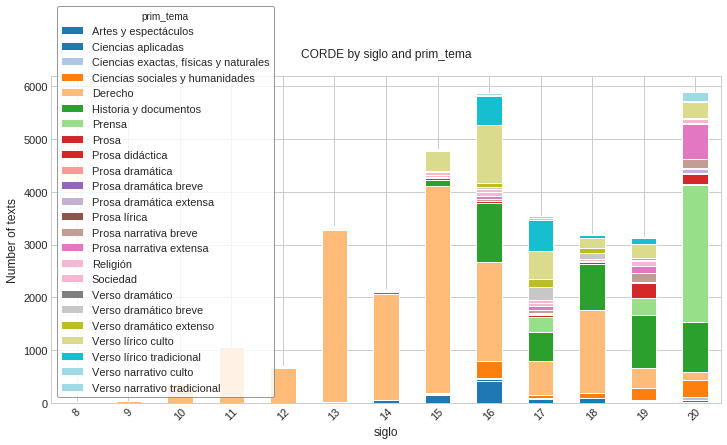

In [30]:
describe_data.describe_corpus_stackedbars(wdir = wdir, metadata = corde_metadatos, class_1 = "siglo", class_2 = "prim_tema", dataset = "CORDE")


# Description of data

In [30]:
corde_metadatos_500.shape

(22441, 47)

In [31]:
corde_metadatos_500["tokens"].sum()

244200656

In [32]:
Counter(corde_metadatos_500["model_tema"]).most_common()

[('Derecho', 7200),
 ('Cartas y relaciones', 3600),
 ('Prensa', 2439),
 ('Verso lírico culto', 2042),
 ('Ciencias sociales y humanidades', 1009),
 ('Historia y documentos', 790),
 ('Artes y espectáculos', 601),
 ('Verso lírico tradicional', 577),
 ('Prosa didáctica', 572),
 ('Prosa narrativa extensa', 509),
 ('Novela y otras formas similares', 456),
 ('Prosa narrativa breve', 428),
 ('Verso dramático breve', 417),
 ('Verso dramático extenso', 402),
 ('Sociedad', 340),
 ('Verso narrativo tradicional', 251),
 ('Religión', 171),
 ('Prosa dramática extensa', 123),
 ('Ciencias aplicadas', 115),
 ('Ciencias exactas, físicas y naturales', 109),
 ('Verso narrativo culto', 101),
 ('Prosa dramática breve', 48),
 ('?', 40),
 ('Biografía', 33),
 ('Prosa', 20),
 ('Prosa dramática', 20),
 ('Prosa lírica', 15),
 ('Autobiografía', 12),
 ('Verso dramático', 1)]

In [33]:
len(set(corde_metadatos_500["model_tema"]))

29

# Evaluation

In [21]:
corde_metadatos_500 = pd.read_csv(wdir+"corde_metadatos_500.csv", sep="\t", index_col=0)

In [22]:
corde_freq_500 = pd.read_parquet(wdir+"corde_freq_500_T.parquet").T.fillna(0)

In [23]:
corde_freq_500.head()

token            ,        de         .       que        la         y  \
aazorin   0.067238  0.038273  0.050946  0.022467  0.028083  0.030604   
abacca    0.077889  0.056551  0.036802  0.020796  0.032335  0.026635   
abaddon   0.063174  0.041399  0.054818  0.030686  0.025657  0.024002   
abadengo  0.076092  0.053889  0.044245  0.031108  0.023092  0.019706   
abajo     0.059850  0.040125  0.089731  0.019613  0.025095  0.029431   

token           en        el         a       por    ...     prosiguió  \
aazorin   0.022935  0.019388  0.017642  0.007579    ...      0.000000   
abacca    0.023894  0.020612  0.014785  0.010375    ...      0.000000   
abaddon   0.020188  0.020307  0.016826  0.008503    ...      0.000079   
abadengo  0.023103  0.025193  0.013780  0.009901    ...      0.000000   
abajo     0.014041  0.016356  0.020961  0.006223    ...      0.000180   

token     consideraciones     ganas  reacción   crónica  destierro  confesor  \
aazorin          0.000000  0.000036  0.000054  0.000018   0.000000  0.000000   
abacca           0.000023  0.000000  0.000046  0.000000   0.000000  0.000000   
abaddon          0.000011  0.000068  0.000034  0.000028   0.000000  0.000006   
abadengo         0.000000  0.000000  0.000000  0.000321   0.000021  0.000000   
abajo            0.000000  0.000157  0.000000  0.000000   0.000000  0.000000   

token     baxa   esteban     turco  
aazorin    0.0  0.000000  0.000000  
abacca     0.0  0.000000  0.000000  
abaddon    0.0  0.000000  0.000045  
abadengo   0.0  0.000011  0.000000  
abajo      0.0  0.000000  0.000000  

[5 rows x 7000 columns]

In [5]:
print(sorted(list(set(corde_metadatos_500["model_tema"]))))

['?', 'Artes y espectáculos', 'Autobiografía', 'Biografía', 'Cartas y relaciones', 'Ciencias aplicadas', 'Ciencias exactas, físicas y naturales', 'Ciencias sociales y humanidades', 'Derecho', 'Historia y documentos', 'Novela y otras formas similares', 'Prensa', 'Prosa', 'Prosa didáctica', 'Prosa dramática', 'Prosa dramática breve', 'Prosa dramática extensa', 'Prosa lírica', 'Prosa narrativa breve', 'Prosa narrativa extensa', 'Religión', 'Sociedad', 'Verso dramático', 'Verso dramático breve', 'Verso dramático extenso', 'Verso lírico culto', 'Verso lírico tradicional', 'Verso narrativo culto', 'Verso narrativo tradicional']


In [6]:
corde_freq_500.shape
corde_freq_500.isnull().values.any()

False

In [7]:

MFFs = [10,100,500,1000,2000,3000,4000,5000,6000] # 10,100,500,1000,2000,3000,4000,5000,6000
MFFs = [50] # 10,100,500,1000,2000,3000,4000,5000,6000
MFFs = [100]

classes = sorted(list(set(corde_metadatos_500["model_tema"])))

for MFF in MFFs:
    for class_ in classes:
        print(MFF, class_)
        results = classify.classify(wdir = wdir, freq_table  = corde_freq_500, metadata = corde_metadatos_500,
                      classes = [class_],#, #list(set(corde_metadatos_500["model_tema"])),
                      verbose = True,#
                      methods = ["SVC","KNN","RF","LR"],#[,"GN"],
                      max_MFFs = [MFF],#[10,100,500,1000,2000,3000,4000,5000,6000],
                      text_representations = ["log"],#,[,"raw","tfidf","zscores","logzscores","log","binary"],#"relative"
                      typographies = [True], sampling_mode = "cross", make_relative = False, scoring="f1", under_sample_method = "lpc-max")

        results.to_csv(wdir + "results/evaluation_log_" + str(MFF) + "_" + class_ + ".csv", sep="\t")

100 ?
(22441, 100)
(22441, 47)


analysed class:	 ?
* Culling data
labels done
Counter({'0': 22401, '1': 40})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  40
Labels shape (22441,) 
 Data shape (22441, 100)
undersampling lpc-max
after undersampling, labels and data good (80,) (80, 99) lpc-max
typography  True
textual representation:  log
[]
(80, 99)
MFW 100


/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


method used:	 SVC
cross validation sampling
f1: 0.85 (+/- 0.24)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.792306289324072, pvalue=1.0330715594827232e-05)
1.0330715594827232e-05
Class: 	 ?
Scores: 	 [0.85714286 0.85714286 0.66666667 1.         0.75       0.88888889
 1.         1.         0.85714286 0.66666667]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.89 (+/- 0.22)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.75383596986795, pvalue=1.947954404575223e-06)
1.947954404575223e-06
Class: 	 ?
Scores: 	 [1.         1.         0.8        1.         0.8        0.88888889
 0.85714286 1.         0.85714286 0.66666667]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.84 (+/- 0.23)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.725054078957244, pvalue=1.099697287235335e-05)
1.099697287235335e-05
Class: 	 ?
Scores: 	 [1.         0.85714286 0.8        1.    

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.85 (+/- 0.05)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=40.129920700657365, pvalue=1.8439717773081964e-11)
1.8439717773081964e-11
Class: 	 Artes y espectáculos
Scores: 	 [0.828125   0.83606557 0.88333333 0.87394958 0.85470085 0.84482759
 0.79338843 0.864      0.85950413 0.81889764]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.84 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=30.977483963457114, pvalue=1.8658171898640462e-10)
1.8658171898640462e-10
Class: 	 Artes y espectáculos
Scores: 	 [0.78518519 0.83969466 0.87301587 0.88888889 0.83464567 0.8
 0.86885246 0.8        0.83823529 0.82539683]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.83 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=26.864910892855775, pvalue=6.640213962708953e-10)
6.640213962708953e-10
Class: 	 Artes y espectáculos
Scores: 	 [0.82926829 0.83050847 0.7889

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 

f1: 0.83 (+/- 0.63)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.12909072914302, pvalue=0.012139471376718244)
0.012139471376718244
Class: 	 Autobiografía
Scores: 	 [0.5 0.8 1.  1.  1.  1.  0.  1.  1.  1. ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.68 (+/- 0.77)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.4347826086956523, pvalue=0.18517125468591142)
0.18517125468591142
Class: 	 Autobiografía
Scores: 	 [0.5        1.         1.         0.         0.66666667 1.
 0.         0.66666667 1.         1.        ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.56 (+/- 0.84)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.40572137584872314, pvalue=0.6944234791870769)
0.6944234791870769
Class: 	 Autobiografía
Scores: 	 [0.5        0.4        1.         1.         0.66666667 1.
 0.         1.         0.         0.        ]
Baseline: 		 0.5
done!
100 Biografía


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(22441, 100)
(22441, 47)


analysed class:	 Biografía
* Culling data
labels done
Counter({'0': 22408, '1': 33})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  33
Labels shape (22441,) 
 Data shape (22441, 100)
undersampling lpc-max
after undersampling, labels and data good (66,) (66, 100) lpc-max
typography  True
textual representation:  log
[]
(66, 100)
MFW 100
method used:	 SVC
cross validation sampling


/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.86 (+/- 0.17)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.649121954630944, pvalue=4.909786611704446e-07)
4.909786611704446e-07
Class: 	 Biografía
Scores: 	 [1.         0.88888889 0.85714286 0.8        0.8        0.75
 1.         0.85714286 0.85714286 0.75      ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.85 (+/- 0.26)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.014713298444331, pvalue=2.1812179875755055e-05)
2.1812179875755055e-05
Class: 	 Biografía
Scores: 	 [1.         0.88888889 0.75       0.8        1.         0.57142857
 1.         0.85714286 0.85714286 0.75      ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.83 (+/- 0.24)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.258341125150233, pvalue=1.715602149442221e-05)
1.715602149442221e-05
Class: 	 Biografía
Scores: 	 [0.85714286 0.88888889 0.85714286 0.5        0.8        0.8571428

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


method used:	 SVC
cross validation sampling
f1: 0.80 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=51.10221573523895, pvalue=2.112518837431892e-12)
2.112518837431892e-12
Class: 	 Cartas y relaciones
Scores: 	 [0.82240437 0.79787234 0.81958042 0.79069767 0.79063361 0.80706522
 0.78224688 0.75983718 0.78854025 0.80166436]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.81 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=61.84622731065612, pvalue=3.809573344299771e-13)
3.809573344299771e-13
Class: 	 Cartas y relaciones
Scores: 	 [0.82777036 0.80160858 0.82684564 0.8150134  0.79947575 0.77822045
 0.81949934 0.82539683 0.824      0.82166446]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.84 (+/- 0.02)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=106.58046385451087, pvalue=2.859995087435507e-15)
2.859995087435507e-15
Class: 	 Cartas y relacion

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.80 (+/- 0.18)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.07008952726711, pvalue=3.3760414784712526e-06)
3.3760414784712526e-06
Class: 	 Ciencias aplicadas
Scores: 	 [0.92307692 0.85714286 0.92307692 0.8        0.7        0.84615385
 0.83333333 0.72727273 0.77777778 0.63157895]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.83 (+/- 0.15)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.289984166994172, pvalue=3.2123270677884075e-07)
3.2123270677884075e-07
Class: 	 Ciencias aplicadas
Scores: 	 [0.92307692 0.81481481 0.92307692 0.92307692 0.84615385 0.69565217
 0.76923077 0.75       0.81818182 0.81818182]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.86 (+/- 0.13)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=16.806880009395133, pvalue=4.185529970278087e-08)
4.185529970278087e-08
Class: 	 Ciencias aplicadas
Scores: 	 [0.90909091 0.81818182 0.96  

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.81 (+/- 0.12)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=15.170708954065756, pvalue=1.0224629381949002e-07)
1.0224629381949002e-07
Class: 	 Ciencias exactas, físicas y naturales
Scores: 	 [0.85714286 0.86956522 0.81818182 0.83333333 0.8        0.81818182
 0.7        0.88       0.7        0.77777778]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.90 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=38.42273531812173, pvalue=2.7213080284639922e-11)
2.7213080284639922e-11
Class: 	 Ciencias exactas, físicas y naturales
Scores: 	 [0.86956522 0.91666667 0.91666667 0.91666667 0.90909091 0.91666667
 0.83333333 0.86956522 0.9        0.94736842]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.88 (+/- 0.13)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.555847068104306, pvalue=2.8571107818086505e-08)
2.8571107818086505e-08
Class: 	 Ciencias exactas, 

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.75 (+/- 0.05)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=28.420759401229926, pvalue=4.022182496425603e-10)
4.022182496425603e-10
Class: 	 Ciencias sociales y humanidades
Scores: 	 [0.77934272 0.72897196 0.76190476 0.74257426 0.7745098  0.74146341
 0.69306931 0.79047619 0.75121951 0.75961538]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.80 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=58.36799654074892, pvalue=6.40634542167931e-13)
6.40634542167931e-13
Class: 	 Ciencias sociales y humanidades
Scores: 	 [0.78095238 0.79807692 0.80193237 0.82587065 0.77511962 0.78606965
 0.79227053 0.77832512 0.81       0.8056872 ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.80 (+/- 0.05)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=34.663647699130415, pvalue=6.83508342541721e-11)
6.83508342541721e-11
Class: 	 Ciencias sociales y humanidades
Scores: 

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


textual representation:  log
[]
(5000, 100)
MFW 100
method used:	 SVC
cross validation sampling
f1: 0.85 (+/- 0.02)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=87.16571035511875, pvalue=1.7444417189808753e-14)
1.7444417189808753e-14
Class: 	 Derecho
Scores: 	 [0.8566108  0.86629002 0.86742424 0.84230769 0.82732448 0.85277247
 0.84942085 0.84962406 0.8365019  0.84836852]
Baseline: 		 0.5086
method used:	 KNN
cross validation sampling
f1: 0.84 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=74.24344182076415, pvalue=7.37988181187002e-14)
7.37988181187002e-14
Class: 	 Derecho
Scores: 	 [0.85227273 0.85659656 0.8374761  0.84752475 0.85009488 0.82213439
 0.81871345 0.85380117 0.83858268 0.86051081]
Baseline: 		 0.5086
method used:	 RF
cross validation sampling
f1: 0.86 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=80.58373856139464, pvalue=3.533323834761508e-14)
3.5333238347615

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.73 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=15.939852442119124, pvalue=6.64741911090915e-08)
6.64741911090915e-08
Class: 	 Historia y documentos
Scores: 	 [0.73548387 0.78527607 0.75903614 0.72368421 0.7388535  0.7133758
 0.66666667 0.74846626 0.7654321  0.63803681]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.74 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=24.733546903882523, pvalue=1.3846591702388443e-09)
1.3846591702388443e-09
Class: 	 Historia y documentos
Scores: 	 [0.74418605 0.71604938 0.73619632 0.74853801 0.7804878  0.67532468
 0.73446328 0.78409091 0.73939394 0.74213836]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.80 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=29.71916065072432, pvalue=2.7010234418259933e-10)
2.7010234418259933e-10
Class: 	 Historia y documentos
Scores: 	 [0.76623377 0.84353741 

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.92 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=45.44416772769968, pvalue=6.0511980761803564e-12)
6.0511980761803564e-12
Class: 	 Novela y otras formas similares
Scores: 	 [0.89583333 0.94623656 0.93181818 0.90526316 0.91836735 0.95652174
 0.85714286 0.94252874 0.93333333 0.91111111]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.93 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.317742701430355, pvalue=2.2144183511281453e-11)
2.2144183511281453e-11
Class: 	 Novela y otras formas similares
Scores: 	 [0.92929293 0.95833333 0.95744681 0.92       0.94845361 0.96842105
 0.86       0.94505495 0.95744681 0.88888889]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.94 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=42.67421122741161, pvalue=1.0632177167539555e-11)
1.0632177167539555e-11
Class: 	 Novela y otras formas similares

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


textual representation:  log
[]
(4878, 100)
MFW 100
method used:	 SVC
cross validation sampling
f1: 0.83 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=75.98893537019647, pvalue=5.988948395738517e-14)
5.988948395738517e-14
Class: 	 Prensa
Scores: 	 [0.83101392 0.82352941 0.84662577 0.85052632 0.82424242 0.83636364
 0.83832335 0.81409002 0.80638723 0.83299799]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.82 (+/- 0.04)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=45.327246849183396, pvalue=6.192569112002852e-12)
6.192569112002852e-12
Class: 	 Prensa
Scores: 	 [0.80998081 0.8030888  0.83333333 0.8667992  0.79841897 0.81481481
 0.81467181 0.79266055 0.80152672 0.83175803]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.86 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=83.42118161203267, pvalue=2.5887347760249402e-14)
2.5887347760249402e-1

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.75 (+/- 0.53)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.778475267485762, pvalue=0.021454173921138783)
0.021454173921138783
Class: 	 Prosa
Scores: 	 [0.66666667 0.8        0.8        0.8        0.8        1.
 0.8        1.         0.         0.8       ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.70 (+/- 0.55)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.224276803362403, pvalue=0.05319144381603511)
0.05319144381603511
Class: 	 Prosa
Scores: 	 [0.         0.5        0.8        1.         0.8        0.8
 0.66666667 1.         0.66666667 0.8       ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.74 (+/- 0.58)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.4679173791058373, pvalue=0.0356920154744208)
0.0356920154744208
Class: 	 Prosa
Scores: 	 [0.66666667 0.8        0.8        1.         0.5        1.
 0.8        1.         0.         0.8       ]
Baseline: 		 0.5
done!
100 Prosa didáctica
(22441, 100)
(22441, 47)


analysed class:	 Prosa didáctica
* Culling data
labels done
Counter({'0': 21869, '1': 572})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  572
Labels shape (22441,) 
 Data shape (22441, 100)
undersampling lpc-max
after undersampling, lab

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.86 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=76.2950838468618, pvalue=5.776396067918931e-14)
5.776396067918931e-14
Class: 	 Prosa didáctica
Scores: 	 [0.84552846 0.88       0.85217391 0.87394958 0.85964912 0.83870968
 0.85       0.85714286 0.86440678 0.83333333]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.86 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=36.139887997090355, pvalue=4.7074794132495574e-11)
4.7074794132495574e-11
Class: 	 Prosa didáctica
Scores: 	 [0.8852459  0.928      0.84033613 0.80991736 0.85964912 0.86178862
 0.83870968 0.85714286 0.86885246 0.84552846]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.87 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=31.490093412888342, pvalue=1.6115806598573977e-10)
1.6115806598573977e-10
Class: 	 Prosa didáctica
Scores: 	 [0.85217391 0.88888889 0.81904762 0.884

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.88 (+/- 0.34)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.64705882352941, pvalue=9.4054695692912e-05)
9.4054695692912e-05
Class: 	 Prosa dramática
Scores: 	 [1.         0.5        1.         0.66666667 1.         1.
 0.8        1.         0.8        1.        ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.82 (+/- 0.33)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.795708927083316, pvalue=0.0002608737671781624)
0.0002608737671781624
Class: 	 Prosa dramática
Scores: 	 [1.         0.5        0.8        0.66666667 0.8        1.
 0.8        1.         0.66666667 1.        ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.86 (+/- 0.29)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.3258932326673785, pvalue=4.439988637109338e-05)
4.439988637109338e-05
Class: 	 Prosa dramática
Scores: 	 [1.         0.66666667 1.         0.66666667 0.66666667 0.8
 1. 

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.91 (+/- 0.15)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=16.09829691198818, pvalue=6.097949935954054e-08)
6.097949935954054e-08
Class: 	 Prosa dramática breve
Scores: 	 [0.90909091 0.88888889 0.90909091 1.         0.88888889 0.90909091
 0.72727273 1.         0.88888889 1.        ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.92 (+/- 0.13)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=19.42253521126761, pvalue=1.1754960404453551e-08)
1.1754960404453551e-08
Class: 	 Prosa dramática breve
Scores: 	 [0.90909091 1.         0.90909091 0.90909091 0.8        0.90909091
 0.83333333 0.90909091 1.         1.        ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.95 (+/- 0.17)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=15.949222340999455, pvalue=6.613442018235615e-08)
6.613442018235615e-08
Class: 	 Prosa dramática breve
Scores: 	 [0.90909091 1.         

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.94 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=32.980843726709004, pvalue=1.0662877434704222e-10)
1.0662877434704222e-10
Class: 	 Prosa dramática extensa
Scores: 	 [0.96296296 0.96296296 0.96296296 0.86956522 0.90909091 0.91666667
 1.         0.95652174 0.96       0.88      ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.90 (+/- 0.10)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=23.68443332537413, pvalue=2.0343326578955043e-09)
2.0343326578955043e-09
Class: 	 Prosa dramática extensa
Scores: 	 [0.92857143 0.89655172 0.92857143 0.88       0.88888889 0.88888889
 1.         0.92307692 0.92307692 0.78571429]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.95 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=28.847886422262338, pvalue=3.5215390772489356e-10)
3.5215390772489356e-10
Class: 	 Prosa dramática extensa
Scores: 	 [0.84615385 

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 

f1: 0.72 (+/- 0.80)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.641811363846482, pvalue=0.13504598162025744)
0.13504598162025744
Class: 	 Prosa lírica
Scores: 	 [1.  1.  1.  0.4 0.8 0.  0.  1.  1.  1. ]
Baseline: 		 0.5
method used:	 RF
cross validation sampling


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.79 (+/- 0.68)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.5445559054974374, pvalue=0.031474628054525805)
0.031474628054525805
Class: 	 Prosa lírica
Scores: 	 [1.  1.  0.5 0.4 1.  0.  1.  1.  1.  1. ]
Baseline: 		 0.5
method used:	 LR
cross validation sampling
f1: 0.78 (+/- 0.61)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.7038077932704687, pvalue=0.02424205755138577)
0.02424205755138577
Class: 	 Prosa lírica
Scores: 	 [0.66666667 1.         0.8        0.5        0.8        0.
 1.         1.         1.         1.        ]
Baseline: 		 0.5
done!
100 Prosa narrativa breve


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(22441, 100)
(22441, 47)


analysed class:	 Prosa narrativa breve
* Culling data
labels done
Counter({'0': 22013, '1': 428})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  428
Labels shape (22441,) 
 Data shape (22441, 100)
undersampling lpc-max
after undersampling, labels and data good (856,) (856, 100) lpc-max
typography  True
textual representation:  log
[]
(856, 100)
MFW 100
method used:	 SVC
cross validation sampling


/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.83 (+/- 0.05)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=42.6465347898923, pvalue=1.0694159189818618e-11)
1.0694159189818618e-11
Class: 	 Prosa narrativa breve
Scores: 	 [0.81927711 0.8        0.82222222 0.82758621 0.88636364 0.83146067
 0.8045977  0.83146067 0.84782609 0.81818182]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.85 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=30.688724319080933, pvalue=2.028442481026352e-10)
2.028442481026352e-10
Class: 	 Prosa narrativa breve
Scores: 	 [0.85393258 0.88888889 0.81318681 0.8988764  0.85106383 0.84782609
 0.87912088 0.8125     0.87912088 0.79120879]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.84 (+/- 0.11)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=18.107374668413133, pvalue=2.177968229719034e-08)
2.177968229719034e-08
Class: 	 Prosa narrativa breve
Scores: 	 [0.7804878  0.84337349 

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.85 (+/- 0.05)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=46.06350124751019, pvalue=5.359671591184479e-12)
5.359671591184479e-12
Class: 	 Prosa narrativa extensa
Scores: 	 [0.83168317 0.83333333 0.86538462 0.83673469 0.87128713 0.85436893
 0.90566038 0.84       0.83333333 0.87378641]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.84 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=33.70322132953319, pvalue=8.78629989321435e-11)
8.78629989321435e-11
Class: 	 Prosa narrativa extensa
Scores: 	 [0.81632653 0.89108911 0.85714286 0.82828283 0.82882883 0.83185841
 0.86792453 0.77358491 0.83018868 0.84313725]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.86 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=33.167400464074696, pvalue=1.0138902312445726e-10)
1.0138902312445726e-10
Class: 	 Prosa narrativa extensa
Scores: 	 [0.80808081 0.9    

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.83 (+/- 0.10)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=20.00351977444517, pvalue=9.06544015514125e-09)
9.06544015514125e-09
Class: 	 Religión
Scores: 	 [0.88235294 0.82051282 0.81081081 0.875      0.81081081 0.73333333
 0.83870968 0.84210526 0.91891892 0.78787879]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.88 (+/- 0.13)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.15169417994796, pvalue=3.503942826622938e-08)
3.503942826622938e-08
Class: 	 Religión
Scores: 	 [0.94444444 0.8        0.86486486 0.94444444 0.94444444 0.75675676
 0.88888889 0.8        0.91891892 0.91891892]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.87 (+/- 0.13)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=16.61980423917615, pvalue=4.615929086649999e-08)
4.615929086649999e-08
Class: 	 Religión
Scores: 	 [0.875      0.83333333 0.85714286 0.875      0.77419355 0.77419355


/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.75 (+/- 0.11)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.463346673664233, pvalue=2.873225499004926e-07)
2.873225499004926e-07
Class: 	 Sociedad
Scores: 	 [0.82191781 0.72222222 0.72222222 0.70769231 0.77142857 0.78947368
 0.8        0.71641791 0.62686567 0.77922078]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.81 (+/- 0.08)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=23.475690246503845, pvalue=2.2005054027432027e-09)
2.2005054027432027e-09
Class: 	 Sociedad
Scores: 	 [0.8125     0.84057971 0.8358209  0.84057971 0.78125    0.74666667
 0.85245902 0.8        0.73846154 0.84507042]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.81 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=20.33998874627158, pvalue=7.824803875235816e-09)
7.824803875235816e-09
Class: 	 Sociedad
Scores: 	 [0.89552239 0.84375    0.86486486 0.75757576 0.83333333 0.821

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
done!
100 Verso dramático breve
(22441, 100)
(22441, 47)


analysed class:	 Verso dramático breve
* Culling data
labels done
Counter({'0': 22024, '1': 417})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  417
Labels shape (22441,) 
 Data shape (22441, 100)
undersampling lpc-max
after undersampling, labels and data good (834,) (834, 100) lpc-max
typography  True
textual representation:  log
[]
(834, 100)
MFW 100
method used:	 SVC
cross validation sampling
f1: 0.86 (+/- 0.10)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=22.746154623980264, pvalue=2.911091317942163e-09)
2.911091317942163e-09
Class: 	 Verso dramático breve
Scores: 	 [0.85393258 0.80487805 0.85393258 0.88372093 0.90697674 0.89411765
 0.76744186 0.84444444 0.93670886 0.9       ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1:

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.92 (+/- 0.07)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=37.21001240013438, pvalue=3.6259416415086674e-11)
3.6259416415086674e-11
Class: 	 Verso dramático extenso
Scores: 	 [0.88636364 0.95       0.88607595 0.97560976 0.88607595 0.91139241
 0.97435897 0.89156627 0.93975904 0.925     ]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.87 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=40.273428849017186, pvalue=1.7859601871690186e-11)
1.7859601871690186e-11
Class: 	 Verso dramático extenso
Scores: 	 [0.86956522 0.86956522 0.88372093 0.88372093 0.89411765 0.84090909
 0.91954023 0.83333333 0.90909091 0.84090909]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.95 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=46.24553396288921, pvalue=5.17346440458723e-12)
5.17346440458723e-12
Class: 	 Verso dramático extenso
Scores: 	 [0.94117647 0.963

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


[]
(4084, 100)
MFW 100
method used:	 SVC
cross validation sampling
f1: 0.84 (+/- 0.02)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=85.78636169997516, pvalue=2.0134235533863933e-14)
2.0134235533863933e-14
Class: 	 Verso lírico culto
Scores: 	 [0.86284289 0.8353222  0.85371703 0.835      0.84819277 0.83168317
 0.84819277 0.82025316 0.85213033 0.83823529]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.83 (+/- 0.02)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=92.99284479293253, pvalue=9.74937849587254e-15)
9.74937849587254e-15
Class: 	 Verso lírico culto
Scores: 	 [0.83221477 0.80888889 0.83333333 0.8254717  0.8375286  0.81395349
 0.8202765  0.83218391 0.81018519 0.83710407]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.87 (+/- 0.03)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=74.61127058280186, pvalue=7.059287071313702e-14)
7.059287071313702e-14
Class:

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.86 (+/- 0.06)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=33.385444665879525, pvalue=9.562404316673862e-11)
9.562404316673862e-11
Class: 	 Verso lírico tradicional
Scores: 	 [0.85964912 0.8034188  0.85245902 0.87931034 0.87804878 0.90163934
 0.88135593 0.86725664 0.79646018 0.87394958]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.86 (+/- 0.05)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=44.357512459562585, pvalue=7.51722915769221e-12)
7.51722915769221e-12
Class: 	 Verso lírico tradicional
Scores: 	 [0.8852459  0.85950413 0.87096774 0.8503937  0.875      0.87692308
 0.84615385 0.81355932 0.81666667 0.87804878]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.88 (+/- 0.05)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=43.37052926504168, pvalue=9.196817588270368e-12)
9.196817588270368e-12
Class: 	 Verso lírico tradicional
Scores: 	 [0.87719298 0.847

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.72 (+/- 0.19)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.97610578316553, pvalue=6.493996585529746e-05)
6.493996585529746e-05
Class: 	 Verso narrativo culto
Scores: 	 [0.7        0.73684211 0.88888889 0.84210526 0.70588235 0.63157895
 0.7        0.76190476 0.73684211 0.52631579]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.81 (+/- 0.12)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=15.498293533821466, pvalue=8.490745303936985e-08)
8.490745303936985e-08
Class: 	 Verso narrativo culto
Scores: 	 [0.88       0.9        0.85714286 0.8        0.7826087  0.76190476
 0.81818182 0.84210526 0.73684211 0.70588235]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.83 (+/- 0.17)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.323152571228214, pvalue=1.2605973090539638e-06)
1.2605973090539638e-06
Class: 	 Verso narrativo culto
Scores: 	 [0.95652174 0.84210526 

/home/jose/Dropbox/MTB/investigacion/mytoolbox/reading_robot/text2features.py:56: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus).replace([np.inf, -np.inf], 0)


f1: 0.79 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=19.219168828707197, pvalue=1.2896806005040586e-08)
1.2896806005040586e-08
Class: 	 Verso narrativo tradicional
Scores: 	 [0.76363636 0.74509804 0.8627451  0.75       0.83018868 0.84615385
 0.7755102  0.84615385 0.73913043 0.76595745]
Baseline: 		 0.5
method used:	 KNN
cross validation sampling
f1: 0.81 (+/- 0.09)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.047215654219467, pvalue=5.7860190618612165e-09)
5.7860190618612165e-09
Class: 	 Verso narrativo tradicional
Scores: 	 [0.76923077 0.73684211 0.85185185 0.82758621 0.81481481 0.8
 0.86206897 0.84210526 0.85185185 0.74074074]
Baseline: 		 0.5
method used:	 RF
cross validation sampling
f1: 0.87 (+/- 0.12)
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=18.420159311332092, pvalue=1.8737433155683286e-08)
1.8737433155683286e-08
Class: 	 Verso narrativo tradicional
Scores: 	 [0.830

# Results

In [7]:
results = []
for doc in glob.glob("/home/jose/Dropbox/Doktorarbeit/publications/201903 DHd/DATA/results/*.csv"):
    #print("aquí va doc!!!: ",doc)
    df = pd.read_csv(doc, sep = "\t", index_col = 0)
    results.append(df)

In [8]:
results_df = pd.concat(results).sort_values(by="mean", ascending = False)
results_df["classifier_name"] = results_df["classifier"].str.extract("^(.*?)\\(", flags=re.MULTILINE)
results_df["classifier_name"] = results_df["classifier_name"].replace("BaggingClassifier","Random Forest")
results_df["classifier_name"] = results_df["classifier_name"].replace("KNeighborsClassifier","KNN")

results_df.rename(columns={'mean': 'mean F1', 'std': 'std F1', "class" : "genre"}, inplace=True)
results_df = results_df.loc[results_df["genre"] != "?"]
results_df = results_df.loc[results_df["text_representation"] != "logzscores"]
results_df.loc[results_df["text_representation"] == "raw","text_representation"]  = "relative"

In [9]:
results_df.head()

genre   mean F1    std F1  baseline  difference  \
4            Prosa dramática  1.000000  0.000000       0.5    0.500000   
256             Prosa lírica  1.000000  0.000000       0.5    0.500000   
0    Prosa dramática extensa  0.992593  0.014815       0.5    0.492593   
3    Prosa dramática extensa  0.988245  0.018033       0.5    0.488245   
46                 Biografía  0.985714  0.042857       0.5    0.485714   

                                            classifier text_representation  \
4    BaggingClassifier(base_estimator=DecisionTreeC...             zscores   
256  BaggingClassifier(base_estimator=DecisionTreeC...               tfidf   
0    SVC(C=1.0, cache_size=200, class_weight=None, ...                 log   
3    LogisticRegression(C=1.0, class_weight=None, d...                 log   
46   BaggingClassifier(base_estimator=DecisionTreeC...               tfidf   

      MFW typography                                                 f1  \
4    2000       True                    [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]   
256    10       True                    [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]   
0    6000       True  [0.96296296 1.         0.96296296 1.         1...   
3    6000       True  [0.96296296 1.         0.96296296 0.95652174 1...   
46     10       True  [0.85714286 1.         1.         1.         1...   

     test_result_pvalue                                             labels  \
4          0.000000e+00  archivo\nepistosub108      0\nvaldiviesub5    ...   
256        0.000000e+00  archivo\njuanaustsub17     0\nloareina        ...   
0          5.188578e-15  archivo\nbhidalgo          0\ntorneosub7      ...   
3          3.290709e-14  archivo\nbhidalgo          0\ntorneosub7      ...   
46         8.124213e-11  archivo\nvidnicol          1\ncorrmendsub57   ...   

    sample_size     classifier_name  
4            40       Random Forest  
256          30       Random Forest  
0           246                 SVC  
3           246  LogisticRegression  
46           66       Random Forest

In [10]:
results_df.loc[results_df["text_representation"] =="log"].shape

(1242, 14)

In [11]:
best_results = results_df.groupby("genre").head(1)

In [12]:
best_results

genre   mean F1    std F1  baseline  \
4                          Prosa dramática  1.000000  0.000000    0.5000   
256                           Prosa lírica  1.000000  0.000000    0.5000   
0                  Prosa dramática extensa  0.992593  0.014815    0.5000   
46                               Biografía  0.985714  0.042857    0.5000   
2                    Prosa dramática breve  0.981818  0.036364    0.5000   
3    Ciencias exactas, físicas y naturales  0.981304  0.032071    0.5000   
11         Novela y otras formas similares  0.979521  0.008773    0.5000   
9                  Verso dramático extenso  0.976718  0.019168    0.5000   
11                    Artes y espectáculos  0.976465  0.011892    0.5000   
5                                 Religión  0.971511  0.025218    0.5000   
3                       Ciencias aplicadas  0.970931  0.031753    0.5000   
9                  Prosa narrativa extensa  0.966209  0.014197    0.5000   
11                Verso lírico tradicional  0.963326  0.011310    0.5000   
9                    Verso dramático breve  0.961097  0.027617    0.5000   
0                       Verso lírico culto  0.952244  0.010203    0.5000   
11             Verso narrativo tradicional  0.948014  0.017470    0.5000   
5                    Verso narrativo culto  0.944520  0.056665    0.5000   
11                     Cartas y relaciones  0.943087  0.006060    0.5000   
11                                  Prensa  0.941017  0.005064    0.5000   
11                                 Derecho  0.940810  0.015523    0.5044   
39                           Autobiografía  0.933333  0.133333    0.5000   
11                   Prosa narrativa breve  0.931810  0.021984    0.5000   
11                   Historia y documentos  0.926386  0.021665    0.5000   
11                         Prosa didáctica  0.921405  0.033877    0.5000   
11         Ciencias sociales y humanidades  0.915518  0.012819    0.5000   
3                                    Prosa  0.913333  0.136789    0.5000   
5                                 Sociedad  0.906006  0.024016    0.5000   

     difference                                         classifier  \
4      0.500000  BaggingClassifier(base_estimator=DecisionTreeC...   
256    0.500000  BaggingClassifier(base_estimator=DecisionTreeC...   
0      0.492593  SVC(C=1.0, cache_size=200, class_weight=None, ...   
46     0.485714  BaggingClassifier(base_estimator=DecisionTreeC...   
2      0.481818  BaggingClassifier(base_estimator=DecisionTreeC...   
3      0.481304  SVC(C=1.0, cache_size=200, class_weight=None, ...   
11     0.479521  LogisticRegression(C=1.0, class_weight=None, d...   
9      0.476718  SVC(C=1.0, cache_size=200, class_weight=None, ...   
11     0.476465  LogisticRegression(C=1.0, class_weight=None, d...   
5      0.471511  LogisticRegression(C=1.0, class_weight=None, d...   
3      0.470931  SVC(C=1.0, cache_size=200, class_weight=None, ...   
9      0.466209  SVC(C=1.0, cache_size=200, class_weight=None, ...   
11     0.463326  LogisticRegression(C=1.0, class_weight=None, d...   
9      0.461097  SVC(C=1.0, cache_size=200, class_weight=None, ...   
0      0.452244  SVC(C=1.0, cache_size=200, class_weight=None, ...   
11     0.448014  LogisticRegression(C=1.0, class_weight=None, d...   
5      0.444520  LogisticRegression(C=1.0, class_weight=None, d...   
11     0.443087  LogisticRegression(C=1.0, class_weight=None, d...   
11     0.441017  LogisticRegression(C=1.0, class_weight=None, d...   
11     0.436410  LogisticRegression(C=1.0, class_weight=None, d...   
39     0.433333  SVC(C=1.0, cache_size=200, class_weight=None, ...   
11     0.431810  LogisticRegression(C=1.0, class_weight=None, d...   
11     0.426386  LogisticRegression(C=1.0, class_weight=None, d...   
11     0.421405  LogisticRegression(C=1.0, class_weight=None, d...   
11     0.415518  LogisticRegression(C=1.0, class_weight=None, d...   
3      0.413333  LogisticRegression(C=1.0, class_weight=None, d...   
5      0.406006  L

In [13]:
best_results["mean F1"].mean()

0.9564700176264054

In [14]:
best_results["mean F1"].std()

0.027320403051725044

In [15]:
best_results["mean F1"].tolist()

[1.0,
 1.0,
 0.9925925925925926,
 0.9857142857142858,
 0.9818181818181818,
 0.981304347826087,
 0.979520638513208,
 0.976717990128477,
 0.9764647194071158,
 0.9715106177606178,
 0.9709308807134894,
 0.9662089717357614,
 0.9633264853792104,
 0.9610972759751241,
 0.9522435833787344,
 0.9480137289584728,
 0.944520391888813,
 0.9430873477909782,
 0.9410169063625032,
 0.9408095376025428,
 0.9333333333333332,
 0.9318096643761228,
 0.9263858574009312,
 0.9214051381346321,
 0.9155183392464828,
 0.9133333333333332,
 0.9060063265419136]

In [16]:
results_df.groupby("genre")["mean F1"].median().sort_values()

genre
Autobiografía                            0.703333
Prosa                                    0.756667
Prosa lírica                             0.763333
Ciencias sociales y humanidades          0.805757
Historia y documentos                    0.806259
Sociedad                                 0.809265
Biografía                                0.828413
Prosa didáctica                          0.834865
Verso narrativo culto                    0.842688
Prosa narrativa extensa                  0.844614
Verso narrativo tradicional              0.847319
Prosa narrativa breve                    0.847327
Prensa                                   0.852570
Cartas y relaciones                      0.855883
Artes y espectáculos                     0.857340
Prosa dramática                          0.866667
Ciencias aplicadas                       0.875361
Religión                                 0.876437
Derecho                                  0.882686
Verso lírico tradicional                 0.8

In [17]:
results_df.groupby("text_representation")["mean F1"].median().sort_values()

text_representation
relative    0.815283
log         0.858392
zscores     0.863537
binary      0.864579
tfidf       0.869135
Name: mean F1, dtype: float64

In [18]:
results_df.groupby("MFW")["mean F1"].median().sort_values()

MFW
10      0.741198
50      0.818372
100     0.855328
1000    0.873502
500     0.874964
4000    0.880499
2000    0.883019
5000    0.885347
3000    0.886595
6000    0.887551
Name: mean F1, dtype: float64

In [19]:
set(results_df["classifier_name"])

{'KNN', 'LogisticRegression', 'Random Forest', 'SVC'}

In [20]:
Counter(best_results["classifier_name"]).most_common()

[('LogisticRegression', 15), ('SVC', 8), ('Random Forest', 4)]

In [21]:
Counter(best_results["text_representation"]).most_common()

[('binary', 14), ('zscores', 6), ('log', 4), ('tfidf', 3)]

In [22]:
Counter(best_results["MFW"]).most_common()

[(6000, 10),
 (5000, 5),
 (2000, 4),
 (10, 2),
 (3000, 2),
 (4000, 2),
 (1000, 1),
 (100, 1)]

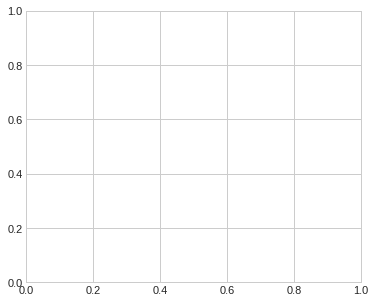

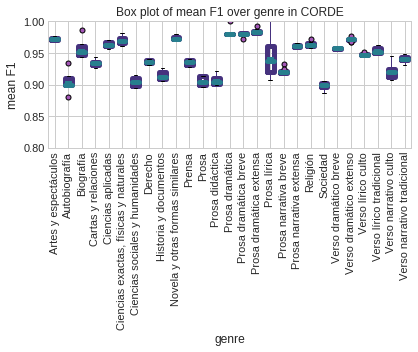

In [27]:
describe_data.boxplots(results_df.groupby("genre").head(10), "mean F1", "genre", wdir, "CORDE", rotation = 90, figsize=(6,5), baseline=0.5,  ylim=(0.8,1))

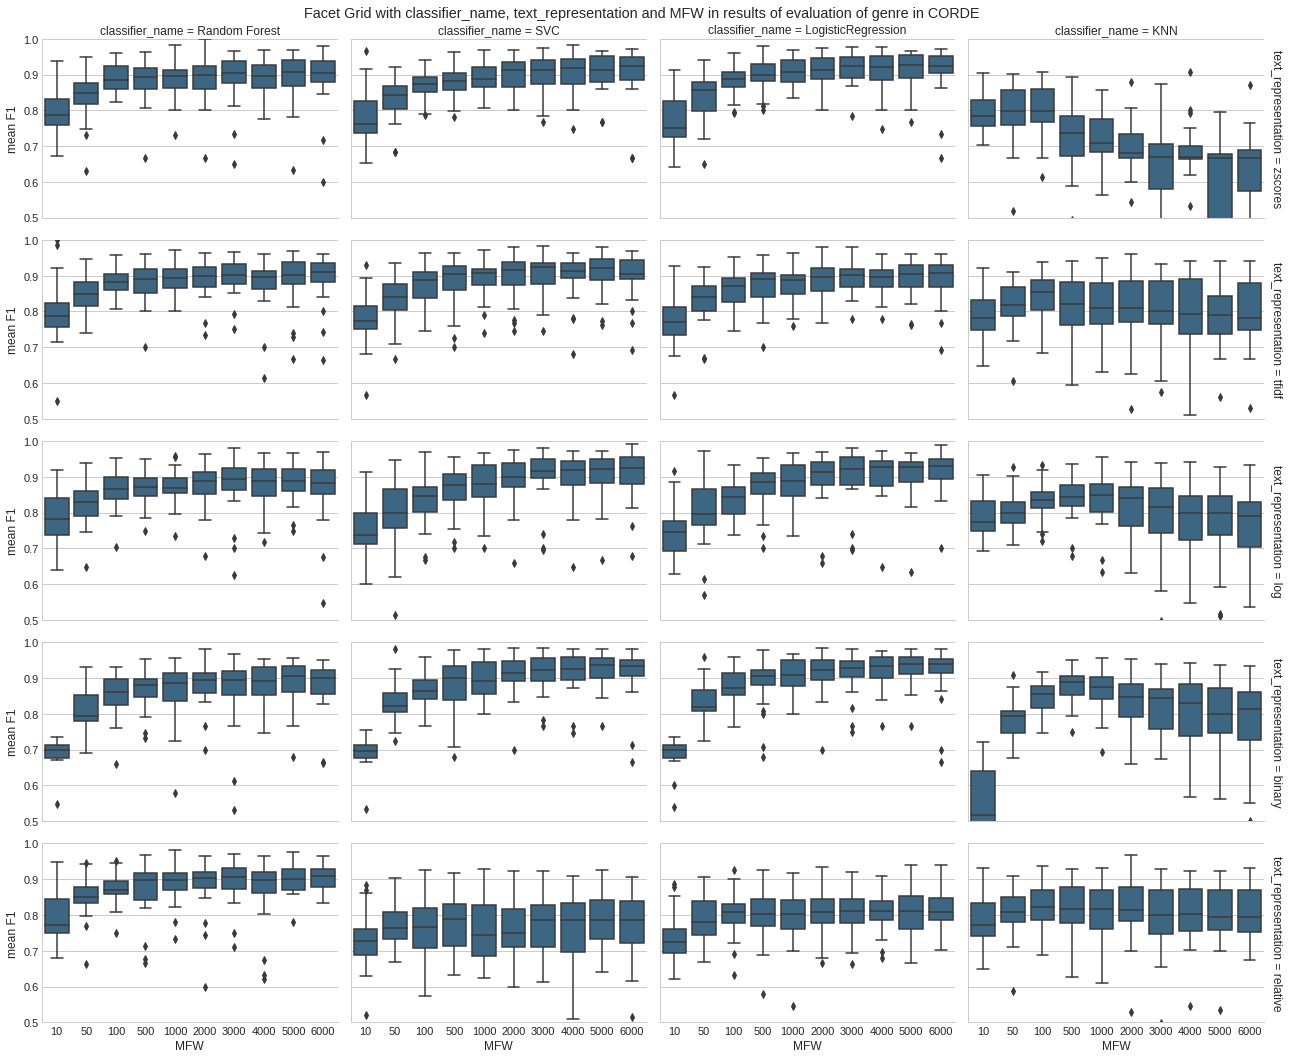

In [26]:
import seaborn as sns
describe_data.facetGrid(data_df = results_df.groupby(["MFW","text_representation","genre","classifier_name"]).head(1),
                        data_plot = "mean F1", col = "classifier_name", row = "text_representation",
                        facet = "MFW", wdir = wdir, dataset = "results of evaluation of genre in CORDE",
                        hue = "", ylim=0.5,  type_=sns.boxplot)

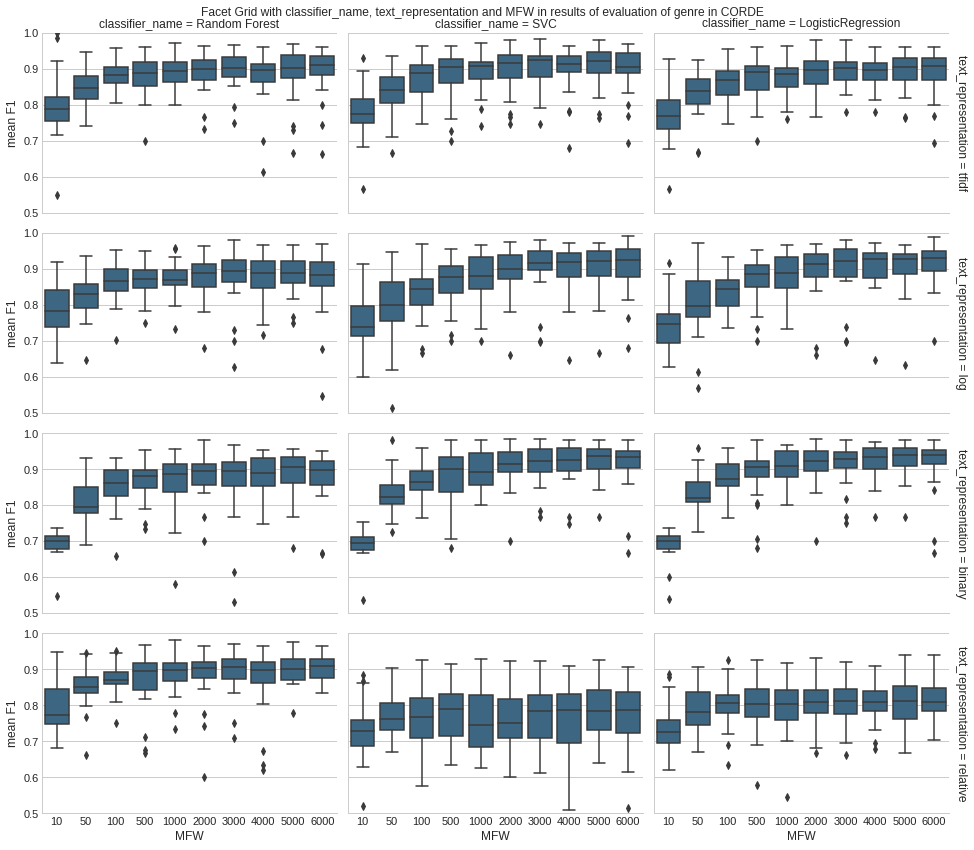

In [31]:
import seaborn as sns
describe_data.facetGrid(data_df = results_df.loc[(results_df["classifier_name"].isin(["Random Forest","SVC","LogisticRegression"])) & (results_df["text_representation"].isin(["relative","binary","log","tfidf"])) ].groupby(["MFW","text_representation","genre","classifier_name"]).head(1),
                        data_plot = "mean F1", col = "classifier_name", row = "text_representation",
                        facet = "MFW", wdir = wdir, dataset = "results of evaluation of genre in CORDE",
                        hue = "", ylim=0.5,  type_=sns.boxplot)

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)
/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


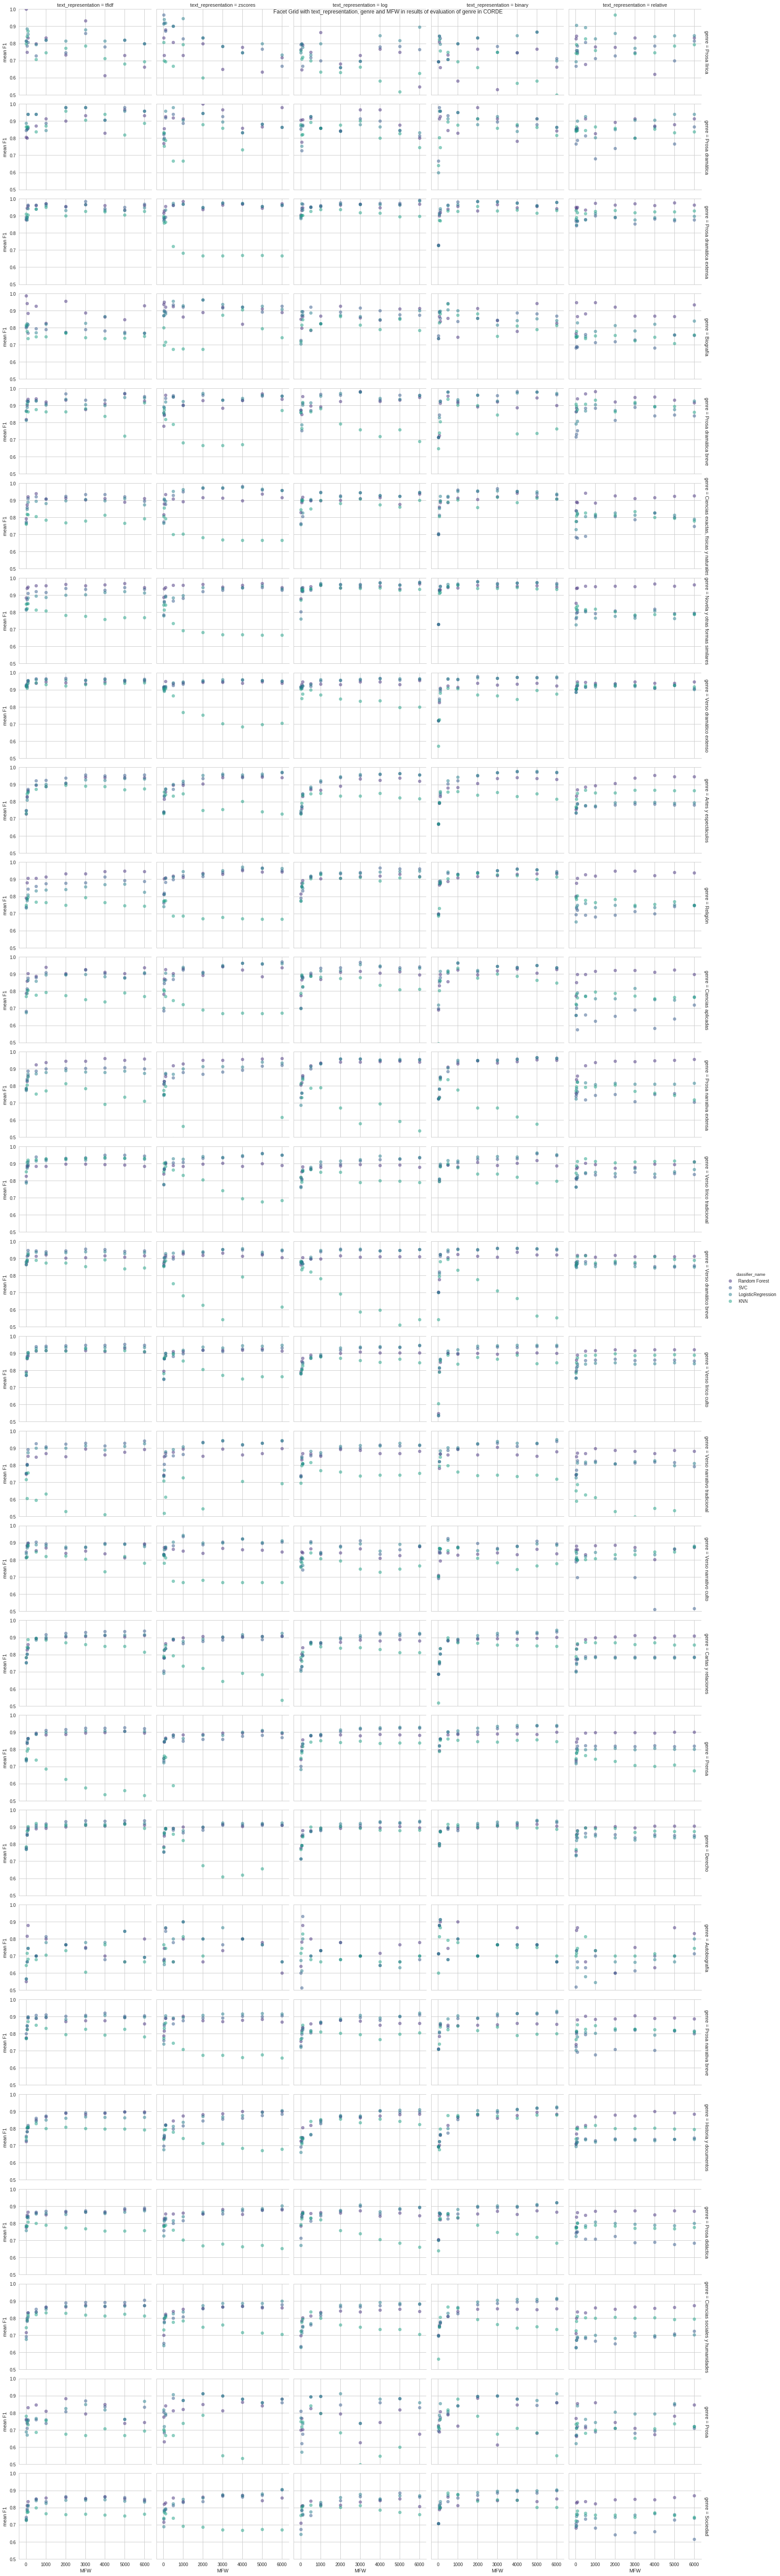

In [6]:
describe_data.facetGrid(data_df = results_df.groupby(["MFW","text_representation","genre","classifier_name"]).head(1), data_plot = "mean F1", col = "text_representation", row = "genre", facet = "MFW", wdir = wdir, dataset = "results of evaluation of genre in CORDE", hue = "classifier_name", ylim=0.5)

In [83]:
results_df["MFW"].values.min()

10

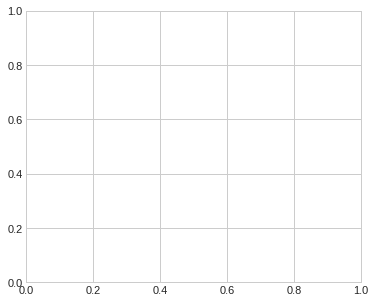

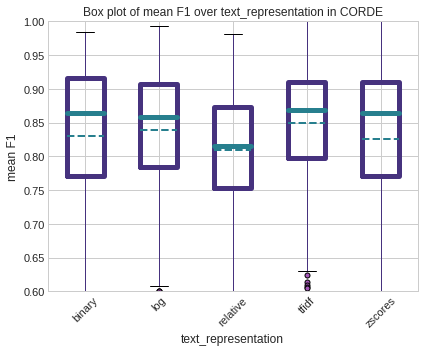

In [28]:
describe_data.boxplots(results_df, "mean F1", "text_representation", wdir, "CORDE", ylim=(0.6,1))

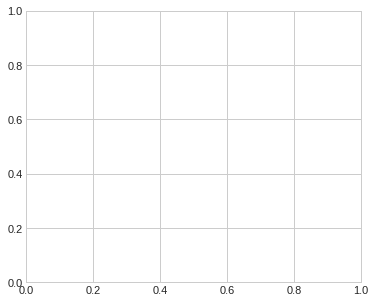

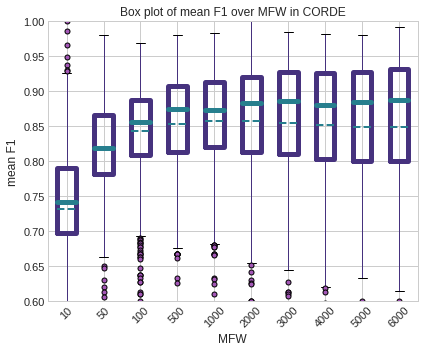

In [29]:
describe_data.boxplots(results_df, "mean F1", "MFW", wdir, "CORDE", ylim=(0.6,1))

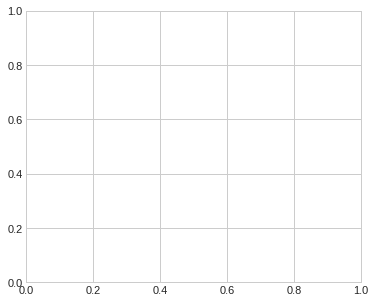

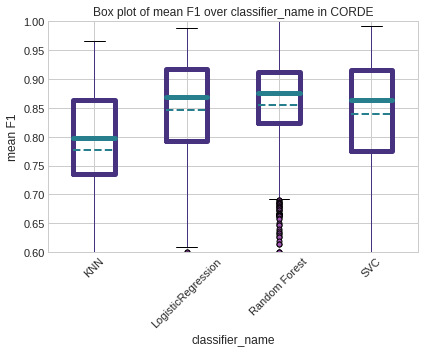

In [30]:
describe_data.boxplots(results_df, "mean F1", "classifier_name", wdir, "CORDE", ylim=(0.6,1))

# Evaluating features

In [88]:
corde_metadatos_500.head()

archivo.1                                             titulo  \
archivo                                                                 
aazorin    aazorin                                     Antonio Azorín   
abacca      abacca                             Invitación a filosofar   
abaddon    abaddon                            Abaddón el exterminador   
abadengo  abadengo  El Abadengo de Sahagún. Contribución al estudi...   
abajo        abajo                                       Los de abajo   

                                autor       pais     fechacre  \
archivo                                                         
aazorin   Azorín (José Martínez Ruiz)     España         1903   
abacca       García Bacca, Juan David     España  1940   1942   
abaddon               Sábato, Ernesto  Argentina         1974   
abadengo        Puyol y Alonso, Julio     España         1915   
abajo                 Azuela, Mariano     México         1916   

                                                       tema  medio  formas  \
archivo                                                                      
aazorin   Prosa narrativa extensa: Novela y otras formas...  Libro   46506   
abacca    ciencias sociales y humanidades: Filosofía y é...  Libro   72409   
abaddon   Prosa narrativa extensa: Novela y otras formas...  Libro  151432   
abadengo               Prosa didáctica: Oratoria y discurso  Libro   77110   
abajo     Prosa narrativa extensa: Novela y otras formas...  Libro   35183   

          tokens  types   ...    Religión  Sociedad Verso dramático  \
archivo                   ...                                         
aazorin    55549   9088   ...           0         0               0   
abacca     86842   7569   ...           0         0               0   
abaddon   176986  20650   ...           0         0               0   
abadengo   93321  13484   ...           0         0               0   
abajo      44511   7423   ...           0         0               0   

         Verso dramático breve Verso dramático extenso Verso lírico culto  \
archivo                                                                     
aazorin                      0                       0                  0   
abacca                       0                       0                  0   
abaddon                      0                       0                  0   
abadengo                     0                       0                  0   
abajo                        0                       0                  0   

         Verso lírico tradicional Verso narrativo culto  \
archivo                                                   
aazorin                         0                     0   
abacca                          0                     0   
abaddon                         0                     0   
abadengo                        0                     0   
abajo                           0                     0   

          Verso narrativo tradicional  decada  
archivo                                        
aazorin                             0    1900  
abacca                              0    1940  
abaddon                             0    1970  
abadengo                            0    1910  
abajo                               0    1910  

[5 rows x 48 columns]

In [89]:
classes = sorted(list(set(corde_metadatos_500["model_tema"])))
classes.remove("?")
classes.remove("Verso dramático")


In [99]:
scores_subgenres_df = feature_analysis.calculate_scores_subgenres(wdir, corde_freq_500, corde_metadatos_500, classes, text_representation = "log", max_MFF = 100, sampling_times= 3)

(0, 100)
Empty DataFrame
Columns: [,, de, ., que, la, y, en, el, a, por, los, del, se, con, las, lo, su, no, al, para, ;, es, como, si, esta, todo, sus, le, :, yo, una, dejan, obligados, admirable, debido, administración, tropas, revolución, misterio, havía, determinado, pague, ayan, deven, largos, pudiendo, enojo, acabó, círculo, suave, perfectamente, marco, cuentas, tiro, reposo, espero, suceso, logares, traje, perdón, notario, termino, campaña, palo, culto, tenian, treynta, prima, triunfo, seca, regiones, comendador, mande, salía, castellanos, diciembre, vuelto, espanto, saturno, miseria, escrivano, desierto, miró, saliendo, mars, meter, extraño, sueldos, proporción, primavera, essa, xv, galeras, levantar, gregorio, jupiter, juro, dedo, mentira, alcanzar]
Index: []

[0 rows x 100 columns]
subgenre Artes y espectáculos
* Culling data
labels done
Counter({'0': 21840, '1': 601})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  601
Labels shape

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (1202,) (1202, 100) lpc
method used:	 LR
(1, 100)
[-0.01842048]
undersampling lpc
undersampled (1202,) (1202, 100) lpc
method used:	 LR
(1, 100)
[-0.00154918]
undersampling lpc
undersampled (1202,) (1202, 100) lpc
method used:	 LR
(1, 100)
[-0.01600683]
(3, 100)
[-0.018420480318113375, -0.001549182082468992, -0.016006825560930932]
mean_scores_df                          deven  administración      miró    tropas      essa  \
Artes y espectáculos -0.567331       -0.424497 -0.337416 -0.301948 -0.298761   

                       logares  regiones  primavera   mentira     prima  \
Artes y espectáculos -0.295865 -0.289494  -0.244824 -0.236947 -0.236157   

                        ...        havía  admirable  proporción  \
Artes 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (24,) (24, 100) lpc
method used:	 LR
(1, 100)
[30.74381668]
undersampling lpc
undersampled (24,) (24, 100) lpc
method used:	 LR
(1, 100)
[0.09413276]
undersampling lpc
undersampled (24,) (24, 100) lpc
method used:	 LR
(1, 100)
[0.14936343]
(3, 100)
[30.743816681301993, 0.0941327578447825, 0.14936343354107173]
mean_scores_df                      es  gregorio  administración      essa  escrivano  \
Autobiografía -0.259182 -0.126248       -0.124097 -0.114502  -0.109641   

               castellanos     culto        no        si   saturno    ...     \
Autobiografía    -0.106379 -0.100513 -0.097214 -0.096789 -0.094635    ...      

               mentira   debido     acabó       una     salía        yo  \
Autobiografía  0.12589

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (66,) (66, 100) lpc
method used:	 LR
(1, 100)
[0.08721799]
undersampling lpc
undersampled (66,) (66, 100) lpc
method used:	 LR
(1, 100)
[0.47881232]
undersampling lpc
undersampled (66,) (66, 100) lpc
method used:	 LR
(1, 100)
[0.07988083]
(3, 100)
[0.08721798959415296, 0.4788123171941144, 0.0798808315695967]
mean_scores_df             saturno   termino  escrivano     havía      juro      mars  \
Biografía -0.345099 -0.323082  -0.306884 -0.304964 -0.298904 -0.292886   

            jupiter   sueldos        .  notario    ...     alcanzar        su  \
Biografía -0.233842 -0.226492 -0.20309 -0.20043    ...     0.236023  0.237998   

                 le  desierto     marco        si        ;         :  \
Biografía  0.242721   0.

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (7200,) (7200, 100) lpc
method used:	 LR
(1, 100)
[-0.04771496]
undersampling lpc
undersampled (7200,) (7200, 100) lpc
method used:	 LR
(1, 100)
[-0.05173136]
undersampling lpc
undersampled (7200,) (7200, 100) lpc
method used:	 LR
(1, 100)
[-0.07531164]
(3, 100)
[-0.047714955596214, -0.05173136059632112, -0.07531164214026866]
mean_scores_df                          juro      dedo     essa     marco  escrivano  \
Cartas y relaciones -0.215169 -0.198652 -0.18548 -0.162509  -0.157186   

                      círculo     suave      seca     traje        el  \
Cartas y relaciones -0.135548 -0.130142 -0.127152 -0.125919 -0.122091   

                       ...           no    espero         y   saturno  \
Cartas y relaciones    

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (230,) (230, 100) lpc
method used:	 LR
(1, 100)
[0.07037011]
undersampling lpc
undersampled (230,) (230, 100) lpc
method used:	 LR
(1, 100)
[0.05895215]
undersampling lpc
undersampled (230,) (230, 100) lpc
method used:	 LR
(1, 100)
[0.05321076]
(3, 100)
[0.07037010787594057, 0.058952147885624986, 0.05321076137896131]
mean_scores_df                        pague      miró      juro     havía     dejan  termino  \
Ciencias aplicadas -0.582196 -0.425605 -0.414502 -0.395544 -0.393081 -0.38907   

                     miseria   logares  levantar     traje    ...     \
Ciencias aplicadas -0.359993 -0.354638 -0.348449 -0.338134    ...      

                    alcanzar  proporción     acabó        se    debido  \
Ciencias aplicada

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (218,) (218, 100) lpc
method used:	 LR
(1, 100)
[0.01642181]
undersampling lpc
undersampled (218,) (218, 100) lpc
method used:	 LR
(1, 100)
[-0.00359375]
undersampling lpc
undersampled (218,) (218, 100) lpc
method used:	 LR
(1, 100)
[0.02565932]
(3, 100)
[0.016421805201670272, -0.003593753544840251, 0.025659316717425863]
mean_scores_df                                              le         a     culto   triunfo  \
Ciencias exactas, físicas y naturales -0.492832 -0.477825 -0.404246 -0.389801   

                                       revolución    suceso   campaña  \
Ciencias exactas, físicas y naturales    -0.37116 -0.363995 -0.347972   

                                           para    tropas  desierto    ...     \
Cien

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (2018,) (2018, 100) lpc
method used:	 LR
(1, 100)
[0.05771466]
undersampling lpc
undersampled (2018,) (2018, 100) lpc
method used:	 LR
(1, 100)
[0.15798699]
undersampling lpc
undersampled (2018,) (2018, 100) lpc
method used:	 LR
(1, 100)
[0.08417696]
(3, 100)
[0.057714656880989826, 0.15798698552639073, 0.08417696090389942]
mean_scores_df                                  notario     havía     salía    perdón  \
Ciencias sociales y humanidades -0.22402 -0.207819 -0.197264 -0.159573   

                                 logares     traje  primavera      tiro  \
Ciencias sociales y humanidades -0.15703 -0.155006   -0.14981 -0.132468   

                                      que      juro    ...     administración  \
Ciencias soc

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (14400,) (14400, 100) lpc
method used:	 LR
(1, 100)
[-0.03877793]
undersampling lpc
undersampled (14400,) (14400, 100) lpc
method used:	 LR
(1, 100)
[-0.03244011]
undersampling lpc
undersampled (14400,) (14400, 100) lpc
method used:	 LR
(1, 100)
[-0.0477573]
(3, 100)
[-0.03877792677896182, -0.03244010949470049, -0.04775730467903275]
mean_scores_df                 .   espanto  mentira  triunfo  primavera        el  \
Derecho -0.290876 -0.252941 -0.21809 -0.19877  -0.157956 -0.152228   

         revolución   campaña   sueldos  perfectamente    ...           lo  \
Derecho   -0.150015 -0.145562 -0.144655      -0.136784    ...     0.136711   

            salía     havía       que       por   jupiter      mars  \
Derecho  0.145

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (1580,) (1580, 100) lpc
method used:	 LR
(1, 100)
[0.08616724]
undersampling lpc
undersampled (1580,) (1580, 100) lpc
method used:	 LR
(1, 100)
[0.13012249]
undersampling lpc
undersampled (1580,) (1580, 100) lpc
method used:	 LR
(1, 100)
[0.08761953]
(3, 100)
[0.08616723699584526, 0.13012249198475292, 0.08761952843865588]
mean_scores_df                           mars   galeras         .     pague   treynta  \
Historia y documentos -0.93184 -0.202991 -0.187952 -0.180679 -0.176981   

                        mentira      juro      dedo   logares      seca  \
Historia y documentos -0.150046 -0.136165 -0.134264 -0.114285 -0.113531   

                         ...     castellanos     acabó   espanto        se  \
Historia y docum

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (912,) (912, 100) lpc
method used:	 LR
(1, 100)
[0.10504697]
undersampling lpc
undersampled (912,) (912, 100) lpc
method used:	 LR
(1, 100)
[0.06418349]
undersampling lpc
undersampled (912,) (912, 100) lpc
method used:	 LR
(1, 100)
[0.07988785]
(3, 100)
[0.10504696790363356, 0.06418348575795582, 0.07988785164117009]
mean_scores_df                                  escrivano      mars   treynta  jupiter  \
Novela y otras formas similares  -1.140734 -0.819203 -0.788649 -0.76203   

                                  logares         y       que   saturno  \
Novela y otras formas similares -0.720003 -0.624455 -0.564114 -0.534131   

                                       es  gregorio    ...      mentira  \
Novela y otras formas s

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (4878,) (4878, 100) lpc
method used:	 LR
(1, 100)
[-0.07423142]
undersampling lpc
undersampled (4878,) (4878, 100) lpc
method used:	 LR
(1, 100)
[-0.05790553]
undersampling lpc
undersampled (4878,) (4878, 100) lpc
method used:	 LR
(1, 100)
[-0.07537399]
(3, 100)
[-0.07423141554958927, -0.05790553066972001, -0.07537399429777317]
mean_scores_df          treynta       que  escrivano   notario      essa     mande        yo  \
Prensa -0.288585 -0.247929  -0.219366 -0.218174 -0.210813 -0.176297 -0.157898   

         sueldos      juro    espero    ...      logares        la         ,  \
Prensa -0.148303 -0.134876 -0.126119    ...     0.135349  0.161865  0.182244   

             una     havía   saturno        el         .   jupit

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (40,) (40, 100) lpc
method used:	 LR
(1, 100)
[1.39475299]
undersampling lpc
undersampled (40,) (40, 100) lpc
method used:	 LR
(1, 100)
[-0.04411943]
undersampling lpc
undersampled (40,) (40, 100) lpc
method used:	 LR
(1, 100)
[12.32552685]
(3, 100)
[1.3947529869315662, -0.044119428837024785, 12.325526846605488]
mean_scores_df              yo  desierto     esta  pudiendo  gregorio  proporción   galeras  \
Prosa -0.266162 -0.239006 -0.21192  -0.18406 -0.177519   -0.152161 -0.143611   

         tropas  escrivano  castellanos    ...        dejan     marco  \
Prosa -0.130082  -0.108699    -0.101784    ...     0.168244  0.191556   

       regiones      como     traje    largos      miró     salía         :  \
Prosa  0.195424  

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (1144,) (1144, 100) lpc
method used:	 LR
(1, 100)
[0.03460658]
undersampling lpc
undersampled (1144,) (1144, 100) lpc
method used:	 LR
(1, 100)
[0.04178809]
undersampling lpc
undersampled (1144,) (1144, 100) lpc
method used:	 LR
(1, 100)
[0.04744596]
(3, 100)
[0.034606575920376935, 0.041788094901198614, 0.04744595816236765]
mean_scores_df                  escrivano         y      mars   logares         .       que  \
Prosa didáctica  -0.403564 -0.351297 -0.328593 -0.316325 -0.303874 -0.255486   

                   tenian         ,     enojo   campaña    ...            ;  \
Prosa didáctica -0.249708 -0.225588 -0.201247 -0.182518    ...     0.284832   

                     essa        es       una       las       no        

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (40,) (40, 100) lpc
method used:	 LR
(1, 100)
[15.84317568]
undersampling lpc
undersampled (40,) (40, 100) lpc
method used:	 LR
(1, 100)
[0.04308381]
undersampling lpc
undersampled (40,) (40, 100) lpc
method used:	 LR
(1, 100)
[0.00081784]
(3, 100)
[15.843175678411482, 0.04308380611546399, 0.0008178384798535521]
mean_scores_df                        su  perfectamente   círculo  revolución  admirable  \
Prosa dramática -0.322748      -0.197051 -0.169922   -0.142191  -0.136931   

                 regiones     pague  obligados     tiro  diciembre    ...     \
Prosa dramática -0.122155 -0.121554   -0.11351 -0.11287  -0.098545    ...      

                  galeras        le  determinado   mentira  primavera  \
Prosa dramática

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (96,) (96, 100) lpc
method used:	 LR
(1, 100)
[0.00126382]
undersampling lpc
undersampled (96,) (96, 100) lpc
method used:	 LR
(1, 100)
[-0.01221468]
undersampling lpc
undersampled (96,) (96, 100) lpc
method used:	 LR
(1, 100)
[-0.00851984]
(3, 100)
[0.0012638208093285169, -0.012214684410689755, -0.008519844427965726]
mean_scores_df                             su     para   extraño        de   vuelto  \
Prosa dramática breve -0.38151 -0.31649 -0.298326 -0.269397 -0.25171   

                             en       con     ayan    reposo  diciembre  \
Prosa dramática breve -0.248391 -0.244838 -0.24291 -0.225573  -0.208879   

                         ...         dedo      esta        lo      palo  \
Prosa dramática breve    ..

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (246,) (246, 100) lpc
method used:	 LR
(1, 100)
[-0.0024516]
undersampling lpc
undersampled (246,) (246, 100) lpc
method used:	 LR
(1, 100)
[0.01963781]
undersampling lpc
undersampled (246,) (246, 100) lpc
method used:	 LR
(1, 100)
[0.00211627]
(3, 100)
[-0.002451595193180528, 0.019637814223740106, 0.0021162734935789742]
mean_scores_df                             miró         ;    suceso  diciembre        en  \
Prosa dramática extensa -0.58747 -0.506262 -0.448194  -0.435655 -0.397131   

                         alcanzar  administración       de       que  \
Prosa dramática extensa -0.383505       -0.356041 -0.34716 -0.345323   

                         desierto    ...          sus      essa     dejan  \
Prosa dramática ex

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (30,) (30, 100) lpc
method used:	 LR
(1, 100)
[0.01994156]
undersampling lpc
undersampled (30,) (30, 100) lpc
method used:	 LR
(1, 100)
[-0.45657673]
undersampling lpc
undersampled (30,) (30, 100) lpc
method used:	 LR
(1, 100)
[0.00629065]
(3, 100)
[0.01994156376129644, -0.45657673432987744, 0.006290650716908096]
mean_scores_df                     le        lo     enojo      juro      como   mentira  \
Prosa lírica -0.275939 -0.175181 -0.147087 -0.130772 -0.128902 -0.125845   

               campaña  gregorio  determinado    suceso    ...         seca  \
Prosa lírica -0.112217 -0.107583    -0.106482 -0.096908    ...     0.146379   

                    su  diciembre        no  primavera       las         :  \
Prosa lírica 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (856,) (856, 100) lpc
method used:	 LR
(1, 100)
[-0.0133438]
undersampling lpc
undersampled (856,) (856, 100) lpc
method used:	 LR
(1, 100)
[-0.02686158]
undersampling lpc
undersampled (856,) (856, 100) lpc
method used:	 LR
(1, 100)
[-0.0351177]
(3, 100)
[-0.013343795536315092, -0.026861580506173852, -0.035117697896079776]
mean_scores_df                              en    espero  comendador       que   sueldos  \
Prosa narrativa breve -0.401119 -0.246985    -0.24645 -0.230526 -0.229032   

                       castellanos        xv  proporción        de  \
Prosa narrativa breve    -0.211311 -0.210263   -0.209126 -0.194277   

                       revolución    ...        enojo         :      palo  \
Prosa narrativa brev

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (1018,) (1018, 100) lpc
method used:	 LR
(1, 100)
[0.00667963]
undersampling lpc
undersampled (1018,) (1018, 100) lpc
method used:	 LR
(1, 100)
[-0.00190581]
undersampling lpc
undersampled (1018,) (1018, 100) lpc
method used:	 LR
(1, 100)
[-0.02576246]
(3, 100)
[0.006679634511738046, -0.0019058060905304233, -0.025762463765414318]
mean_scores_df                           termino   logares  escrivano         y  proporción  \
Prosa narrativa extensa -0.420478 -0.384311  -0.340183 -0.333778   -0.312179   

                            mande         .     deven    tropas        xv  \
Prosa narrativa extensa -0.266341 -0.242784 -0.227746 -0.212358 -0.195773   

                           ...          una     enojo     essa        

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (342,) (342, 100) lpc
method used:	 LR
(1, 100)
[0.04381582]
undersampling lpc
undersampled (342,) (342, 100) lpc
method used:	 LR
(1, 100)
[0.04024493]
undersampling lpc
undersampled (342,) (342, 100) lpc
method used:	 LR
(1, 100)
[0.04810981]
(3, 100)
[0.043815821531310944, 0.040244933892169404, 0.04810980720424801]
mean_scores_df           revolución     marco        se     traje   logares  castellanos  \
Religión   -0.780421 -0.761457 -0.683093 -0.605986 -0.575666    -0.508779   

               del    tenian  escrivano      juro    ...         para  \
Religión -0.470441 -0.436625  -0.428199 -0.426665    ...     0.505649   

                lo   miseria   termino  admirable        :        si  \
Religión  0.510867  0.51

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (680,) (680, 100) lpc
method used:	 LR
(1, 100)
[0.01757861]
undersampling lpc
undersampled (680,) (680, 100) lpc
method used:	 LR
(1, 100)
[0.02582577]
undersampling lpc
undersampled (680,) (680, 100) lpc
method used:	 LR
(1, 100)
[0.02009124]
(3, 100)
[0.01757860722602915, 0.025825770298680478, 0.02009124450169719]
mean_scores_df                que      miró         y      juro   espanto    espero    havía  \
Sociedad -0.397389 -0.360463 -0.338794 -0.275029 -0.273662 -0.262772 -0.25545   

           termino   saturno     salía    ...          del    largos  \
Sociedad -0.245593 -0.239955 -0.225879    ...     0.168131  0.169397   

          levantar  diciembre  saliendo  proporción      tiro       las  \
Sociedad  0.1737

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (834,) (834, 100) lpc
method used:	 LR
(1, 100)
[-0.07849941]
undersampling lpc
undersampled (834,) (834, 100) lpc
method used:	 LR
(1, 100)
[-0.13061977]
undersampling lpc
undersampled (834,) (834, 100) lpc
method used:	 LR
(1, 100)
[-0.09151761]
(3, 100)
[-0.07849941212466444, -0.13061976500112918, -0.09151761197575309]
mean_scores_df                              de        la      ayan  regiones  administración  \
Verso dramático breve -2.681098 -0.698303 -0.561056 -0.436572       -0.418452   

                       perfectamente  diciembre  obligados        xv  \
Verso dramático breve      -0.400681  -0.366222  -0.360963 -0.350202   

                       pudiendo    ...       perdón       los        es  \
Verso dramá

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (804,) (804, 100) lpc
method used:	 LR
(1, 100)
[-0.04288536]
undersampling lpc
undersampled (804,) (804, 100) lpc
method used:	 LR
(1, 100)
[-0.0277596]
undersampling lpc
undersampled (804,) (804, 100) lpc
method used:	 LR
(1, 100)
[-0.02299963]
(3, 100)
[-0.0428853624678283, -0.027759601460319118, -0.022999627734382792]
mean_scores_df                                de  administración  perfectamente  revolución  \
Verso dramático extenso -2.792781       -0.988265      -0.652779   -0.575138   

                         diciembre      miró      como    tenian  proporción  \
Verso dramático extenso  -0.530943 -0.340992 -0.314584 -0.303691   -0.281504   

                          saturno    ...     galeras       con   espanto

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (4084,) (4084, 100) lpc
method used:	 LR
(1, 100)
[-0.04843922]
undersampling lpc
undersampled (4084,) (4084, 100) lpc
method used:	 LR
(1, 100)
[-0.06476188]
undersampling lpc
undersampled (4084,) (4084, 100) lpc
method used:	 LR
(1, 100)
[-0.05789483]
(3, 100)
[-0.04843921859034146, -0.06476188230117319, -0.057894827899268524]
mean_scores_df                           de         .  obligados  perfectamente  \
Verso lírico culto -1.291272 -0.403225  -0.392598      -0.377499   

                    administración         ,  escrivano     mande      para  \
Verso lírico culto       -0.251377 -0.211695  -0.194481 -0.175249 -0.136444   

                          lo    ...           si  desierto   espanto  \
Verso lírico culto 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (1154,) (1154, 100) lpc
method used:	 LR
(1, 100)
[-0.13620656]
undersampling lpc
undersampled (1154,) (1154, 100) lpc
method used:	 LR
(1, 100)
[-0.05017504]
undersampling lpc
undersampled (1154,) (1154, 100) lpc
method used:	 LR
(1, 100)
[-0.08134393]
(3, 100)
[-0.1362065643712888, -0.05017504442809493, -0.08134393485333563]
mean_scores_df                                 de        .  diciembre     culto  obligados  \
Verso lírico tradicional -2.409608 -0.62364   -0.38428 -0.368165  -0.333103   

                                xv     mande  regiones    perdón    largos  \
Verso lírico tradicional -0.251326 -0.171555 -0.167598 -0.161566 -0.159164   

                            ...       tenian   galeras   logares        n

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (202,) (202, 100) lpc
method used:	 LR
(1, 100)
[0.01360924]
undersampling lpc
undersampled (202,) (202, 100) lpc
method used:	 LR
(1, 100)
[0.0109202]
undersampling lpc
undersampled (202,) (202, 100) lpc
method used:	 LR
(1, 100)
[0.02269617]
(3, 100)
[0.013609235382142686, 0.010920203664331484, 0.022696171221086997]
mean_scores_df                        obligados       por        de  perfectamente  \
Verso narrativo culto  -0.741099 -0.701938 -0.637368      -0.530575   

                       administración  revolución      para         y  \
Verso narrativo culto       -0.506842    -0.47852 -0.454586 -0.399465   

                        notario  círculo     ...           sus        ;  \
Verso narrativo culto -0.356868 -

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
The ten first MFWs:  [',', 'de', '.', 'que', 'y', 'la', 'en', 'el', 'a', 'los']
The ten first MFWs:  ['culto', 'tenian', 'treynta', 'prima', 'triunfo', 'seca', 'regiones', 'comendador', 'mande', 'suave']
undersampling lpc
undersampled (502,) (502, 100) lpc
method used:	 LR
(1, 100)
[-0.06244177]
undersampling lpc
undersampled (502,) (502, 100) lpc
method used:	 LR
(1, 100)
[-0.08845015]
undersampling lpc
undersampled (502,) (502, 100) lpc
method used:	 LR
(1, 100)
[-0.04356131]
(3, 100)
[-0.06244176941363322, -0.0884501473147621, -0.043561310695905645]
mean_scores_df                                    de     culto   extraño  admirable  \
Verso narrativo tradicional -2.182157 -0.690707 -0.665024  -0.586574   

                               vuelto    suceso     prima   campaña      essa  \
Verso narrativo tradicional -0.575968 -0.474238 -0.422344 -0.392767 -0.388642   

                                esta    ...          el   espanto  primavera  \
Verso 

In [107]:
features_evaluation_df = pd.read_csv(wdir+"100_3scores_subgenre.csv", sep="\t", index_col=0)

In [108]:
features_evaluation_df = feature_analysis.calculate_tendencies_coefs(scores_subgenres_df, corde_freq_500)

         mean-coef  std-coef  mean_relative_freq
de        0.750434  0.949998            0.219941
.         0.484248  0.743112            0.040795
mars      0.322333  0.331277            0.000002
jupiter   0.250270  0.273771            0.000002
,         0.214681  0.287796            0.065392


In [109]:
features_evaluation_df.head(15)

mean-coef  std-coef  mean_relative_freq
de               0.750434  0.949998            0.219941
.                0.484248  0.743112            0.040795
mars             0.322333  0.331277            0.000002
jupiter          0.250270  0.273771            0.000002
,                0.214681  0.287796            0.065392
y                0.210158  0.179476            0.034360
saturno          0.203385  0.147424            0.000003
escrivano        0.202569  0.215983            0.000087
revolución       0.202098  0.201372            0.000035
logares          0.199141  0.182147            0.000036
administración   0.194696  0.210976            0.000045
yo               0.189074  0.195145            0.002366
proporción       0.188732  0.187101            0.000016
es               0.187210  0.189789            0.004645
que              0.182458  0.207873            0.033091

In [110]:
features_evaluation_df["mean_coef_log"] = np.log(features_evaluation_df["mean-coef"]+1)

In [111]:
features_evaluation_df["mean_relative_freq_log"] = np.log(features_evaluation_df["mean_relative_freq"])

In [120]:
features_evaluation_df["mean-coef-abs"] = features_evaluation_df["mean-coef"].abs()

In [121]:
features_evaluation_df.head()

mean-coef  std-coef  mean_relative_freq  mean_coef_log  \
de        0.750434  0.949998            0.219941       0.559864   
.         0.484248  0.743112            0.040795       0.394908   
mars      0.322333  0.331277            0.000002       0.279398   
jupiter   0.250270  0.273771            0.000002       0.223360   
,         0.214681  0.287796            0.065392       0.194482   

         mean_relative_freq_log  mean-coef-abs  mean_relative_freq_log_abs  
de                    -1.514397       0.750434                    1.514397  
.                     -3.199207       0.484248                    3.199207  
mars                 -13.282810       0.322333                   13.282810  
jupiter              -13.118495       0.250270                   13.118495  
,                     -2.727354       0.214681                    2.727354

In [122]:
features_evaluation_df.sort_values(by="mean_relative_freq",ascending=False).head()

mean-coef  std-coef  mean_relative_freq  mean_coef_log  \
de   0.750434  0.949998            0.219941       0.559864   
,    0.214681  0.287796            0.065392       0.194482   
.    0.484248  0.743112            0.040795       0.394908   
la   0.131725  0.164853            0.035516       0.123743   
y    0.210158  0.179476            0.034360       0.190751   

    mean_relative_freq_log  mean-coef-abs  mean_relative_freq_log_abs  
de               -1.514397       0.750434                    1.514397  
,                -2.727354       0.214681                    2.727354  
.                -3.199207       0.484248                    3.199207  
la               -3.337759       0.131725                    3.337759  
y                -3.370848       0.210158                    3.370848

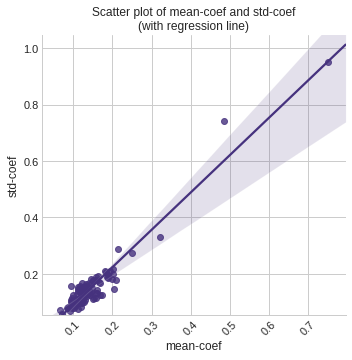

In [123]:
describe_data.describe_corpus_scatter(features_evaluation_df, wdir, "mean-coef", "std-coef", "Features for Genre in CORDE", do_cull = True, problematic_values = ["?","n.av.", None, "unknown","other","mixed", "-"],)

In [128]:
st_tests.calculate_regression(features_evaluation_df, "mean-coef", "std-coef")

(100, 7)
(100, 7)


LinregressResult(slope=1.3243004296131036, intercept=-0.04113094465409062, rvalue=0.9612792623252842, pvalue=1.163277303168022e-56, stderr=0.038350006168422116)

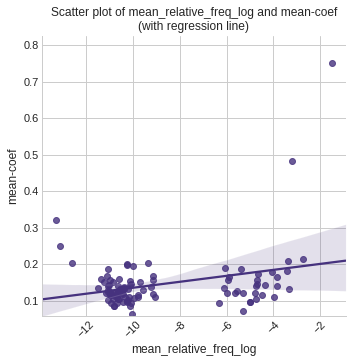

In [125]:
describe_data.describe_corpus_scatter(features_evaluation_df, wdir, "mean_relative_freq_log", "mean-coef", "Features for Genre in CORDE", do_cull = True, problematic_values = ["?","n.av.", None, "unknown","other","mixed", "-"],)

In [116]:
st_tests.calculate_regression(features_evaluation_df, "mean_relative_freq_log", "mean-coef")

(100, 6)
(100, 6)


LinregressResult(slope=0.0081725598181223, intercept=0.2176801640338037, rvalue=0.2942070030573938, pvalue=0.002967029467959013, stderr=0.00268183842669733)

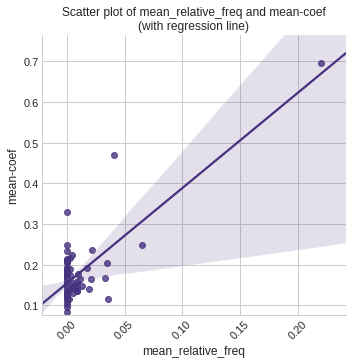

In [72]:
describe_data.describe_corpus_scatter(features_evaluation_df, wdir, "mean_relative_freq", "mean-coef", "Features for Genre in CORDE", do_cull = True, problematic_values = ["?","n.av.", None, "unknown","other","mixed", "-"],)

In [27]:
st_tests.calculate_regression(features_evaluation_df, "median-coef-abs", "mean_relative_freq")

(1996, 5)
(1996, 5)


LinregressResult(slope=4.861919674289362, intercept=-0.0007547145550965306, rvalue=0.2563120595337139, pvalue=2.6122561805135788e-31, stderr=0.41060127725186496)

In [28]:
st_tests.calculate_regression(features_evaluation_df, "median_coef_log", "mean_relative_freq_log")

(1996, 5)
(1996, 5)


LinregressResult(slope=173.49280965956854, intercept=-9.339397580882476, rvalue=0.054785234153987394, pvalue=0.014368192350422979, stderr=70.81131355253248)

# By Decades

In [12]:
corde_metadatos_500 = pd.read_csv(wdir+"corde_metadatos_500.csv", sep="\t", index_col=0)

In [13]:
corde_freq_500 = pd.read_parquet(wdir+"corde_freq_500_T.parquet").T.fillna(0)

In [15]:
corde_metadatos_500["siglo"].head()

archivo
aazorin     20
abacca      20
abaddon     20
abadengo    20
abajo       20
Name: siglo, dtype: int64

In [20]:
corde_metadatos_500["decada"] = corde_metadatos_500["prim_fecha"].astype(str).str.slice(0,3)+"0"

In [61]:
i = 0
for decada in sorted(list(set(corde_metadatos_500["decada"]))):
    print("decade: ",decada)
    decade_corde_metadatos_500 = corde_metadatos_500.loc[corde_metadatos_500["decada"] == decada]
    
    decade_corde_freq_500 = corde_freq_500.loc[decade_corde_metadatos_500.index]
    
    print(decade_corde_metadatos_500.head())
    print(decade_corde_freq_500.head())
    
    results = classify.classify(wdir = wdir, freq_table  = decade_corde_freq_500, metadata = decade_corde_metadatos_500,
                      classes = sorted(list(set(decade_corde_metadatos_500["model_tema"]))),
                      verbose = True,
                      methods = ["LR"],#[,"GN"],
                      max_MFFs = [3000],
                      text_representations = ["zscores"],
                      typographies = [True], sampling_mode = "cross", make_relative = False, under_sample_method = "lpc-max",
                                maximum_cases = 1000)

    results["decade"] = decada
    results.to_csv(wdir + "decade_results/evaluation"+str(decada)+".csv", sep="\t")

    if i == 0:
        several_decades_results = results.copy()
    else:
        several_decades_results = pd.concat([several_decades_results,results])
    i += 1
                                              

decade:  1470
                   archivo.1  \
archivo                        
abulensesub6    abulensesub6   
abulensesub7    abulensesub7   
abulensesub8    abulensesub8   
abulensesub85  abulensesub85   
abulensesub86  abulensesub86   

                                                          titulo    autor  \
archivo                                                                     
abulensesub6   Enrique IV impide la venta de propiedades [Doc...  Anónimo   
abulensesub7   Enrique IV confirma sus cartas anteriores rela...  Anónimo   
abulensesub8   Los Reyes Católicos confirman el privilegio de...  Anónimo   
abulensesub85  Poder para tomar a censo algunas heredades [Do...  Anónimo   
abulensesub86  Recibimiento a censo de algunas heredades [Doc...  Anónimo   

                 pais fechacre                            tema  medio  formas  \
archivo                                                                         
abulensesub6   España     1473  Derecho: Documentos notaria

textual representation:  zscores []
(558, 5590)
MFW 3000
The three first MFWs:  [',', 'e', 'que']
The three last MFWs:  ['tus', 'dezía', 'aventura']
method used:	 LR
(558,)
(558, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Ciencias aplicadas
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Ciencias sociales y humanidades
* Culling data
labels done
Counter({'0': 556, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(558,)
(558, 7000)
Counter({'0': 556, '1': 2})
(558, 7000) (558,)
Least popupated class value:	  2
Labels shape (558,) 
 Data shape (558, 5590)
size after culling data: (558, 5590) (558

The three first MFWs:  [',', 'e', 'que']
The three last MFWs:  ['tus', 'dezía', 'aventura']
method used:	 LR
(558,)
(558, 3000)
undersampling lpc-max
undersampled (68,) (68, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=16.295639672637154, pvalue=5.4827355059759924e-08)
Class: 	 Derecho
Scores:
 	 f1      0.695
rec     1.000
prec    0.534
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.19499999999999995


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 555, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(558,)
(558, 7000)
Counter({'0': 555, '1': 3})
(558, 7000) (558,)
Least popupated class value:	  3
Labels shape (558,) 
 Data shape (558, 5590)
size after culling data: (558, 5590) (558,)
typography  True
textual repre

The three first MFWs:  [',', 'e', 'que']
The three last MFWs:  ['tus', 'dezía', 'aventura']
method used:	 LR
(558,)
(558, 3000)
undersampling lpc-max
undersampled (28,) (28, 3000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Verso lírico tradicional
* Culling data
labels done
Counter({'0': 556, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(558,)
(558, 7000)
Counter({'0': 556, '1': 2})
(558, 7000) (558,)
Least popupated class value:	  2
Labels shape (558,) 
 Data shape (558, 5590)
size after culling data: (558, 5590) (558,)
typography  True
textual representation:  zscores []
(558, 

textual representation:  zscores ['tropas', 'revolución', 'suceso', 'caja', 'supuesto', 'luces', 'jóvenes', 'posición', 'trozos', 'conducta', 'longitud', 'café', 'enseñanza', 'hubieran', 'genio', 'jardines', 'individuos', 'rojo', 'riesgo', 'datos', 'empleo', 'jehová', 'cuzco', 'precisamente', 'exclamó', 'destino', 'superficie', 'práctica', 'cuadro', 'países', 'expresión', 'desgracia', 'yndios', 'empezó', 'fórmula', 'actividad', 'frecuencia', 'jardín', 'político', 'sucesos', 'pizarro', 'necesita', 'ustedes', 'desarrollo', 'líneas', 'clases', 'chile', '§', 'resultados', 'débil', 'pesetas', 'tendría', 'fenómeno', 'últimas', 'ignacio', 'frecuente', 'progreso', 'taffullas', 'acento', 'usté', 'régimen', 'concepción', 'tabaco', 'conf', 'azúcar', 'rafael', 'cf', 'técnica', 'observación', 'ambiente', 'señorita', 'resuelto', 'producir', 'escritor', 'eje', 'células', 'director', 'decirse', 'sociales', 'descubrimiento', 'págs', 'núm', 'proyecto', 'productos', 'cólera', 'esfuerzos', 'cédula', 'kon'

The three first MFWs:  [',', 'y', 'que']
The three last MFWs:  ['infamia', 'caballeros', 'tristes']
method used:	 LR
(773,)
(773, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-6.5, pvalue=0.00011145078736861524)
Class: 	 Artes y espectáculos
Scores:
 	 f1      0.067
rec     0.050
prec    0.100
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
LR
-0.433


analysed class:	 Biografía
* Culling data
labels done
Counter({'0': 772, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['clarvaro']
(773,)
(773, 7000)
Counter({'0': 772})
(772, 7000) (772,)
Least popupated class value:	  772
Labels shape (772,) 
 Data shape (772, 6250)
size after culling data: (772, 6250) (772,)
typography  True
textua

The three first MFWs:  [',', 'y', 'que']
The three last MFWs:  ['infamia', 'caballeros', 'tristes']
method used:	 LR
(773,)
(773, 3000)
undersampling lpc-max
undersampled (114,) (114, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.262384566774864, pvalue=6.402874715951424e-07)
Class: 	 Derecho
Scores:
 	 f1      0.745
rec     1.000
prec    0.598
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.245


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 766, '1': 7})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(773,)
(773, 7000)
Counter({'0': 766, '1': 7})
(773, 7000) (773,)
Least popupated class value:	  7
Labels shape (773,) 
 Data shape (773, 6263)
size after culling data: (773, 6263) (773,)
typography  True
textual representa

The three first MFWs:  [',', 'y', 'que']
The three last MFWs:  ['infamia', 'caballeros', 'tristes']
method used:	 LR
(773,)
(773, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.9277002188456, pvalue=0.016819803632258403)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.167
rec     0.150
prec    0.200
dtype: float64
p-value:  0.0168
Baseline: 		 0.5
LR
-0.33299999999999996
                             class  mean_f1  mean_rec  mean_prec  baseline  \
0             Artes y espectáculos    0.067      0.05      0.100       0.5   
1                          Derecho    0.745      1.00      0.598       0.5   
2            Historia y documentos    0.000      0.00      0.000       0.5   
3  Novela y otras formas similares    0.000      0.00      0.000       0.5   
4                  Prosa didáctica    0.000      0.00      0.000       0.5   

   f1-ba

textual representation:  zscores ['coche', 'máquina', 'café', 'enseñanza', 'datos', 'empleo', 'jehová', 'cuzco', 'exclamó', 'cuadro', 'países', 'expresión', 'njn', 'empezó', 'fórmula', 'frecuencia', 'político', 'necesita', 'ustedes', 'desarrollo', 'clases', '§', 'resultados', 'independencia', 'pesetas', 'encontrado', 'fenómeno', 'frecuente', 'progreso', 'taffullas', 'usté', 'régimen', 'funciones', 'aplicación', 'tabaco', 'conf', 'cf', 'técnica', 'observación', 'ambiente', 'resuelto', 'producir', 'eje', 'células', 'eduardo', 'decirse', 'sociales', 'núm', 'proyecto', 'esfuerzos', 'kon', 'estructura', 'políticos', 'asuntos', 'crítica', 'esfera', 'formación', 'completamente', 'método', 'adiós', 'supremo', 'educación', 'grupos', 'existen', 'energía', 'función', 'mj', 'inútil', 'actitud', 'período', 'empieza', 'quijote', 'infeliz', 'castiella', 'contacto', 'ménos', 'célebre', 'éxito', 'entusiasmo', 'profesor', 'muchacha', 'central', 'páginas', 'organización', 'frase', 'teoría', 'sonrisa', 'p

The three first MFWs:  [',', 'misión', 'preciso']
The three last MFWs:  ['conveniente', 'postre', 'situada']
method used:	 LR
(1684,)
(1684, 3000)
undersampling lpc-max
undersampled (20,) (20, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.2499999999999996, pvalue=0.05100326070695081)
Class: 	 Ciencias aplicadas
Scores:
 	 f1      0.2
rec     0.2
prec    0.2
dtype: float64
p-value:  0.051
Baseline: 		 0.5
LR
-0.3


analysed class:	 Ciencias exactas, físicas y naturales
* Culling data
labels done
Counter({'0': 1683, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['tabldive']
(1684,)
(1684, 7000)
Counter({'0': 1683})
(1683, 7000) (1683,)
Least popupated class value:	  1683
Labels shape (1683,) 
 Data shape (1683, 6572)
size after culling d

textual representation:  zscores ['coche', 'máquina', 'café', 'enseñanza', 'datos', 'empleo', 'jehová', 'cuzco', 'exclamó', 'cuadro', 'países', 'expresión', 'njn', 'empezó', 'fórmula', 'frecuencia', 'político', 'necesita', 'ustedes', 'desarrollo', 'clases', '§', 'resultados', 'independencia', 'pesetas', 'encontrado', 'fenómeno', 'frecuente', 'progreso', 'taffullas', 'usté', 'régimen', 'funciones', 'aplicación', 'tabaco', 'conf', 'cf', 'técnica', 'observación', 'ambiente', 'resuelto', 'producir', 'eje', 'células', 'eduardo', 'decirse', 'sociales', 'núm', 'proyecto', 'esfuerzos', 'kon', 'estructura', 'políticos', 'asuntos', 'crítica', 'esfera', 'formación', 'completamente', 'método', 'adiós', 'supremo', 'educación', 'grupos', 'existen', 'energía', 'función', 'mj', 'inútil', 'actitud', 'período', 'empieza', 'quijote', 'infeliz', 'castiella', 'contacto', 'ménos', 'célebre', 'éxito', 'entusiasmo', 'profesor', 'muchacha', 'central', 'páginas', 'organización', 'frase', 'teoría', 'sonrisa', 'p

textual representation:  zscores []
(1683, 6558)
MFW 3000
The three first MFWs:  [',', 'misión', 'diario']
The three last MFWs:  ['ancha', 'hacienda', 'vana']
After culling the class Prosa dramática extensa  can't be divided in two groups. This category is going to be ignored


analysed class:	 Prosa narrativa breve
* Culling data
labels done
Counter({'0': 1683, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['cap']
(1684,)
(1684, 7000)
Counter({'0': 1683})
(1683, 7000) (1683,)
Least popupated class value:	  1683
Labels shape (1683,) 
 Data shape (1683, 6571)
size after culling data: (1683, 6571) (1683,)
typography  True
textual representation:  zscores []
(1683, 6571)
MFW 3000
The three first MFWs:  [',', 'misión', 'moisén']
The three last MFWs:  ['ovejas', 'hacen', 'obrero']
After culling the class Prosa narrativa breve  can't be

The three first MFWs:  [',', 'misión', 'preciso']
The three last MFWs:  ['conveniente', 'postre', 'situada']
method used:	 LR
(1684,)
(1684, 3000)
undersampling lpc-max
undersampled (46,) (46, 3000) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-6.5, pvalue=0.00011145078736861524)
Class: 	 Sociedad
Scores:
 	 f1      0.067
rec     0.050
prec    0.100
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
LR
-0.433


analysed class:	 Verso dramático breve
* Culling data
labels done
Counter({'0': 1670, '1': 14})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  14
Labels shape (1684,) 
 Data shape (1684, 7000)
size after culling data: (1684, 7000) (1684,)
typography  True
textual representation:  zscores ['coche', 'máquina', 'café', 'enseñanza', 'datos', 'empleo', 'jehová', 'cuzco', 'exclamó', 'cuadro', 'países', 'expresión', 'njn', 'empezó', 'fórmula', 'frecuencia', 'polític

The three first MFWs:  [',', 'misión', 'preciso']
The three last MFWs:  ['conveniente', 'postre', 'situada']
method used:	 LR
(1684,)
(1684, 3000)
undersampling lpc-max
undersampled (22,) (22, 3000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.2499999999999996, pvalue=0.05100326070695081)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.2
rec     0.2
prec    0.2
dtype: float64
p-value:  0.051
Baseline: 		 0.5
LR
-0.3


analysed class:	 Verso lírico tradicional
* Culling data
labels done
Counter({'0': 1682, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(1684,)
(1684, 7000)
Counter({'0': 1682, '1': 2})
(1684, 7000) (1684,)
Least popupated class value:	  2
Labels shape (1684,) 
 Data shape (1684, 6573)
size after culling data: (1684, 6573) (1684

textual representation:  zscores ['tropas', 'círculo', 'supuesto', 'auie', 'coche', 'jóvenes', 'longitud', 'máquina', 'café', 'importantes', 'literatura', 'sombras', 'curiosidad', 'objetos', 'individuos', 'constitución', 'rojo', 'debían', 'jehová', 'cuzco', 'precisamente', 'aparece', 'destino', 'resultado', 'práctica', 'problema', 'países', 'expresión', 'desgracia', 'inmediatamente', 'fórmula', 'ramón', 'actividad', 'facilidad', 'pizarro', 'necesita', 'ustedes', 'desarrollo', 'acciones', 'clases', 'chile', '§', 'mr', 'independencia', 'débil', 'fenómeno', 'jurisdicción', 'fl', 'frecuente', 'progreso', 'taffullas', 'acento', 'representación', 'usté', 'funciones', 'tabaco', 'acababa', 'conf', 'pretende', 'rafael', 'cf', 'técnica', 'recursos', 'ambiente', 'señorita', 'producir', 'eje', 'células', 'eduardo', 'director', 'sociales', 'constituye', 'proyecto', 'productos', 'imágenes', 'esfuerzos', 'kon', 'estructura', 'políticos', 'crítica', 'extranjeros', 'números', 'poema', 'completamente', 

textual representation:  zscores ['tropas', 'círculo', 'supuesto', 'auie', 'coche', 'jóvenes', 'longitud', 'máquina', 'café', 'importantes', 'literatura', 'sombras', 'curiosidad', 'objetos', 'individuos', 'constitución', 'rojo', 'debían', 'jehová', 'cuzco', 'precisamente', 'aparece', 'destino', 'resultado', 'práctica', 'problema', 'países', 'expresión', 'desgracia', 'inmediatamente', 'fórmula', 'ramón', 'actividad', 'facilidad', 'pizarro', 'necesita', 'ustedes', 'desarrollo', 'acciones', 'clases', 'chile', '§', 'mr', 'independencia', 'débil', 'fenómeno', 'jurisdicción', 'fl', 'frecuente', 'progreso', 'taffullas', 'acento', 'representación', 'usté', 'funciones', 'tabaco', 'acababa', 'conf', 'pretende', 'rafael', 'cf', 'técnica', 'recursos', 'ambiente', 'señorita', 'producir', 'eje', 'células', 'eduardo', 'director', 'sociales', 'constituye', 'proyecto', 'productos', 'imágenes', 'esfuerzos', 'kon', 'estructura', 'políticos', 'crítica', 'extranjeros', 'números', 'poema', 'completamente', 

textual representation:  zscores []
(615, 6334)
MFW 3000
The three first MFWs:  [',', 'dejé', 'raza']
The three last MFWs:  ['remos', 'pedían', 'morada']
method used:	 LR
(615,)
(615, 3000)
undersampling lpc-max
undersampled (18,) (18, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Ciencias aplicadas
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Ciencias exactas, físicas y naturales
* Culling data
labels done
Counter({'0': 613, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(615,)
(615, 7000)
Counter({'0': 613, '1': 2})
(615, 7000) (615,)
Least popupated class value:	  2
Labels shape (615,) 
 Data shape (615, 6334)
size after culling data: (61

The three first MFWs:  [',', 'dejé', 'raza']
The three last MFWs:  ['remos', 'pedían', 'morada']
method used:	 LR
(615,)
(615, 3000)
undersampling lpc-max
undersampled (460,) (460, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=23.21626058834563, pvalue=2.4283748830410276e-09)
Class: 	 Derecho
Scores:
 	 f1      0.797
rec     0.996
prec    0.665
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.29700000000000004


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 563, '1': 52})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  52
Labels shape (615,) 
 Data shape (615, 7000)
size after culling data: (615, 7000) (615,)
typography  True
textual representation:  zscores ['tropas', 'círculo', 'supuesto', 'auie', 'coche', 'jóvenes', 'longitud', 'máquina', 'café', 'importantes', 'literatura', 'sombras', 'curiosidad', 'objetos', 'individuos'

The three first MFWs:  [',', 'dejé', 'raza']
The three last MFWs:  ['remos', 'pedían', 'morada']
method used:	 LR
(615,)
(615, 3000)
undersampling lpc-max
undersampled (104,) (104, 3000) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.293412361469316, pvalue=0.047508703154288894)
Class: 	 Historia y documentos
Scores:
 	 f1      0.625
rec     0.480
prec    0.967
dtype: float64
p-value:  0.0475
Baseline: 		 0.5
LR
0.125


analysed class:	 Novela y otras formas similares
* Culling data
labels done
Counter({'0': 609, '1': 6})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(615,)
(615, 7000)
Counter({'0': 609, '1': 6})
(615, 7000) (615,)
Least popupated class value:	  6
Labels shape (615,) 
 Data shape (615, 6334)
size after culling data: (615, 6334) (615,)

textual representation:  zscores ['tropas', 'círculo', 'supuesto', 'auie', 'coche', 'jóvenes', 'longitud', 'máquina', 'café', 'importantes', 'literatura', 'sombras', 'curiosidad', 'objetos', 'individuos', 'constitución', 'rojo', 'debían', 'jehová', 'cuzco', 'precisamente', 'aparece', 'destino', 'resultado', 'práctica', 'problema', 'países', 'expresión', 'desgracia', 'inmediatamente', 'fórmula', 'ramón', 'actividad', 'facilidad', 'pizarro', 'necesita', 'ustedes', 'desarrollo', 'acciones', 'clases', 'chile', '§', 'mr', 'independencia', 'débil', 'fenómeno', 'jurisdicción', 'fl', 'frecuente', 'progreso', 'taffullas', 'acento', 'representación', 'usté', 'funciones', 'tabaco', 'acababa', 'conf', 'pretende', 'rafael', 'cf', 'técnica', 'recursos', 'ambiente', 'señorita', 'producir', 'eje', 'células', 'eduardo', 'director', 'sociales', 'constituye', 'proyecto', 'productos', 'imágenes', 'esfuerzos', 'kon', 'estructura', 'políticos', 'crítica', 'extranjeros', 'números', 'poema', 'completamente', 

textual representation:  zscores ['tropas', 'círculo', 'supuesto', 'auie', 'coche', 'jóvenes', 'longitud', 'máquina', 'café', 'importantes', 'literatura', 'sombras', 'curiosidad', 'objetos', 'individuos', 'constitución', 'rojo', 'debían', 'jehová', 'cuzco', 'precisamente', 'aparece', 'destino', 'resultado', 'práctica', 'problema', 'países', 'expresión', 'desgracia', 'inmediatamente', 'fórmula', 'ramón', 'actividad', 'facilidad', 'pizarro', 'necesita', 'ustedes', 'desarrollo', 'acciones', 'clases', 'chile', '§', 'mr', 'independencia', 'débil', 'fenómeno', 'jurisdicción', 'fl', 'frecuente', 'progreso', 'taffullas', 'acento', 'representación', 'usté', 'funciones', 'tabaco', 'acababa', 'conf', 'pretende', 'rafael', 'cf', 'técnica', 'recursos', 'ambiente', 'señorita', 'producir', 'eje', 'células', 'eduardo', 'director', 'sociales', 'constituye', 'proyecto', 'productos', 'imágenes', 'esfuerzos', 'kon', 'estructura', 'políticos', 'crítica', 'extranjeros', 'números', 'poema', 'completamente', 

textual representation:  zscores []
(615, 6334)
MFW 3000
The three first MFWs:  [',', 'dejé', 'raza']
The three last MFWs:  ['remos', 'pedían', 'morada']
method used:	 LR
(615,)
(615, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Verso narrativo culto
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Verso narrativo tradicional
* Culling data
labels done
Counter({'0': 611, '1': 4})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(615,)
(615, 7000)
Counter({'0': 611, '1': 4})
(615, 7000) (615,)
Least popupated class value:	  4
Labels shape (615,) 
 Data shape (615, 6334)
size after culling data: (615, 633

textual representation:  zscores []
(567, 6286)
MFW 3000
The three first MFWs:  [',', 'en', 'de']
The three last MFWs:  ['acometer', 'li', 'faziendo']
After culling the class ?  can't be divided in two groups. This category is going to be ignored


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 549, '1': 19})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  19
Labels shape (568,) 
 Data shape (568, 7000)
size after culling data: (568, 7000) (568,)
typography  True
textual representation:  zscores ['supuesto', 'luces', 'coche', 'jóvenes', 'trozos', 'conducta', 'máquina', 'café', 'literatura', 'enseñanza', 'objetos', 'jehová', 'cuzco', 'exclamó', 'consecuencia', 'destino', 'produce', 'resultado', 'eglesia', 'cuadro', 'problema', 'países', 'expresión', 'inmediatamente', 'fórmula', 'actividad', 'frecuencia', 'político', 'sucesos', 'pizarro', 'necesita', 'ustedes', 'otrossi', 'desarrollo', 'clases', 'tono', 'chile', 

The three first MFWs:  [',', 'en', 'de']
The three last MFWs:  ['frialdad', 'tributo', 'colegio']
method used:	 LR
(568,)
(568, 3000)
undersampling lpc-max
undersampled (38,) (38, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-4.125, pvalue=0.0025786389436393015)
Class: 	 Artes y espectáculos
Scores:
 	 f1      0.133
rec     0.100
prec    0.200
dtype: float64
p-value:  0.0026
Baseline: 		 0.5
LR
-0.367


analysed class:	 Cartas y relaciones
* Culling data
labels done
Counter({'0': 565, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(568,)
(568, 7000)
Counter({'0': 565, '1': 3})
(568, 7000) (568,)
Least popupated class value:	  3
Labels shape (568,) 
 Data shape (568, 6308)
size after culling data: (568, 6308) (568,)
typography  True
textua

The three first MFWs:  [',', 'en', 'de']
The three last MFWs:  ['frialdad', 'tributo', 'colegio']
method used:	 LR
(568,)
(568, 3000)
undersampling lpc-max
undersampled (562,) (562, 3000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=26.359011396665384, pvalue=7.86394891861134e-10)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1      0.754
rec     0.950
prec    0.625
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.254


analysed class:	 Derecho
* Culling data
labels done
Counter({'0': 469, '1': 99})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  99
Labels shape (568,) 
 Data shape (568, 7000)
size after culling data: (568, 7000) (568,)
typography  True
textual representation:  zscores ['supuesto', 'luces', 'coche', 'jóvenes', 'trozos', 'conducta', 'máquina', 'café', 'literatura', 'enseñanza', 'objetos', 'jehová', 'cuzco', 'exclamó',

The three first MFWs:  [',', 'en', 'de']
The three last MFWs:  ['frialdad', 'tributo', 'colegio']
method used:	 LR
(568,)
(568, 3000)
undersampling lpc-max
undersampled (198,) (198, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.3679885985990577, pvalue=0.7213875503937313)
Class: 	 Derecho
Scores:
 	 f1      0.485
rec     0.343
prec    0.869
dtype: float64
p-value:  0.7214
Baseline: 		 0.5
LR
-0.015000000000000013


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 566, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(568,)
(568, 7000)
Counter({'0': 566, '1': 2})
(568, 7000) (568,)
Least popupated class value:	  2
Labels shape (568,) 
 Data shape (568, 6308)
size after culling data: (568, 6308) (568,)
typography  True
tex

The three first MFWs:  [',', 'en', 'de']
The three last MFWs:  ['frialdad', 'tributo', 'colegio']
method used:	 LR
(568,)
(568, 3000)
undersampling lpc-max
undersampled (12,) (12, 3000) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Verso dramático extenso
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Verso lírico culto
* Culling data
labels done
Counter({'0': 448, '1': 120})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  120
Labels shape (568,) 
 Data shape (568, 7000)
size after culling data: (568, 7000) (568,)
typography  True
textual representation:  zscores ['supuesto', 'luces', 'coche', 'jóvenes', 'trozos', 'conducta', 'máquina', 'café', 'literatura', 'enseñanza', 'objetos', 'jehová', 'cuzco', 'exclamó', 'consecuencia', 'destino', 'produce', 'res

The three first MFWs:  [',', 'en', 'de']
The three last MFWs:  ['frialdad', 'tributo', 'colegio']
method used:	 LR
(568,)
(568, 3000)
undersampling lpc-max
undersampled (240,) (240, 3000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.062117144338698, pvalue=5.906870331188491e-05)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.783
rec     0.658
prec    1.000
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
LR
0.28300000000000003


analysed class:	 Verso lírico tradicional
* Culling data
labels done
Counter({'0': 563, '1': 5})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(568,)
(568, 7000)
Counter({'0': 563, '1': 5})
(568, 7000) (568,)
Least popupated class value:	  5
Labels shape (568,) 
 Data shape (568, 6308)
size after culling data: (568, 6308) (56

The three first MFWs:  [',', 'a', 'en']
The three last MFWs:  ['doncellas', 'tregua', 'tempestad']
method used:	 LR
(211,)
(211, 3000)
undersampling lpc-max
undersampled (24,) (24, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.021164610559645, pvalue=0.07398274707182734)
Class: 	 Artes y espectáculos
Scores:
 	 f1      0.767
rec     0.750
prec    0.800
dtype: float64
p-value:  0.074
Baseline: 		 0.5
LR
0.267


analysed class:	 Cartas y relaciones
* Culling data
labels done
Counter({'0': 208, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(211,)
(211, 7000)
Counter({'0': 208, '1': 3})
(211, 7000) (211,)
Least popupated class value:	  3
Labels shape (211,) 
 Data shape (211, 6657)
size after culling data: (211, 6657) (211,)
typography  Tru

The three first MFWs:  [',', 'a', 'en']
The three last MFWs:  ['doncellas', 'tregua', 'tempestad']
method used:	 LR
(211,)
(211, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Novela y otras formas similares
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Class: 	 Novela y otras formas similares
Scores:
 	 f1      0.5
rec     0.5
prec    0.5
dtype: float64
p-value:  1.0
Baseline: 		 0.5
LR
0.0


analysed class:	 Prosa didáctica
* Culling data
labels done
Counter({'0': 209, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(211,)
(211, 7000)
Counter({'0': 209, '1': 2})
(211, 7000) (211,)
Least popupated class value:	  2
Labels shape (211,) 
 Data shape (211, 6657)
size after culling data: (211, 6657) (211,)
typography  True
textual representation

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.3535533905932736, pvalue=0.7357648598798121)
Class: 	 Verso dramático extenso
Scores:
 	 f1      0.571
rec     0.571
prec    0.571
dtype: float64
p-value:  0.7358
Baseline: 		 0.5
LR
0.07099999999999995


analysed class:	 Verso lírico culto
* Culling data
labels done
Counter({'0': 198, '1': 13})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  13
Labels shape (211,) 
 Data shape (211, 7000)
size after culling data: (211, 7000) (211,)
typography  True
textual representation:  zscores ['tropas', 'auie', 'çibdat', 'conducta', 'completo', 'café', 'literatura', 'datos', 'empleo', 'jehová', 'exclamó', 'eglesia', 'seer', 'países', 'njn', 'actividad', 'ustedes', 'otrossi', 'desarrollo', 'clases', 'resultados', 'mr', 'independencia', 'pesetas', 'fenómeno', 'fl', 'taffullas', 'usté', 'régimen', 'funciones', 'tabaco', 'ferrando', 'conf', 'cf', 'técnica', 'recursos', 'ambiente'

Least popupated class value:	  487
Labels shape (487,) 
 Data shape (487, 6633)
size after culling data: (487, 6633) (487,)
typography  True
textual representation:  zscores []
(487, 6633)
MFW 3000
The three first MFWs:  ['que', 'a', 'de']
The three last MFWs:  ['harás', 'llagas', 'creyó']
After culling the class ?  can't be divided in two groups. This category is going to be ignored


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 477, '1': 11})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  11
Labels shape (488,) 
 Data shape (488, 7000)
size after culling data: (488, 7000) (488,)
typography  True
textual representation:  zscores ['çibdat', 'máquina', 'café', 'literatura', 'jehová', 'exclamó', 'eglesia', 'problema', 'seer', 'países', 'expresión', 'njn', 'fórmula', 'actividad', 'anteriores', 'ustedes', 'desarrollo', 'clases', '§', 'heredat', 'independencia', 'pesetas', 'seres', 'fenómeno', 'fl', 'frecuente', 

The three first MFWs:  ['que', 'a', 'de']
The three last MFWs:  ['interiores', 'come', 'vivían']
method used:	 LR
(488,)
(488, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Cartas y relaciones
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.5162782844610219, pvalue=0.6181043849454184)
Class: 	 Cartas y relaciones
Scores:
 	 f1      0.553
rec     0.750
prec    0.450
dtype: float64
p-value:  0.6181
Baseline: 		 0.5
LR
0.05300000000000005


analysed class:	 Ciencias aplicadas
* Culling data
labels done
Counter({'0': 487, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['arquitec']
(488,)
(488, 7000)
Counter({'0': 487})
(487, 7000) (487,)
Least popupated class value:	  487
Labels shape (487,) 
 Data shape (487, 6633)
size after culling data: (487, 6633) (48

The three first MFWs:  ['que', 'a', 'de']
The three last MFWs:  ['interiores', 'come', 'vivían']
method used:	 LR
(488,)
(488, 3000)
undersampling lpc-max
undersampled (22,) (22, 3000) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Historia y documentos
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Novela y otras formas similares
* Culling data
labels done
Counter({'0': 487, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['veneris']
(488,)
(488, 7000)
Counter({'0': 487})
(487, 7000) (487,)
Least popupated class value:	  487
Labels shape (487,) 
 Data shape (487, 6630)
size after culling data: (487, 6630) (487,)
typography  True
textual represen

The three first MFWs:  ['que', 'a', 'de']
The three last MFWs:  ['interiores', 'come', 'vivían']
method used:	 LR
(488,)
(488, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.143303524935281, pvalue=0.06069426339475519)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1      0.267
rec     0.200
prec    0.400
dtype: float64
p-value:  0.0607
Baseline: 		 0.5
LR
-0.23299999999999998


analysed class:	 Religión
* Culling data
labels done
Counter({'0': 485, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(488,)
(488, 7000)
Counter({'0': 485, '1': 3})
(488, 7000) (488,)
Least popupated class value:	  3
Labels shape (488,) 
 Data shape (488, 6636)
size after culling data: (488, 6636) (488,)
typog

The three first MFWs:  ['que', 'a', 'de']
The three last MFWs:  ['interiores', 'come', 'vivían']
method used:	 LR
(488,)
(488, 3000)
undersampling lpc-max
undersampled (248,) (248, 3000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.61872077620502, pvalue=0.5514366440718328)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.527
rec     0.379
prec    0.930
dtype: float64
p-value:  0.5514
Baseline: 		 0.5
LR
0.027000000000000024


analysed class:	 Verso lírico tradicional
* Culling data
labels done
Counter({'0': 477, '1': 11})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  11
Labels shape (488,) 
 Data shape (488, 7000)
size after culling data: (488, 7000) (488,)
typography  True
textual representation:  zscores ['çibdat', 'máquina', 'café', 'literatura', 'jehová', 'exclamó', 'eglesia', 'problema', 'seer', 'países', 'expresión', 'njn', 'fórmula', 'activida

Least popupated class value:	  354
Labels shape (354,) 
 Data shape (354, 6673)
size after culling data: (354, 6673) (354,)
typography  True
textual representation:  zscores []
(354, 6673)
MFW 3000
The three first MFWs:  [',', 'que', 'a']
The three last MFWs:  ['banda', 'bajos', 'extraña']
After culling the class ?  can't be divided in two groups. This category is going to be ignored


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 341, '1': 14})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  14
Labels shape (355,) 
 Data shape (355, 7000)
size after culling data: (355, 7000) (355,)
typography  True
textual representation:  zscores ['tropas', 'logares', 'auie', 'luces', 'çibdat', 'café', 'genio', 'jehová', 'exclamó', 'seer', 'países', 'expresión', 'njn', 'fórmula', 'actividad', 'necesita', 'ustedes', 'otrossi', 'desarrollo', 'iohan', 'heredat', 'resultados', 'independencia', 'pesetas', 'fenómeno', 'progreso', 

The three first MFWs:  [',', 'que', 'a']
The three last MFWs:  ['firmeza', 'rogó', 'bajos']
method used:	 LR
(355,)
(355, 3000)
undersampling lpc-max
undersampled (78,) (78, 3000) lpc-max
cross validation sampling of  Cartas y relaciones
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.829457903364637, pvalue=0.01973986563227099)
Class: 	 Cartas y relaciones
Scores:
 	 f1      0.702
rec     0.617
prec    0.955
dtype: float64
p-value:  0.0197
Baseline: 		 0.5
LR
0.20199999999999996


analysed class:	 Ciencias aplicadas
* Culling data
labels done
Counter({'0': 353, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(355,)
(355, 7000)
Counter({'0': 353, '1': 2})
(355, 7000) (355,)
Least popupated class value:	  2
Labels shape (355,) 
 Data shape (355, 6675)
size after culling data: (355, 6675) (355,)
typography

The three first MFWs:  [',', 'que', 'a']
The three last MFWs:  ['firmeza', 'rogó', 'bajos']
method used:	 LR
(355,)
(355, 3000)
undersampling lpc-max
undersampled (10,) (10, 3000) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Historia y documentos
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Novela y otras formas similares
* Culling data
labels done
Counter({'0': 351, '1': 4})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(355,)
(355, 7000)
Counter({'0': 351, '1': 4})
(355, 7000) (355,)
Least popupated class value:	  4
Labels shape (355,) 
 Data shape (355, 6675)
size after culling data: (355, 6675) (355,)
typography  True
textual representation:  zsco

The three first MFWs:  [',', 'que', 'a']
The three last MFWs:  ['firmeza', 'rogó', 'bajos']
method used:	 LR
(355,)
(355, 3000)
undersampling lpc-max
undersampled (6,) (6, 3000) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.5, pvalue=0.6666666666666667)
Class: 	 Verso dramático breve
Scores:
 	 f1      0.333
rec     0.333
prec    0.333
dtype: float64
p-value:  0.6667
Baseline: 		 0.5
LR
-0.16699999999999998


analysed class:	 Verso dramático extenso
* Culling data
labels done
Counter({'0': 353, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(355,)
(355, 7000)
Counter({'0': 353, '1': 2})
(355, 7000) (355,)
Least popupated class value:	  2
Labels shape (355,) 
 Data shape (355, 6675)
size after culling data: (355, 6675) (355,)
typography  True

The three first MFWs:  [',', 'que', 'a']
The three last MFWs:  ['firmeza', 'rogó', 'bajos']
method used:	 LR
(355,)
(355, 3000)
undersampling lpc-max
undersampled (24,) (24, 3000) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.181818181818182, pvalue=0.05700534943789385)
Class: 	 Verso lírico tradicional
Scores:
 	 f1      0.233
rec     0.200
prec    0.300
dtype: float64
p-value:  0.057
Baseline: 		 0.5
LR
-0.267


analysed class:	 Verso narrativo culto
* Culling data
labels done
Counter({'0': 353, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(355,)
(355, 7000)
Counter({'0': 353, '1': 2})
(355, 7000) (355,)
Least popupated class value:	  2
Labels shape (355,) 
 Data shape (355, 6675)
size after culling data: (355, 6675) (355,)
typography

Least popupated class value:	  577
Labels shape (577,) 
 Data shape (577, 6721)
size after culling data: (577, 6721) (577,)
typography  True
textual representation:  zscores []
(577, 6721)
MFW 3000
The three first MFWs:  ['que', 'apres', 'nj']
The three last MFWs:  ['ovidio', 'mancebos', 'muralla']
After culling the class ?  can't be divided in two groups. This category is going to be ignored


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 546, '1': 32})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  32
Labels shape (578,) 
 Data shape (578, 7000)
size after culling data: (578, 7000) (578,)
typography  True
textual representation:  zscores ['çibdat', 'completo', 'café', 'literatura', 'jehová', 'eglesia', 'njn', 'fórmula', 'ustedes', 'otrossi', 'desarrollo', 'iohan', 'clases', 'heredat', 'resultados', 'independencia', 'pesetas', 'fenómeno', 'fl', 'taffullas', 'usté', 'funciones', 'tabaco', 'ferrando', 'conf', 

textual representation:  zscores []
(577, 6719)
MFW 3000
The three first MFWs:  ['que', 'apres', 'nj']
The three last MFWs:  ['desdén', 'guzmán', 'movimiento']
After culling the class Ciencias aplicadas  can't be divided in two groups. This category is going to be ignored


analysed class:	 Ciencias exactas, físicas y naturales
* Culling data
labels done
Counter({'0': 575, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(578,)
(578, 7000)
Counter({'0': 575, '1': 3})
(578, 7000) (578,)
Least popupated class value:	  3
Labels shape (578,) 
 Data shape (578, 6723)
size after culling data: (578, 6723) (578,)
typography  True
textual representation:  zscores []
(578, 6723)
MFW 3000
The three first MFWs:  ['que', 'asý', 'ynfante']
The three last MFWs:  ['resultó', 'obliga', 'corporal']
method used:	 LR
(578,)
(578, 3000)
undersampling lpc-m

(578, 7000)
MFW 3000
The three first MFWs:  ['que', 'asý', 'ynfante']
The three last MFWs:  ['resultó', 'obliga', 'corporal']
method used:	 LR
(578,)
(578, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.2499999999999996, pvalue=0.05100326070695081)
Class: 	 Historia y documentos
Scores:
 	 f1      0.2
rec     0.2
prec    0.2
dtype: float64
p-value:  0.051
Baseline: 		 0.5
LR
-0.3


analysed class:	 Novela y otras formas similares
* Culling data
labels done
Counter({'0': 572, '1': 6})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(578,)
(578, 7000)
Counter({'0': 572, '1': 6})
(578, 7000) (578,)
Least popupated class value:	  6
Labels shape (578,) 
 Data shape (578, 6723)
size after culling data

The three first MFWs:  ['que', 'asý', 'ynfante']
The three last MFWs:  ['resultó', 'obliga', 'corporal']
method used:	 LR
(578,)
(578, 3000)
undersampling lpc-max
undersampled (20,) (20, 3000) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.6123724356957944, pvalue=0.5554454421055857)
Class: 	 Religión
Scores:
 	 f1      0.6
rec     0.6
prec    0.6
dtype: float64
p-value:  0.5554
Baseline: 		 0.5
LR
0.09999999999999998


analysed class:	 Sociedad
* Culling data
labels done
Counter({'0': 575, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(578,)
(578, 7000)
Counter({'0': 575, '1': 3})
(578, 7000) (578,)
Least popupated class value:	  3
Labels shape (578,) 
 Data shape (578, 6723)
size after culling data: (578, 6723) (578,)
typography  True
textual representa

The three first MFWs:  ['que', 'asý', 'ynfante']
The three last MFWs:  ['resultó', 'obliga', 'corporal']
method used:	 LR
(578,)
(578, 3000)
undersampling lpc-max
undersampled (234,) (234, 3000) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.542935114786257, pvalue=2.3004557216466745e-06)
Class: 	 Verso lírico tradicional
Scores:
 	 f1      0.722
rec     0.805
prec    0.665
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.22199999999999998
                                   class  mean_f1  mean_rec  mean_prec  \
0                   Artes y espectáculos    0.726     0.950      0.627   
1                    Cartas y relaciones    0.347     0.283      0.500   
2  Ciencias exactas, físicas y naturales    0.000     0.000      0.000   
3        Ciencias sociales y humanidades    0.000     0.000      0.000   
4                                Derecho    0.665     0.565      0.900   

   baseline  

Counter({'0': 372})
(372, 7000) (372,)
Least popupated class value:	  372
Labels shape (372,) 
 Data shape (372, 6611)
size after culling data: (372, 6611) (372,)
typography  True
textual representation:  zscores []
(372, 6611)
MFW 3000
The three first MFWs:  [',', 'que', 'soldán']
The three last MFWs:  ['posesión', 'resulta', 'armados']
After culling the class ?  can't be divided in two groups. This category is going to be ignored


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 332, '1': 41})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  41
Labels shape (373,) 
 Data shape (373, 7000)
size after culling data: (373, 7000) (373,)
typography  True
textual representation:  zscores ['tropas', 'çibdat', 'completo', 'café', 'literatura', 'individuos', 'datos', 'empleo', 'jehová', 'ge', 'eglesia', 'expresión', 'njn', 'anteriores', 'ustedes', 'otrossi', 'serie', 'desarrollo', 'heredat', 'resultados', 'independencia'

The three first MFWs:  [',', 'que', 'eduardo']
The three last MFWs:  ['alvarez', 'continuamente', 'electo']
method used:	 LR
(373,)
(373, 3000)
undersampling lpc-max
undersampled (120,) (120, 3000) lpc-max
cross validation sampling of  Cartas y relaciones
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.2535101467585905, pvalue=0.0005252416679711736)
Class: 	 Cartas y relaciones
Scores:
 	 f1      0.678
rec     0.617
prec    0.767
dtype: float64
p-value:  0.0005
Baseline: 		 0.5
LR
0.17800000000000005


analysed class:	 Ciencias aplicadas
* Culling data
labels done
Counter({'0': 370, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(373,)
(373, 7000)
Counter({'0': 370, '1': 3})
(373, 7000) (373,)
Least popupated class value:	  3
Labels shape (373,) 
 Data shape (373, 6623)
size after culling data: (373, 66

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.92355013807072, pvalue=1.1792836785660101e-07)
Class: 	 Derecho
Scores:
 	 f1      0.805
rec     0.962
prec    0.696
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.30500000000000005


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 363, '1': 10})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  10
Labels shape (373,) 
 Data shape (373, 7000)
size after culling data: (373, 7000) (373,)
typography  True
textual representation:  zscores ['tropas', 'çibdat', 'completo', 'café', 'literatura', 'individuos', 'datos', 'empleo', 'jehová', 'ge', 'eglesia', 'expresión', 'njn', 'anteriores', 'ustedes', 'otrossi', 'serie', 'desarrollo', 'heredat', 'resultados', 'independencia', 'pesetas', 'ij', 'seres', 'fenómeno', 'fl', 'ignacio', 'taffullas', 'usté', 'funciones', 'aplicación', 'cf', 'técnica', 'recursos', 'ambiente', 'señorita', 'ihesu', 's

textual representation:  zscores []
(373, 6623)
MFW 3000
The three first MFWs:  [',', 'que', 'eduardo']
The three last MFWs:  ['alvarez', 'continuamente', 'electo']
method used:	 LR
(373,)
(373, 3000)
undersampling lpc-max
undersampled (10,) (10, 3000) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.4082482904638629, pvalue=0.7040000000000002)
Class: 	 Prosa narrativa breve
Scores:
 	 f1      0.4
rec     0.4
prec    0.4
dtype: float64
p-value:  0.704
Baseline: 		 0.5
LR
-0.09999999999999998


analysed class:	 Religión
* Culling data
labels done
Counter({'0': 361, '1': 12})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  12
Labels shape (373,) 
 Data shape (373, 7000)
size after culling data: (373, 7000) (373,)
typography  True
textual representation:  zscores ['tropas', 'çibdat', 'completo', 'café', 'literatura', 'individuos', 'datos', 'empleo', 'jehov

textual representation:  zscores ['tropas', 'çibdat', 'completo', 'café', 'literatura', 'individuos', 'datos', 'empleo', 'jehová', 'ge', 'eglesia', 'expresión', 'njn', 'anteriores', 'ustedes', 'otrossi', 'serie', 'desarrollo', 'heredat', 'resultados', 'independencia', 'pesetas', 'ij', 'seres', 'fenómeno', 'fl', 'ignacio', 'taffullas', 'usté', 'funciones', 'aplicación', 'cf', 'técnica', 'recursos', 'ambiente', 'señorita', 'ihesu', 'ssi', 'células', 'director', 'sociales', 'págs', 'verdat', 'kon', 'estructura', 'sse', 'crítica', 'formación', 'completamente', 'método', 'incluso', 'grupos', 'existen', 'energía', 'función', 'período', 'contacto', 'gr', 'éxito', 'entusiasmo', 'profesor', 'páginas', 'dixieron', 'organización', 'completa', 'fablar', 'frase', 'depues', 'teoría', 'sonrisa', 'país', 'grant', 'usted', 'mantequilla', 'patatas', 'tipo', 'jefe', 'minutos', 'nacional', 'social', 'art', 'pereza', 'grupo', 'américa', 'exactamente', 'contestó', 'adonay', 'sistema', 'ke', 'fig', 'clase', 

textual representation:  zscores ['çibdat', 'completo', 'café', 'individuos', 'jehová', 'exclamó', 'seer', 'expresión', 'njn', 'fórmula', 'ustedes', 'otrossi', 'serie', 'desarrollo', 'iohan', 'heredat', 'resultados', 'pesetas', 'fenómeno', 'fiziere', 'taffullas', 'usté', 'funciones', 'técnica', 'señorita', 'ssi', 'células', 'director', 'sociales', 'verdat', 'proyecto', 'productos', 'kon', 'estructura', 'sse', 'crítica', 'completamente', 'existen', 'función', 'gelo', 'quijote', 'castiella', 'entusiasmo', 'central', 'organización', 'completa', 'teoría', 'sonrisa', 'part', 'grant', 'sennor', 'commo', 'jefe', 'social', 'existe', 'pereza', 'grupo', 'exactamente', 'contestó', 'sistema', 'ke', 'fig', 'época', 'pora', 'huellas', 'interesa', 'párrafo', 'rapidez', 'rápida', 'abandonar', 'diagnóstico', 'nacionales', 'desi', 'gabinete', 'textos', 'tenudo', 'ritmo', 'industrial', 'primitivo', 'fase', 'posibilidades', 'programa', 'dimensiones', 'anteriormente', 'nj', 'sexual', 'castiello', 'reunión'

textual representation:  zscores []
(909, 6732)
MFW 3000
The three first MFWs:  [',', 'que', 'a']
The three last MFWs:  ['sucesores', 'formas', 't']
method used:	 LR
(909,)
(909, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Ciencias sociales y humanidades
* Culling data
labels done
Counter({'0': 899, '1': 10})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  10
Labels shape (909,) 
 Data shape (909, 7000)
size after culling data: (909, 7000) (909,)
typography  True
textual representation:  zscores ['çibdat', 'completo', 'café', 'individuos', 'jehová', 'exclamó', 'seer', 'expresión', 'njn', 'fórmula', 

textual representation:  zscores []
(909, 6732)
MFW 3000
The three first MFWs:  [',', 'que', 'a']
The three last MFWs:  ['sucesores', 'formas', 't']
method used:	 LR
(909,)
(909, 3000)
undersampling lpc-max
undersampled (18,) (18, 3000) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Historia y documentos
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Novela y otras formas similares
* Culling data
labels done
Counter({'0': 908, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['clarisel']
(909,)
(909, 7000)
Counter({'0': 908})
(908, 7000) (908,)
Least popupated class value:	  908
Labels shape (908,) 
 Data shape (908, 6724)
size after culling data:

textual representation:  zscores ['çibdat', 'completo', 'café', 'individuos', 'jehová', 'exclamó', 'seer', 'expresión', 'njn', 'fórmula', 'ustedes', 'otrossi', 'serie', 'desarrollo', 'iohan', 'heredat', 'resultados', 'pesetas', 'fenómeno', 'fiziere', 'taffullas', 'usté', 'funciones', 'técnica', 'señorita', 'ssi', 'células', 'director', 'sociales', 'verdat', 'proyecto', 'productos', 'kon', 'estructura', 'sse', 'crítica', 'completamente', 'existen', 'función', 'gelo', 'quijote', 'castiella', 'entusiasmo', 'central', 'organización', 'completa', 'teoría', 'sonrisa', 'part', 'grant', 'sennor', 'commo', 'jefe', 'social', 'existe', 'pereza', 'grupo', 'exactamente', 'contestó', 'sistema', 'ke', 'fig', 'época', 'pora', 'huellas', 'interesa', 'párrafo', 'rapidez', 'rápida', 'abandonar', 'diagnóstico', 'nacionales', 'desi', 'gabinete', 'textos', 'tenudo', 'ritmo', 'industrial', 'primitivo', 'fase', 'posibilidades', 'programa', 'dimensiones', 'anteriormente', 'nj', 'sexual', 'castiello', 'reunión'

The three first MFWs:  [',', 'que', 'a']
The three last MFWs:  ['sucesores', 'formas', 't']
method used:	 LR
(909,)
(909, 3000)
undersampling lpc-max
undersampled (174,) (174, 3000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.6276947272062, pvalue=0.027462255487499046)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.649
rec     0.510
prec    0.983
dtype: float64
p-value:  0.0275
Baseline: 		 0.5
LR
0.14900000000000002


analysed class:	 Verso lírico tradicional
* Culling data
labels done
Counter({'0': 884, '1': 25})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  25
Labels shape (909,) 
 Data shape (909, 7000)
size after culling data: (909, 7000) (909,)
typography  True
textual representation:  zscores ['çibdat', 'completo', 'café', 'individuos', 'jehová', 'exclamó', 'seer', 'expresión', 'njn', 'fórmula', 'ustedes', 'otrossi', 'serie', 'desarrollo', '

textual representation:  zscores []
(777, 6784)
MFW 3000
The three first MFWs:  [',', 'a', 'que']
The three last MFWs:  ['sacra', 'medida', 'partidas']
method used:	 LR
(777,)
(777, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  ?
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 ?
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 678, '1': 99})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  99
Labels shape (777,) 
 Data shape (777, 7000)
size after culling data: (777, 7000) (777,)
typography  True
textual representation:  zscores ['logares', 'çibdat', 'completo', 'café', 'jehová', 'eglesia', 'seer', 'njn', 'fizieron', 'omes', 'ustedes', 'otrossi', 'desarrollo', 'iohan', 'heredat', 'resultados', 'independencia', 

Least popupated class value:	  3
Labels shape (777,) 
 Data shape (777, 6784)
size after culling data: (777, 6784) (777,)
typography  True
textual representation:  zscores []
(777, 6784)
MFW 3000
The three first MFWs:  [',', 'a', 'que']
The three last MFWs:  ['sacra', 'medida', 'partidas']
method used:	 LR
(777,)
(777, 3000)
undersampling lpc-max
undersampled (6,) (6, 3000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Ciencias sociales y humanidades
* Culling data
labels done
Counter({'0': 773, '1': 4})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(777,

textual representation:  zscores []
(777, 6784)
MFW 3000
The three first MFWs:  [',', 'a', 'que']
The three last MFWs:  ['sacra', 'medida', 'partidas']
method used:	 LR
(777,)
(777, 3000)
undersampling lpc-max
undersampled (10,) (10, 3000) lpc-max
cross validation sampling of  Novela y otras formas similares
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.4999999999999996, pvalue=0.20799999999999996)
Class: 	 Novela y otras formas similares
Scores:
 	 f1      0.2
rec     0.2
prec    0.2
dtype: float64
p-value:  0.208
Baseline: 		 0.5
LR
-0.3


analysed class:	 Prosa dramática breve
* Culling data
labels done
Counter({'0': 776, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['entllere']
(777,)
(777, 7000)
Counter({'0': 776})
(776, 7000) (776,)
Least popupated class value:	  776
Labels shape (776,) 
 D

The three first MFWs:  [',', 'a', 'que']
The three last MFWs:  ['sacra', 'medida', 'partidas']
method used:	 LR
(777,)
(777, 3000)
undersampling lpc-max
undersampled (32,) (32, 3000) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.1096216943081765, pvalue=0.012526500476039823)
Class: 	 Verso dramático extenso
Scores:
 	 f1      0.813
rec     0.850
prec    0.817
dtype: float64
p-value:  0.0125
Baseline: 		 0.5
LR
0.31299999999999994


analysed class:	 Verso lírico culto
* Culling data
labels done
Counter({'0': 734, '1': 43})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  43
Labels shape (777,) 
 Data shape (777, 7000)
size after culling data: (777, 7000) (777,)
typography  True
textual representation:  zscores ['logares', 'çibdat', 'completo', 'café', 'jehová', 'eglesia', 'seer', 'njn', 'fizieron', 'omes', 'ustedes', 'otrossi', 'desarrollo', 'iohan', 

The three first MFWs:  [',', 'a', 'que']
The three last MFWs:  ['sacra', 'medida', 'partidas']
method used:	 LR
(777,)
(777, 3000)
undersampling lpc-max
undersampled (24,) (24, 3000) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.44597648774830007, pvalue=0.6661500861654339)
Class: 	 Verso narrativo culto
Scores:
 	 f1      0.433
rec     0.400
prec    0.500
dtype: float64
p-value:  0.6662
Baseline: 		 0.5
LR
-0.067


analysed class:	 Verso narrativo tradicional
* Culling data
labels done
Counter({'0': 766, '1': 11})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  11
Labels shape (777,) 
 Data shape (777, 7000)
size after culling data: (777, 7000) (777,)
typography  True
textual representation:  zscores ['logares', 'çibdat', 'completo', 'café', 'jehová', 'eglesia', 'seer', 'njn', 'fizieron', 'omes', 'ustedes', 'otrossi', 'desarrollo', 'iohan', 'heredat

Least popupated class value:	  2
Labels shape (436,) 
 Data shape (436, 6749)
size after culling data: (436, 6749) (436,)
typography  True
textual representation:  zscores []
(436, 6749)
MFW 3000
The three first MFWs:  [',', 'que', 'referencia']
The three last MFWs:  ['calidades', 'largas', 'domino']
method used:	 LR
(436,)
(436, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  ?
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 ?
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 365, '1': 71})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  71
Labels shape (436,) 
 Data shape (436, 7000)
size after culling data: (436, 7000) (436,)
typography  True
textual representation:  zscores ['logares', 'mars', 'çibdat', 'seye

The three first MFWs:  [',', 'que', 'referencia']
The three last MFWs:  ['calidades', 'largas', 'domino']
method used:	 LR
(436,)
(436, 3000)
undersampling lpc-max
undersampled (34,) (34, 3000) lpc-max
cross validation sampling of  Cartas y relaciones
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.681345614953415, pvalue=0.126993341850055)
Class: 	 Cartas y relaciones
Scores:
 	 f1      0.267
rec     0.250
prec    0.300
dtype: float64
p-value:  0.127
Baseline: 		 0.5
LR
-0.23299999999999998


analysed class:	 Ciencias aplicadas
* Culling data
labels done
Counter({'0': 424, '1': 12})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  12
Labels shape (436,) 
 Data shape (436, 7000)
size after culling data: (436, 7000) (436,)
typography  True
textual representation:  zscores ['logares', 'mars', 'çibdat', 'seyendo', 'café', 'literatura', 'jehová', 'seer', 'njn', 'omes', 'ustedes', 'iohan', 'ouo', 'heredat', 'independ

The three first MFWs:  [',', 'que', 'referencia']
The three last MFWs:  ['calidades', 'largas', 'domino']
method used:	 LR
(436,)
(436, 3000)
undersampling lpc-max
undersampled (242,) (242, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.675170853289696, pvalue=2.071940698819337e-06)
Class: 	 Derecho
Scores:
 	 f1      0.807
rec     0.950
prec    0.706
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.30700000000000005


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 415, '1': 21})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  21
Labels shape (436,) 
 Data shape (436, 7000)
size after culling data: (436, 7000) (436,)
typography  True
textual representation:  zscores ['logares', 'mars', 'çibdat', 'seyendo', 'café', 'literatura', 'jehová', 'seer', 'njn', 'omes', 'ustedes', 'iohan', 'ouo', 'heredat', 'independencia', 'pesetas',

The three first MFWs:  [',', 'que', 'referencia']
The three last MFWs:  ['calidades', 'largas', 'domino']
method used:	 LR
(436,)
(436, 3000)
undersampling lpc-max
undersampled (22,) (22, 3000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.2499999999999996, pvalue=0.05100326070695081)
Class: 	 Prosa didáctica
Scores:
 	 f1      0.2
rec     0.2
prec    0.2
dtype: float64
p-value:  0.051
Baseline: 		 0.5
LR
-0.3


analysed class:	 Prosa dramática breve
* Culling data
labels done
Counter({'0': 435, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['platillo']
(436,)
(436, 7000)
Counter({'0': 435})
(435, 7000) (435,)
Least popupated class value:	  435
Labels shape (435,) 
 Data shape (435, 6749)
size after culling data: (435, 6749) (435,)
typography  

The three first MFWs:  [',', 'que', 'referencia']
The three last MFWs:  ['calidades', 'largas', 'domino']
method used:	 LR
(436,)
(436, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.499999999999996, pvalue=2.806720467052002e-07)
Class: 	 Verso dramático extenso
Scores:
 	 f1      0.680
rec     1.000
prec    0.517
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.18000000000000005


analysed class:	 Verso lírico culto
* Culling data
labels done
Counter({'0': 343, '1': 93})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  93
Labels shape (436,) 
 Data shape (436, 7000)
size after culling data: (436, 7000) (436,)
typography  True
textual representation:  zscores ['logares', 'mars', 'çibdat', 'seyendo', 'café', 'literatura', 'jehová', 'seer', 'njn', 'omes', 'ustedes', 'iohan', 'ouo', 'heredat', 

textual representation:  zscores []
(436, 6749)
MFW 3000
The three first MFWs:  [',', 'que', 'referencia']
The three last MFWs:  ['calidades', 'largas', 'domino']
method used:	 LR
(436,)
(436, 3000)
undersampling lpc-max
undersampled (6,) (6, 3000) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.2500000000000001, pvalue=0.8259223440443021)
Class: 	 Verso narrativo culto
Scores:
 	 f1      0.444
rec     0.667
prec    0.333
dtype: float64
p-value:  0.8259
Baseline: 		 0.5
LR
-0.055999999999999994


analysed class:	 Verso narrativo tradicional
* Culling data
labels done
Counter({'0': 418, '1': 18})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  18
Labels shape (436,) 
 Data shape (436, 7000)
size after culling data: (436, 7000) (436,)
typography  True
textual representation:  zscores ['logares', 'mars', 'çibdat', 'seyendo', 'café', 'literatura', 'jehová'

textual representation:  zscores ['café', 'eglesia', 'fórmula', 'ustedes', 'otrossi', 'desarrollo', 'iohan', 'heredat', 'resultados', 'pesetas', 'fenómeno', 'fiziere', 'taffullas', 'usté', 'ferrando', 'cf', 'técnica', 'señorita', 'ihesu', 'sociales', 'productos', 'crítica', 'completamente', 'otrosy', 'grupos', 'actitud', 'enlas', 'castiella', 'central', 'enlos', 'completa', 'teoría', 'sonrisa', 'segund', 'grant', 'sennor', 'johan', 'pereza', 'grupo', 'adonay', 'sistema', 'fig', 'uos', 'segunt', 'huellas', 'regnos', 'rapidez', 'abandonar', 'diagnóstico', 'nacionales', 'gabinete', 'industrial', 'ed', 'sobrel', 'programa', 'anteriormente', 'ouieron', 'sexual', 'castiello', 'reunión', 'individual', 'indicado', 'mester', 'sociedades', 'épocas', 'índole', 'intensidad', 'pepe', 'filaletes', 'sistemas', 'exactitud', 'lur', 'muyt', 'brillantes', 'respectivos', 'centímetros', 'gela', 'capitolo', 'dixiemos', 'iherusalem', 'prestigio', 'actividades', 'adelant', 'recinto', 'seydo', 'referencia', 'r

The three first MFWs:  [',', 'a', 'que']
The three last MFWs:  ['casamiento', 'realidad', 'duración']
method used:	 LR
(776,)
(776, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.4999999999999998, pvalue=0.16785065605707492)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1      0.60
rec     0.90
prec    0.45
dtype: float64
p-value:  0.1679
Baseline: 		 0.5
LR
0.09999999999999998


analysed class:	 Derecho
* Culling data
labels done
Counter({'0': 705, '1': 71})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  71
Labels shape (776,) 
 Data shape (776, 7000)
size after culling data: (776, 7000) (776,)
typography  True
textual representation:  zscores ['café', 'eglesia', 'fórmula', 'ustedes', 'otrossi', 'desarrollo', 'iohan', 'heredat', 'resultados', 'pesetas', 'fenómeno', 'fiziere', 

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.9230769230769228, pvalue=0.3800487120450543)
Class: 	 Novela y otras formas similares
Scores:
 	 f1      0.633
rec     0.700
prec    0.600
dtype: float64
p-value:  0.38
Baseline: 		 0.5
LR
0.133


analysed class:	 Prensa
* Culling data
labels done
Counter({'0': 775, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['relsimon']
(776,)
(776, 7000)
Counter({'0': 775})
(775, 7000) (775,)
Least popupated class value:	  775
Labels shape (775,) 
 Data shape (775, 6839)
size after culling data: (775, 6839) (775,)
typography  True
textual representation:  zscores []
(775, 6839)
MFW 3000
The three first MFWs:  [',', 'a', 'que']
The three last MFWs:  ['creación', 'ilusiones', 'maravilla']
After culling the class Prensa  can't be divided in two groups. This category i

textual representation:  zscores []
(776, 6840)
MFW 3000
The three first MFWs:  [',', 'a', 'que']
The three last MFWs:  ['casamiento', 'realidad', 'duración']
method used:	 LR
(776,)
(776, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.5000000000000001, pvalue=0.7048327646991335)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1      0.333
rec     0.500
prec    0.250
dtype: float64
p-value:  0.7048
Baseline: 		 0.5
LR
-0.16699999999999998


analysed class:	 Religión
* Culling data
labels done
Counter({'0': 754, '1': 22})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  22
Labels shape (776,) 
 Data shape (776, 7000)
size after culling data: (776, 7000) (776,)
typography  True
textual representation:  zscores ['café', 'eglesia', 'fórmula', 'ustedes', 'otrossi', 'desarrollo', 'iohan', 'heredat', 'res

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.979731954243793, pvalue=0.00020760141137821314)
Class: 	 Verso dramático breve
Scores:
 	 f1      0.813
rec     0.717
prec    1.000
dtype: float64
p-value:  0.0002
Baseline: 		 0.5
LR
0.31299999999999994


analysed class:	 Verso dramático extenso
* Culling data
labels done
Counter({'0': 742, '1': 34})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  34
Labels shape (776,) 
 Data shape (776, 7000)
size after culling data: (776, 7000) (776,)
typography  True
textual representation:  zscores ['café', 'eglesia', 'fórmula', 'ustedes', 'otrossi', 'desarrollo', 'iohan', 'heredat', 'resultados', 'pesetas', 'fenómeno', 'fiziere', 'taffullas', 'usté', 'ferrando', 'cf', 'técnica', 'señorita', 'ihesu', 'sociales', 'productos', 'crítica', 'completamente', 'otrosy', 'grupos', 'actitud', 'enlas', 'castiella', 'central', 'enlos', 'completa', 'teoría', 'sonrisa', 'segund', 'grant', 

textual representation:  zscores ['café', 'eglesia', 'fórmula', 'ustedes', 'otrossi', 'desarrollo', 'iohan', 'heredat', 'resultados', 'pesetas', 'fenómeno', 'fiziere', 'taffullas', 'usté', 'ferrando', 'cf', 'técnica', 'señorita', 'ihesu', 'sociales', 'productos', 'crítica', 'completamente', 'otrosy', 'grupos', 'actitud', 'enlas', 'castiella', 'central', 'enlos', 'completa', 'teoría', 'sonrisa', 'segund', 'grant', 'sennor', 'johan', 'pereza', 'grupo', 'adonay', 'sistema', 'fig', 'uos', 'segunt', 'huellas', 'regnos', 'rapidez', 'abandonar', 'diagnóstico', 'nacionales', 'gabinete', 'industrial', 'ed', 'sobrel', 'programa', 'anteriormente', 'ouieron', 'sexual', 'castiello', 'reunión', 'individual', 'indicado', 'mester', 'sociedades', 'épocas', 'índole', 'intensidad', 'pepe', 'filaletes', 'sistemas', 'exactitud', 'lur', 'muyt', 'brillantes', 'respectivos', 'centímetros', 'gela', 'capitolo', 'dixiemos', 'iherusalem', 'prestigio', 'actividades', 'adelant', 'recinto', 'seydo', 'referencia', 'r

textual representation:  zscores []
(502, 6781)
MFW 3000
The three first MFWs:  [',', 'a', 'que']
The three last MFWs:  ['martin', 'apareció', 'azogue']
After culling the class ?  can't be divided in two groups. This category is going to be ignored


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 499, '1': 4})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(503,)
(503, 7000)
Counter({'0': 499, '1': 4})
(503, 7000) (503,)
Least popupated class value:	  4
Labels shape (503,) 
 Data shape (503, 6784)
size after culling data: (503, 6784) (503,)
typography  True
textual representation:  zscores []
(503, 6784)
MFW 3000
The three first MFWs:  [',', 'a', 'que']
The three last MFWs:  ['patas', 'enteramente', 'acabar']
method used:	 LR
(503,)
(503, 3000)
undersampling lpc-max
undersampled (8,) (8, 3000) lpc-max
cross val

textual representation:  zscores ['logares', 'auie', 'çibdat', 'fagan', 'seyendo', 'café', 'literatura', 'fabla', 'ge', 'eglesia', 'syn', 'njn', 'fizieron', 'fórmula', 'omes', 'desarrollo', 'heredat', 'resultados', 'mr', 'pesetas', 'seres', 'fenómeno', 'fl', 'fiziere', 'taffullas', 'funciones', 'conf', 'cf', 'técnica', 'recursos', 'ambiente', 'ihesu', 'células', 'director', 'sociales', 'págs', 'verdat', 'productos', 'kon', 'completamente', 'otrosy', 'grupos', 'mj', 'actitud', 'gelo', 'castiella', 'gr', 'entusiasmo', 'central', 'enlos', 'ciudat', 'fablar', 'teoría', 'sonrisa', 'conel', 'segund', 'grant', 'sennor', 'mantequilla', 'commo', 'conçejo', 'social', 'fazen', 'johan', 'pereza', 'grupo', 'cibdad', 'adonay', 'ke', 'faze', 'sociedad', 'segunt', 'çibdad', 'huellas', 'regnos', 'uel', 'fer', 'rapidez', 'ud', 'diagnóstico', 'gabinete', 'tenudo', 'fiz', 'fase', 'sobrel', 'posibilidades', 'programa', 'sensibilidad', 'ouieron', 'nj', 'individual', 'mester', 'sociedades', 'cibdat', 'drama'

The three first MFWs:  [',', 'a', 'que']
The three last MFWs:  ['patas', 'enteramente', 'acabar']
method used:	 LR
(503,)
(503, 3000)
undersampling lpc-max
undersampled (26,) (26, 3000) lpc-max
cross validation sampling of  Novela y otras formas similares
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.402380755575503, pvalue=1.605013638532054e-07)
Class: 	 Novela y otras formas similares
Scores:
 	 f1      0.94
rec     1.00
prec    0.90
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.43999999999999995


analysed class:	 Prosa didáctica
* Culling data
labels done
Counter({'0': 499, '1': 4})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(503,)
(503, 7000)
Counter({'0': 499, '1': 4})
(503, 7000) (503,)
Least popupated class value:	  4
Labels shape (503,) 
 Data shape (503, 6784)
size after culling data: (503,

The three first MFWs:  [',', 'a', 'que']
The three last MFWs:  ['patas', 'enteramente', 'acabar']
method used:	 LR
(503,)
(503, 3000)
undersampling lpc-max
undersampled (24,) (24, 3000) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=inf, pvalue=0.0)
Class: 	 Religión
Scores:
 	 f1      1.0
rec     1.0
prec    1.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.5


analysed class:	 Sociedad
* Culling data
labels done
Counter({'0': 496, '1': 7})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(503,)
(503, 7000)
Counter({'0': 496, '1': 7})
(503, 7000) (503,)
Least popupated class value:	  7
Labels shape (503,) 
 Data shape (503, 6784)
size after culling data: (503, 6784) (503,)
typography  True
textual representation:  zscores []
(503, 6784)
MFW 3000
The three first M

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.84848817310429, pvalue=2.252912562778286e-07)
Class: 	 Verso dramático extenso
Scores:
 	 f1      0.777
rec     1.000
prec    0.639
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.277


analysed class:	 Verso lírico culto
* Culling data
labels done
Counter({'0': 455, '1': 48})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  48
Labels shape (503,) 
 Data shape (503, 7000)
size after culling data: (503, 7000) (503,)
typography  True
textual representation:  zscores ['logares', 'auie', 'çibdat', 'fagan', 'seyendo', 'café', 'literatura', 'fabla', 'ge', 'eglesia', 'syn', 'njn', 'fizieron', 'fórmula', 'omes', 'desarrollo', 'heredat', 'resultados', 'mr', 'pesetas', 'seres', 'fenómeno', 'fl', 'fiziere', 'taffullas', 'funciones', 'conf', 'cf', 'técnica', 'recursos', 'ambiente', 'ihesu', 'células', 'director', 'sociales', 'págs', 'verdat', 'productos', 'kon', 'completame

The three first MFWs:  [',', 'a', 'que']
The three last MFWs:  ['patas', 'enteramente', 'acabar']
method used:	 LR
(503,)
(503, 3000)
undersampling lpc-max
undersampled (22,) (22, 3000) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.6123724356957944, pvalue=0.5554454421055857)
Class: 	 Verso narrativo culto
Scores:
 	 f1      0.4
rec     0.4
prec    0.4
dtype: float64
p-value:  0.5554
Baseline: 		 0.5
LR
-0.09999999999999998


analysed class:	 Verso narrativo tradicional
* Culling data
labels done
Counter({'0': 497, '1': 6})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(503,)
(503, 7000)
Counter({'0': 497, '1': 6})
(503, 7000) (503,)
Least popupated class value:	  6
Labels shape (503,) 
 Data shape (503, 6784)
size after culling data: (503, 6784) (5

textual representation:  zscores []
(422, 6768)
MFW 3000
The three first MFWs:  ['de', ',', 'a']
The three last MFWs:  ['pasados', 'parecido', 'cena']
method used:	 LR
(422,)
(422, 3000)
undersampling lpc-max
undersampled (6,) (6, 3000) lpc-max
cross validation sampling of  ?
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 ?
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 413, '1': 9})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(422,)
(422, 7000)
Counter({'0': 413, '1': 9})
(422, 7000) (422,)
Least popupated class value:	  9
Labels shape (422,) 
 Data shape (422, 6768)
size after culling data: (422, 6768) (422,)
typography  True
textual representation:

The three first MFWs:  ['de', ',', 'a']
The three last MFWs:  ['pasados', 'parecido', 'cena']
method used:	 LR
(422,)
(422, 3000)
undersampling lpc-max
undersampled (284,) (284, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=30.364037262291525, pvalue=2.2303600756594213e-10)
Class: 	 Derecho
Scores:
 	 f1      0.928
rec     0.958
prec    0.902
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.42800000000000005


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 411, '1': 11})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  11
Labels shape (422,) 
 Data shape (422, 7000)
size after culling data: (422, 7000) (422,)
typography  True
textual representation:  zscores ['auie', 'çibdat', 'completo', 'café', 'literatura', 'individuos', 'jehová', 'syn', 'seer', 'njn', 'desarrollo', 'iohan', 'ouo', 'heredat', 'resultados', 'independencia', '

textual representation:  zscores []
(422, 6768)
MFW 3000
The three first MFWs:  ['de', ',', 'a']
The three last MFWs:  ['pasados', 'parecido', 'cena']
method used:	 LR
(422,)
(422, 3000)
undersampling lpc-max
undersampled (8,) (8, 3000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.3333333333333335, pvalue=0.7608203755145106)
Class: 	 Prosa didáctica
Scores:
 	 f1      0.417
rec     0.500
prec    0.375
dtype: float64
p-value:  0.7608
Baseline: 		 0.5
LR
-0.08300000000000002


analysed class:	 Prosa dramática
* Culling data
labels done
Counter({'0': 408, '1': 14})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  14
Labels shape (422,) 
 Data shape (422, 7000)
size after culling data: (422, 7000) (422,)
typography  True
textual representation:  zscores ['auie', 'çibdat', 'completo', 'café', 'literatura', 'individuos', 'jehová', 'syn', 'seer', 'njn', 'desarrol

textual representation:  zscores []
(421, 6768)
MFW 3000
The three first MFWs:  ['de', ',', 'a']
The three last MFWs:  ['cuerpos', 'magdalena', 'conocía']
After culling the class Prosa narrativa extensa  can't be divided in two groups. This category is going to be ignored


analysed class:	 Religión
* Culling data
labels done
Counter({'0': 416, '1': 6})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(422,)
(422, 7000)
Counter({'0': 416, '1': 6})
(422, 7000) (422,)
Least popupated class value:	  6
Labels shape (422,) 
 Data shape (422, 6768)
size after culling data: (422, 6768) (422,)
typography  True
textual representation:  zscores []
(422, 6768)
MFW 3000
The three first MFWs:  ['de', ',', 'a']
The three last MFWs:  ['pasados', 'parecido', 'cena']
method used:	 LR
(422,)
(422, 3000)
undersampling lpc-max
undersampled (12,) (12, 3000) lpc-max

The three first MFWs:  ['de', ',', 'a']
The three last MFWs:  ['pasados', 'parecido', 'cena']
method used:	 LR
(422,)
(422, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.065085326211577, pvalue=8.04900019010416e-06)
Class: 	 Verso dramático extenso
Scores:
 	 f1      0.913
rec     0.900
prec    0.967
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.41300000000000003


analysed class:	 Verso lírico culto
* Culling data
labels done
Counter({'0': 392, '1': 30})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  30
Labels shape (422,) 
 Data shape (422, 7000)
size after culling data: (422, 7000) (422,)
typography  True
textual representation:  zscores ['auie', 'çibdat', 'completo', 'café', 'literatura', 'individuos', 'jehová', 'syn', 'seer', 'njn', 'desarrollo', 'iohan', 'ouo', 'heredat', 'resulta

Least popupated class value:	  2
Labels shape (464,) 
 Data shape (464, 6662)
size after culling data: (464, 6662) (464,)
typography  True
textual representation:  zscores []
(464, 6662)
MFW 3000
The three first MFWs:  ['á', 'que', 'en']
The three last MFWs:  ['faltado', 'ilusión', 'cruel']
method used:	 LR
(464,)
(464, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Artes y espectáculos
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Autobiografía
* Culling data
labels done
Counter({'0': 463, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['vida']
(464,)
(464, 7000)
Counter({'0': 463})
(463, 

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Derecho
* Culling data
labels done
Counter({'0': 396, '1': 68})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  68
Labels shape (464,) 
 Data shape (464, 7000)
size after culling data: (464, 7000) (464,)
typography  True
textual representation:  zscores ['revolución', 'logares', 'auie', 'çibdat', 'completo', 'seyendo', 'café', 'fabla', 'datos', 'ge', 'syn', 'seer', 'njn', 'peche', 'fizieron', 'faga', 'fórmula', 'onbre', 'omes', 'otrossi', 'desarrollo', 'iohan', 'ouo', 'heredat', 'independencia', 'pesetas', 'ij', 'seres', 'fenómeno', 'fl', 'fiziere', 'taffullas', 'usté', 'funciones', 'ferrando', 'conf', 'cf', 'técnica', 'recursos', 'ihesu', 'células', 'sociales', 'paresçe', 'págs', 'verdat', 

The three first MFWs:  ['á', 'que', 'en']
The three last MFWs:  ['faltado', 'ilusión', 'cruel']
method used:	 LR
(464,)
(464, 3000)
undersampling lpc-max
undersampled (408,) (408, 3000) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=25.32572499952928, pvalue=1.1221597549140524e-09)
Class: 	 Prensa
Scores:
 	 f1      0.902
rec     0.995
prec    0.828
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.402


analysed class:	 Prosa didáctica
* Culling data
labels done
Counter({'0': 460, '1': 4})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(464,)
(464, 7000)
Counter({'0': 460, '1': 4})
(464, 7000) (464,)
Least popupated class value:	  4
Labels shape (464,) 
 Data shape (464, 6662)
size after culling data: (464, 6662) (464,)
typography  True
textual representation:  zscor

The three first MFWs:  ['á', 'que', 'en']
The three last MFWs:  ['faltado', 'ilusión', 'cruel']
method used:	 LR
(464,)
(464, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-6.5, pvalue=0.00011145078736861524)
Class: 	 Verso dramático breve
Scores:
 	 f1      0.067
rec     0.050
prec    0.100
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
LR
-0.433


analysed class:	 Verso dramático extenso
* Culling data
labels done
Counter({'0': 440, '1': 24})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  24
Labels shape (464,) 
 Data shape (464, 7000)
size after culling data: (464, 7000) (464,)
typography  True
textual representation:  zscores ['revolución', 'logares', 'auie', 'çibdat', 'completo', 'seyendo', 'café', 'fabla', 'datos', 'ge', 'syn', 'seer', 'njn', 'peche', 'fizieron', 'faga', 'fórmula', 'onbr

The three first MFWs:  ['á', 'que', 'en']
The three last MFWs:  ['faltado', 'ilusión', 'cruel']
method used:	 LR
(464,)
(464, 3000)
undersampling lpc-max
undersampled (20,) (20, 3000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-4.0, pvalue=0.0031104283103858535)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.1
rec     0.1
prec    0.1
dtype: float64
p-value:  0.0031
Baseline: 		 0.5
LR
-0.4


analysed class:	 Verso lírico tradicional
* Culling data
labels done
Counter({'0': 453, '1': 11})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  11
Labels shape (464,) 
 Data shape (464, 7000)
size after culling data: (464, 7000) (464,)
typography  True
textual representation:  zscores ['revolución', 'logares', 'auie', 'çibdat', 'completo', 'seyendo', 'café', 'fabla', 'datos', 'ge', 'syn', 'seer', 'njn', 'peche', 'fizieron', 'faga', 'fórmula', 'onbre', 'omes', 'o

textual representation:  zscores []
(190, 6648)
MFW 3000
The three first MFWs:  [',', 'a', 'la']
The three last MFWs:  ['vera', 'fueros', 'salvajes']
method used:	 LR
(190,)
(190, 3000)
undersampling lpc-max
undersampled (6,) (6, 3000) lpc-max
cross validation sampling of  ?
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 ?
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Biografía
* Culling data
labels done
Counter({'0': 189, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['varones']
(190,)
(190, 7000)
Counter({'0': 189})
(189, 7000) (189,)
Least popupated class value:	  189
Labels shape (189,) 
 Data shape (189, 6643)
size after culling data: (189, 6643) (189,)
typography  True
textual representation:  zs

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.300977181359535, pvalue=3.2478156572745956e-08)
Class: 	 Derecho
Scores:
 	 f1      0.929
rec     0.890
prec    0.980
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.42900000000000005


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 184, '1': 6})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(190,)
(190, 7000)
Counter({'0': 184, '1': 6})
(190, 7000) (190,)
Least popupated class value:	  6
Labels shape (190,) 
 Data shape (190, 6648)
size after culling data: (190, 6648) (190,)
typography  True
textual representation:  zscores []
(190, 6648)
MFW 3000
The three first MFWs:  [',', 'a', 'la']
The three last MFWs:  ['vera', 'fueros', 'salvajes']
method used:	 LR
(190,)
(190, 3000)
undersampling lpc-max
undersampled (12,) (12, 3000) l

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.88797887833952, pvalue=8.339957025362527e-07)
Class: 	 Verso dramático breve
Scores:
 	 f1      0.913
rec     0.900
prec    0.940
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.41300000000000003


analysed class:	 Verso dramático extenso
* Culling data
labels done
Counter({'0': 182, '1': 8})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(190,)
(190, 7000)
Counter({'0': 182, '1': 8})
(190, 7000) (190,)
Least popupated class value:	  8
Labels shape (190,) 
 Data shape (190, 6648)
size after culling data: (190, 6648) (190,)
typography  True
textual representation:  zscores []
(190, 6648)
MFW 3000
The three first MFWs:  [',', 'a', 'la']
The three last MFWs:  ['vera', 'fueros', 'salvajes']
method used:	 LR
(190,)
(190, 3000)
undersampling lpc-max
undersampled (16,

problematic ids:  []
(187,)
(187, 7000)
Counter({'0': 185, '1': 2})
(187, 7000) (187,)
Least popupated class value:	  2
Labels shape (187,) 
 Data shape (187, 6663)
size after culling data: (187, 6663) (187,)
typography  True
textual representation:  zscores []
(187, 6663)
MFW 3000
The three first MFWs:  [',', 'a', 'con']
The three last MFWs:  ['hembra', 'alegría', 'quisiesen']
method used:	 LR
(187,)
(187, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  ?
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 ?
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 178, '1': 9})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  [

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=18.77893107913698, pvalue=1.581435913793126e-08)
Class: 	 Derecho
Scores:
 	 f1      0.923
rec     0.955
prec    0.910
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.42300000000000004


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 184, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(187,)
(187, 7000)
Counter({'0': 184, '1': 3})
(187, 7000) (187,)
Least popupated class value:	  3
Labels shape (187,) 
 Data shape (187, 6663)
size after culling data: (187, 6663) (187,)
typography  True
textual representation:  zscores []
(187, 6663)
MFW 3000
The three first MFWs:  [',', 'a', 'con']
The three last MFWs:  ['hembra', 'alegría', 'quisiesen']
method used:	 LR
(187,)
(187, 3000)
undersampling lpc-max
undersampled (6,) (6, 3000) 

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.270977818604485, pvalue=0.24434095200770978)
Class: 	 Sociedad
Scores:
 	 f1      0.625
rec     0.875
prec    0.500
dtype: float64
p-value:  0.2443
Baseline: 		 0.5
LR
0.125


analysed class:	 Verso dramático breve
* Culling data
labels done
Counter({'0': 168, '1': 19})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  19
Labels shape (187,) 
 Data shape (187, 7000)
size after culling data: (187, 7000) (187,)
typography  True
textual representation:  zscores ['logares', 'mars', 'auie', 'çibdat', 'fagan', 'seyendo', 'café', 'jehová', 'ge', 'eglesia', 'syn', 'seer', 'njn', 'fizieron', 'annos', 'omes', 'otrossi', 'desarrollo', 'iohan', 'ouo', '§', 'heredat', 'pesetas', 'ij', 'fl', 'fiziere', 'taffullas', 'ouiere', 'ferrando', 'conf', 'cf', 'técnica', 'señorita', 'ihesu', 'células', 'director', 'sociales', 'paresçe', 'págs', 'verdat', 'productos', 'kon', 'completamente',

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4503599627370497.0, pvalue=6.680867530432422e-138)
Class: 	 Verso dramático extenso
Scores:
 	 f1      0.667
rec     1.000
prec    0.500
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.16700000000000004


analysed class:	 Verso lírico culto
* Culling data
labels done
Counter({'0': 158, '1': 29})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  29
Labels shape (187,) 
 Data shape (187, 7000)
size after culling data: (187, 7000) (187,)
typography  True
textual representation:  zscores ['logares', 'mars', 'auie', 'çibdat', 'fagan', 'seyendo', 'café', 'jehová', 'ge', 'eglesia', 'syn', 'seer', 'njn', 'fizieron', 'annos', 'omes', 'otrossi', 'desarrollo', 'iohan', 'ouo', '§', 'heredat', 'pesetas', 'ij', 'fl', 'fiziere', 'taffullas', 'ouiere', 'ferrando', 'conf', 'cf', 'técnica', 'señorita', 'ihesu', 'células', 'director', 'sociales', 'paresçe', 'págs', 'verdat', 'producto

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.999999999999995, pvalue=2.0508298985827283e-07)
Class: 	 Verso lírico tradicional
Scores:
 	 f1      0.967
rec     1.000
prec    0.950
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.46699999999999997


analysed class:	 Verso narrativo culto
* Culling data
labels done
Counter({'0': 185, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(187,)
(187, 7000)
Counter({'0': 185, '1': 2})
(187, 7000) (187,)
Least popupated class value:	  2
Labels shape (187,) 
 Data shape (187, 6663)
size after culling data: (187, 6663) (187,)
typography  True
textual representation:  zscores []
(187, 6663)
MFW 3000
The three first MFWs:  [',', 'a', 'con']
The three last MFWs:  ['hembra', 'alegría', 'quisiesen']
method used:	 LR
(187,)
(187, 3000)
undersampling lpc-max
undersamp

The three first MFWs:  ['a', ',', 'en']
The three last MFWs:  ['estómago', 'maldades', 'pintor']
method used:	 LR
(187,)
(187, 3000)
undersampling lpc-max
undersampled (42,) (42, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.615696032636594, pvalue=2.171462632141766e-06)
Class: 	 Artes y espectáculos
Scores:
 	 f1      0.715
rec     1.000
prec    0.560
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.21499999999999997


analysed class:	 Autobiografía
* Culling data
labels done
Counter({'0': 186, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['alva']
(187,)
(187, 7000)
Counter({'0': 186})
(186, 7000) (186,)
Least popupated class value:	  186
Labels shape (186,) 
 Data shape (186, 6387)
size after culling data: (186, 6387) (186,)
typ

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.1374936055812, pvalue=6.987346967771276e-07)
Class: 	 Cartas y relaciones
Scores:
 	 f1      0.829
rec     0.945
prec    0.750
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.32899999999999996


analysed class:	 Ciencias sociales y humanidades
* Culling data
labels done
Counter({'0': 186, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['getica']
(187,)
(187, 7000)
Counter({'0': 186})
(186, 7000) (186,)
Least popupated class value:	  186
Labels shape (186,) 
 Data shape (186, 6329)
size after culling data: (186, 6329) (186,)
typography  True
textual representation:  zscores []
(186, 6329)
MFW 3000
The three first MFWs:  ['a', ',', 'en']
The three last MFWs:  ['postrero', 'guerras', 'esse']
After culling the class Ciencias sociales y humanidades  can't

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Historia y documentos
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Novela y otras formas similares
* Culling data
labels done
Counter({'0': 184, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(187,)
(187, 7000)
Counter({'0': 184, '1': 3})
(187, 7000) (187,)
Least popupated class value:	  3
Labels shape (187,) 
 Data shape (187, 6391)
size after culling data: (187, 6391) (187,)
typography  True
textual representation:  zscores []
(187, 6391)
MFW 3000
The three first MFWs:  ['a', ',', 'en']
The three last MFWs:  ['estómago', 'maldades', 'pintor']
method used:	 LR
(187,)
(187, 3000)
undersampling lpc-max
undersampled (6,) (6, 3000) lpc-max
cross validation samp

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-4.866884749424329, pvalue=0.0008873337992252873)
Class: 	 Verso dramático breve
Scores:
 	 f1      0.117
rec     0.083
prec    0.200
dtype: float64
p-value:  0.0009
Baseline: 		 0.5
LR
-0.383


analysed class:	 Verso dramático extenso
* Culling data
labels done
Counter({'0': 181, '1': 6})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(187,)
(187, 7000)
Counter({'0': 181, '1': 6})
(187, 7000) (187,)
Least popupated class value:	  6
Labels shape (187,) 
 Data shape (187, 6391)
size after culling data: (187, 6391) (187,)
typography  True
textual representation:  zscores []
(187, 6391)
MFW 3000
The three first MFWs:  ['a', ',', 'en']
The three last MFWs:  ['estómago', 'maldades', 'pintor']
method used:	 LR
(187,)
(187, 3000)
undersampling lpc-max
undersampled (12,) (12

textual representation:  zscores []
(130, 6438)
MFW 3000
The three first MFWs:  ['a', 'es', 'el']
The three last MFWs:  ['partiendo', 'defectos', 'santísima']
method used:	 LR
(130,)
(130, 3000)
undersampling lpc-max
undersampled (6,) (6, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Artes y espectáculos
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Cartas y relaciones
* Culling data
labels done
Counter({'0': 94, '1': 36})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  36
Labels shape (130,) 
 Data shape (130, 7000)
size after culling data: (130, 7000) (130,)
typography  True
textual representation:  zscores ['revolución', 'logares', 'mars', 'conuiene', 'auie', 'çibdat', 'vós', 'leonor', 'hueste', 'fagan', 'seyendo', 'café', 'rreales', 'literatura'

The three first MFWs:  ['a', 'es', 'el']
The three last MFWs:  ['partiendo', 'defectos', 'santísima']
method used:	 LR
(130,)
(130, 3000)
undersampling lpc-max
undersampled (34,) (34, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.21004201260420174, pvalue=0.8383128367369529)
Class: 	 Derecho
Scores:
 	 f1      0.467
rec     0.450
prec    0.500
dtype: float64
p-value:  0.8383
Baseline: 		 0.5
LR
-0.032999999999999974


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 128, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(130,)
(130, 7000)
Counter({'0': 128, '1': 2})
(130, 7000) (130,)
Least popupated class value:	  2
Labels shape (130,) 
 Data shape (130, 6438)
size after culling data: (130, 6438) (130,)
typography  True


result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.0379856349664687, pvalue=0.0140636846375799)
Class: 	 Verso dramático breve
Scores:
 	 f1      0.647
rec     0.560
prec    0.780
dtype: float64
p-value:  0.0141
Baseline: 		 0.5
LR
0.14700000000000002


analysed class:	 Verso dramático extenso
* Culling data
labels done
Counter({'0': 121, '1': 9})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(130,)
(130, 7000)
Counter({'0': 121, '1': 9})
(130, 7000) (130,)
Least popupated class value:	  9
Labels shape (130,) 
 Data shape (130, 6438)
size after culling data: (130, 6438) (130,)
typography  True
textual representation:  zscores []
(130, 6438)
MFW 3000
The three first MFWs:  ['a', 'es', 'el']
The three last MFWs:  ['partiendo', 'defectos', 'santísima']
method used:	 LR
(130,)
(130, 3000)
undersampling lpc-max
undersa

The three first MFWs:  ['a', ',', 'que']
The three last MFWs:  ['plumas', 'darse', 'tenidos']
After culling the class ?  can't be divided in two groups. This category is going to be ignored


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 91, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['harte2sub6']
(92,)
(92, 7000)
Counter({'0': 91})
(91, 7000) (91,)
Least popupated class value:	  91
Labels shape (91,) 
 Data shape (91, 6399)
size after culling data: (91, 6399) (91,)
typography  True
textual representation:  zscores []
(91, 6399)
MFW 3000
The three first MFWs:  ['a', ',', 'que']
The three last MFWs:  ['golpes', 'agentes', 'dél']
After culling the class Artes y espectáculos  can't be divided in two groups. This category is going to be ignored


analysed class:	 Cartas y relaciones
* Culling data


result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.865162515084138, pvalue=0.00381685294410815)
Class: 	 Derecho
Scores:
 	 f1      0.786
rec     0.825
prec    0.812
dtype: float64
p-value:  0.0038
Baseline: 		 0.5
LR
0.28600000000000003


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 85, '1': 7})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(92,)
(92, 7000)
Counter({'0': 85, '1': 7})
(92, 7000) (92,)
Least popupated class value:	  7
Labels shape (92,) 
 Data shape (92, 6399)
size after culling data: (92, 6399) (92,)
typography  True
textual representation:  zscores []
(92, 6399)
MFW 3000
The three first MFWs:  ['a', 'que', 'la']
The three last MFWs:  ['alejandro', 'sancti', 'continuación']
method used:	 LR
(92,)
(92, 3000)
undersampling lpc-max
undersampled (14,) (14, 3000) lpc-

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.499999999999991, pvalue=2.380523936253455e-06)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.733
rec     1.000
prec    0.583
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.23299999999999998


analysed class:	 Verso narrativo culto
* Culling data
labels done
Counter({'0': 90, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(92,)
(92, 7000)
Counter({'0': 90, '1': 2})
(92, 7000) (92,)
Least popupated class value:	  2
Labels shape (92,) 
 Data shape (92, 6399)
size after culling data: (92, 6399) (92,)
typography  True
textual representation:  zscores []
(92, 6399)
MFW 3000
The three first MFWs:  ['a', 'que', 'la']
The three last MFWs:  ['alejandro', 'sancti', 'continuación']
method used:	 LR
(92,)
(92, 3000)
undersampling lpc-max
undersampled (4,) (4, 3

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.18898223650461332, pvalue=0.8675467642934958)
Class: 	 Artes y espectáculos
Scores:
 	 f1      0.556
rec     0.667
prec    0.500
dtype: float64
p-value:  0.8675
Baseline: 		 0.5
LR
0.05600000000000005


analysed class:	 Cartas y relaciones
* Culling data
labels done
Counter({'0': 61, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(63,)
(63, 7000)
Counter({'0': 61, '1': 2})
(63, 7000) (63,)
Least popupated class value:	  2
Labels shape (63,) 
 Data shape (63, 6348)
size after culling data: (63, 6348) (63,)
typography  True
textual representation:  zscores []
(63, 6348)
MFW 3000
The three first MFWs:  [',', 'a', 'por']
The three last MFWs:  ['aplicación', 'andando', 'seguro']
method used:	 LR
(63,)
(63, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000)

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.23363438506931, pvalue=2.951495485611921e-06)
Class: 	 Derecho
Scores:
 	 f1      0.690
rec     0.967
prec    0.540
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.18999999999999995


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 54, '1': 9})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(63,)
(63, 7000)
Counter({'0': 54, '1': 9})
(63, 7000) (63,)
Least popupated class value:	  9
Labels shape (63,) 
 Data shape (63, 6348)
size after culling data: (63, 6348) (63,)
typography  True
textual representation:  zscores []
(63, 6348)
MFW 3000
The three first MFWs:  [',', 'a', 'por']
The three last MFWs:  ['aplicación', 'andando', 'seguro']
method used:	 LR
(63,)
(63, 3000)
undersampling lpc-max
undersampled (18,) (18, 3000) lpc-max
cr

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Verso dramático breve
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Verso dramático extenso
* Culling data
labels done
Counter({'0': 61, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(63,)
(63, 7000)
Counter({'0': 61, '1': 2})
(63, 7000) (63,)
Least popupated class value:	  2
Labels shape (63,) 
 Data shape (63, 6348)
size after culling data: (63, 6348) (63,)
typography  True
textual representation:  zscores []
(63, 6348)
MFW 3000
The three first MFWs:  [',', 'a', 'por']
The three last MFWs:  ['aplicación', 'andando', 'seguro']
method used:	 LR
(63,)
(63, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Verso dram

The three first MFWs:  ['y', 'de', 'en']
The three last MFWs:  ['deseaba', 'dificultades', 'troncos']
After culling the class ?  can't be divided in two groups. This category is going to be ignored


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 264, '1': 16})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  16
Labels shape (280,) 
 Data shape (280, 7000)
size after culling data: (280, 7000) (280,)
typography  True
textual representation:  zscores ['havía', 'logares', 'mars', 'auie', 'seso', 'jóvenes', 'posición', 'çibdat', 'vós', 'fagan', 'ciencias', 'completo', 'seyendo', 'café', 'fabla', 'sos', 'metros', 'datos', 'jehová', 'pa', 'eglesia', 'problema', 'syn', 'sienpre', 'seer', 'njn', 'peche', 'fizieron', 'faga', 'fórmula', 'diz', 'onbre', 'omes', 'otrossi', 'desarrollo', 'iohan', 'ouo', '§', 'heredat', 'pesetas', 'ij', 'seres', 'fenómeno', 'fl', 'fiziere', 'alcaide', 'taffullas', 'cuydado', 'usté', 'ouiere',

The three first MFWs:  ['y', 'de', 'en']
The three last MFWs:  ['abiertos', 'dello', 'madres']
method used:	 LR
(280,)
(280, 3000)
undersampling lpc-max
undersampled (154,) (154, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.845613346244757, pvalue=1.8135432990396476e-06)
Class: 	 Derecho
Scores:
 	 f1      0.806
rec     0.907
prec    0.740
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.30600000000000005


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 257, '1': 23})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  23
Labels shape (280,) 
 Data shape (280, 7000)
size after culling data: (280, 7000) (280,)
typography  True
textual representation:  zscores ['havía', 'logares', 'mars', 'auie', 'seso', 'jóvenes', 'posición', 'çibdat', 'vós', 'fagan', 'ciencias', 'completo', 'seyendo', 'café', 'fabla', 'sos', 'metros', 'datos',

The three first MFWs:  ['y', 'de', 'en']
The three last MFWs:  ['impedir', 'lleven', 'hombros']
After culling the class Prensa  can't be divided in two groups. This category is going to be ignored


analysed class:	 Prosa didáctica
* Culling data
labels done
Counter({'0': 279, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['garau4']
(280,)
(280, 7000)
Counter({'0': 279})
(279, 7000) (279,)
Least popupated class value:	  279
Labels shape (279,) 
 Data shape (279, 6274)
size after culling data: (279, 6274) (279,)
typography  True
textual representation:  zscores []
(279, 6274)
MFW 3000
The three first MFWs:  ['y', 'de', 'mandado']
The three last MFWs:  ['estarán', 'martes', 'inquisición']
After culling the class Prosa didáctica  can't be divided in two groups. This category is going to be ignored


analysed class:	 Prosa narrativa b

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Verso lírico tradicional
* Culling data
labels done
Counter({'0': 268, '1': 12})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  12
Labels shape (280,) 
 Data shape (280, 7000)
size after culling data: (280, 7000) (280,)
typography  True
textual representation:  zscores ['havía', 'logares', 'mars', 'auie', 'seso', 'jóvenes', 'posición', 'çibdat', 'vós', 'fagan', 'ciencias', 'completo', 'seyendo', 'café', 'fabla', 'sos', 'metros', 'datos', 'jehová', 'pa', 'eglesia', 'problema', 'syn', 'sienpre', 'seer', 'njn', 'peche', 'fizieron', 'faga', 'fórmula', 'diz', 'onbre', 'omes', 'otrossi', 'desarrollo', 'iohan', 'ouo', '§', 'heredat', 'pesetas', 'ij', 'seres', 'fenómeno', 'fl', 'fiziere', 'alcaide', 'taffullas'

The three first MFWs:  ['y', ',', 'se']
The three last MFWs:  ['profunda', 'cerrados', 'seamos']
method used:	 LR
(222,)
(222, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Artes y espectáculos
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Ciencias aplicadas
* Culling data
labels done
Counter({'0': 221, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['mamesi']
(222,)
(222, 7000)
Counter({'0': 221})
(221, 7000) (221,)
Least popupated class value:	  221
Labels shape (221,) 
 Data shape (221, 5553)
size after culling data: (221, 5553) (221,)
typography  True
textual representation:  zscores [

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=19.35576662298674, pvalue=1.211699281557014e-08)
Class: 	 Derecho
Scores:
 	 f1      0.738
rec     1.000
prec    0.586
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.238


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 191, '1': 31})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  31
Labels shape (222,) 
 Data shape (222, 7000)
size after culling data: (222, 7000) (222,)
typography  True
textual representation:  zscores ['revolución', 'logares', 'treynta', 'saturno', 'mars', 'jupiter', 'pensó', 'batallas', 'esperança', 'llegada', 'gonçalo', 'conuiene', 'auie', 'des', 'jóvenes', 'posición', 'çibdat', 'unidad', 'lecho', 'arçobispo', 'vós', 'imaginación', 'hoja', 'hueste', 'gentiles', 'sentimientos', 'pelear', 'pieça', 'seyendo', 'café', 'fabla', 'objetos', 'césar', 'queso', 'lumbre', 'sos', 'furor', 'metros', 'datos', 'jehová', 'ge'

The three first MFWs:  ['y', ',', 'se']
The three last MFWs:  ['profunda', 'cerrados', 'seamos']
method used:	 LR
(222,)
(222, 3000)
undersampling lpc-max
undersampled (62,) (62, 3000) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.2050904671937201, pvalue=0.2588977829345041)
Class: 	 Historia y documentos
Scores:
 	 f1      0.627
rec     0.575
prec    0.717
dtype: float64
p-value:  0.2589
Baseline: 		 0.5
LR
0.127


analysed class:	 Prosa narrativa breve
* Culling data
labels done
Counter({'0': 221, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['memopre']
(222,)
(222, 7000)
Counter({'0': 221})
(221, 7000) (221,)
Least popupated class value:	  221
Labels shape (221,) 
 Data shape (221, 5831)
size after culling data: (221, 5831) (221,)
typo

textual representation:  zscores []
(193, 6469)
MFW 3000
The three first MFWs:  [',', 'a', 'la']
The three last MFWs:  ['cría', 'à', 'conociendo']
method used:	 LR
(193,)
(193, 3000)
undersampling lpc-max
undersampled (12,) (12, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.0, pvalue=0.10193947882985828)
Class: 	 Artes y espectáculos
Scores:
 	 f1      0.167
rec     0.167
prec    0.167
dtype: float64
p-value:  0.1019
Baseline: 		 0.5
LR
-0.33299999999999996


analysed class:	 Ciencias sociales y humanidades
* Culling data
labels done
Counter({'0': 190, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(193,)
(193, 7000)
Counter({'0': 190, '1': 3})
(193, 7000) (193,)
Least popupated class value:	  3
Labels shape (193,) 
 Data shape (193, 64

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.348597689456594, pvalue=0.00046320399947817224)
Class: 	 Historia y documentos
Scores:
 	 f1      0.810
rec     0.783
prec    0.933
dtype: float64
p-value:  0.0005
Baseline: 		 0.5
LR
0.31000000000000005


analysed class:	 Novela y otras formas similares
* Culling data
labels done
Counter({'0': 190, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(193,)
(193, 7000)
Counter({'0': 190, '1': 3})
(193, 7000) (193,)
Least popupated class value:	  3
Labels shape (193,) 
 Data shape (193, 6469)
size after culling data: (193, 6469) (193,)
typography  True
textual representation:  zscores []
(193, 6469)
MFW 3000
The three first MFWs:  [',', 'a', 'la']
The three last MFWs:  ['cría', 'à', 'conociendo']
method used:	 LR
(193,)
(193, 3000)
undersampling lpc-max
undersam

The three first MFWs:  ['a', 'como', 'que']
The three last MFWs:  ['juana', 'páginas', 'coche']
method used:	 LR
(143,)
(143, 3000)
undersampling lpc-max
undersampled (58,) (58, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.66049335419209, pvalue=9.82865461250459e-07)
Class: 	 Artes y espectáculos
Scores:
 	 f1      0.895
rec     0.967
prec    0.842
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.395


analysed class:	 Biografía
* Culling data
labels done
Counter({'0': 141, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(143,)
(143, 7000)
Counter({'0': 141, '1': 2})
(143, 7000) (143,)
Least popupated class value:	  2
Labels shape (143,) 
 Data shape (143, 6498)
size after culling data: (143, 6498) (143,)
typography  True
textual repr

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.036080411206939, pvalue=2.005719143764983e-07)
Class: 	 Derecho
Scores:
 	 f1      0.862
rec     0.914
prec    0.827
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.362


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 122, '1': 21})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  21
Labels shape (143,) 
 Data shape (143, 7000)
size after culling data: (143, 7000) (143,)
typography  True
textual representation:  zscores ['mars', 'esperança', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'vós', 'fagan', 'pieça', 'seyendo', 'rreales', 'fabla', 'sos', 'çierto', 'datos', 'jehová', 'dezía', 'justiçia', 'saluo', 'syn', 'plazer', 'njn', 'fizieron', 'faga', 'onbre', 'pizarro', 'omes', 'otrossi', 'desarrollo', 'iohan', 'ouo', 'heredat', 'ofiçio', 'seres', 'moço', 'fiziere', 'ques', 'taffullas', 'usté', 'ouiere', 'juyzio', 'ferrand

decade:  1740
                     archivo.1  \
archivo                          
anigiges              anigiges   
bejar                    bejar   
cartas1                cartas1   
cartas2                cartas2   
cartularsub100  cartularsub100   

                                                           titulo  \
archivo                                                             
anigiges                                       El anillo de Giges   
bejar                                                     Poesías   
cartas1         Cartas eruditas y curiosas, en que por la mayo...   
cartas2         Cartas eruditas y curiosas, en que por la mayo...   
cartularsub100  R. c. del mismo con varias declaraciones sobre...   

                                  autor    pais     fechacre  \
archivo                                                        
anigiges             Cañizares, José de  España         1740   
bejar                    Duque de Béjar  España  1749   1751   
cartas1

cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.874999999999995, pvalue=1.7726947720872557e-06)
Class: 	 Artes y espectáculos
Scores:
 	 f1      0.693
rec     1.000
prec    0.533
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.19299999999999995


analysed class:	 Cartas y relaciones
* Culling data
labels done
Counter({'0': 156, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(159,)
(159, 7000)
Counter({'0': 156, '1': 3})
(159, 7000) (159,)
Least popupated class value:	  3
Labels shape (159,) 
 Data shape (159, 6563)
size after culling data: (159, 6563) (159,)
typography  True
textual representation:  zscores []
(159, 6563)
MFW 3000
The three first MFWs:  ['que', 'a', ',']
The three last MFWs:  ['hice', 'despidió', 'reverencia']
method used:	 LR
(159,

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.245885833676499, pvalue=4.837648075406238e-05)
Class: 	 Derecho
Scores:
 	 f1      0.815
rec     0.845
prec    0.810
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.31499999999999995


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 138, '1': 21})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  21
Labels shape (159,) 
 Data shape (159, 7000)
size after culling data: (159, 7000) (159,)
typography  True
textual representation:  zscores ['logares', 'treynta', 'esperança', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'vós', 'hueste', 'fagan', 'yten', 'pieça', 'seyendo', 'fabla', 'hazia', 'çierto', 'datos', 'jehová', 'dezía', 'justiçia', 'saluo', 'dezimos', 'syn', 'plazer', 'njn', 'faga', 'diz', 'onbre', 'donzella', 'omes', 'otrossi', 'desarrollo', 'iohan', 'ouo', 'heredat', 'ofiçio', 'resultados', 'pesetas', 'ij', 'seres', 'm

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.3093073414159546, pvalue=0.22286835013352002)
Class: 	 Prosa didáctica
Scores:
 	 f1      0.3
rec     0.3
prec    0.3
dtype: float64
p-value:  0.2229
Baseline: 		 0.5
LR
-0.2


analysed class:	 Sociedad
* Culling data
labels done
Counter({'0': 157, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(159,)
(159, 7000)
Counter({'0': 157, '1': 2})
(159, 7000) (159,)
Least popupated class value:	  2
Labels shape (159,) 
 Data shape (159, 6563)
size after culling data: (159, 6563) (159,)
typography  True
textual representation:  zscores []
(159, 6563)
MFW 3000
The three first MFWs:  ['que', 'a', ',']
The three last MFWs:  ['hice', 'despidió', 'reverencia']
method used:	 LR
(159,)
(159, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validatio

textual representation:  zscores ['mars', 'esperança', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'yten', 'pieça', 'seyendo', 'fabla', 'sos', 'çierto', 'metros', 'jehová', 'ge', 'dezía', 'justiçia', 'çinco', 'dezimos', 'syn', 'sienpre', 'seer', 'aquesto', 'plazer', 'njn', 'peche', 'fizieron', 'faga', 'tornar', 'onbre', 'donzella', 'omes', 'otrossi', 'iohan', 'ouo', 'aqueste', 'heredat', 'ofiçio', 'ij', 'moço', 'fiziere', 'ques', 'taffullas', 'ouiere', 'juyzio', 'ferrando', 'conf', 'cf', 'técnica', 'ihesu', 'ssi', 'eje', 'células', 'començaron', 'sociales', 'paresçe', 'verdat', 'mengua', 'esfuerço', 'sentençia', 'kon', 'rreyno', 'plaça', 'otrosy', 'fo', 'altezas', 'condestable', 'fuerças', 'mj', 'gelo', 'enlas', 'onbres', 'auian', 'lança', 'castiella', 'enpero', 'françisco', 'començó', 'dixieron', 'paresce', 'enlos', 'ciudat', 'maguer', 'fablar', 'depues', 'teoría', 'sonrisa', 'conel', 'segund', 'enel', 'sy', 'fuerça', 'quier', 'grant', 'sennor', 'mantequilla', 'fazer', 'comm

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.1874999999999996, pvalue=0.011050846152669585)
Class: 	 Cartas y relaciones
Scores:
 	 f1      0.160
rec     0.133
prec    0.200
dtype: float64
p-value:  0.0111
Baseline: 		 0.5
LR
-0.33999999999999997


analysed class:	 Ciencias sociales y humanidades
* Culling data
labels done
Counter({'0': 148, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(151,)
(151, 7000)
Counter({'0': 148, '1': 3})
(151, 7000) (151,)
Least popupated class value:	  3
Labels shape (151,) 
 Data shape (151, 6536)
size after culling data: (151, 6536) (151,)
typography  True
textual representation:  zscores []
(151, 6536)
MFW 3000
The three first MFWs:  ['a', 'que', 'en']
The three last MFWs:  ['ajenas', 'riqueza', 'guillén']
method used:	 LR
(151,)
(151, 3000)
undersampling lpc-max
un

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4503599627370497.0, pvalue=6.680867530432422e-138)
Class: 	 Historia y documentos
Scores:
 	 f1      0.667
rec     1.000
prec    0.500
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.16700000000000004


analysed class:	 Novela y otras formas similares
* Culling data
labels done
Counter({'0': 150, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['campazas']
(151,)
(151, 7000)
Counter({'0': 150})
(150, 7000) (150,)
Least popupated class value:	  150
Labels shape (150,) 
 Data shape (150, 6474)
size after culling data: (150, 6474) (150,)
typography  True
textual representation:  zscores []
(150, 6474)
MFW 3000
The three first MFWs:  ['a', 'que', 'en']
The three last MFWs:  ['competencia', 'regidor', 'ordenó']
After culling the class Novela y otras formas si

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.5000000000000001, pvalue=0.7048327646991335)
Class: 	 Verso dramático breve
Scores:
 	 f1      0.333
rec     0.500
prec    0.250
dtype: float64
p-value:  0.7048
Baseline: 		 0.5
LR
-0.16699999999999998


analysed class:	 Verso dramático extenso
* Culling data
labels done
Counter({'0': 149, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(151,)
(151, 7000)
Counter({'0': 149, '1': 2})
(151, 7000) (151,)
Least popupated class value:	  2
Labels shape (151,) 
 Data shape (151, 6536)
size after culling data: (151, 6536) (151,)
typography  True
textual representation:  zscores []
(151, 6536)
MFW 3000
The three first MFWs:  ['a', 'que', 'en']
The three last MFWs:  ['ajenas', 'riqueza', 'guillén']
method used:	 LR
(151,)
(151, 3000)
undersampling lpc-max
undersampl

textual representation:  zscores []
(724, 6481)
MFW 3000
The three first MFWs:  ['á', 'de', ',']
The three last MFWs:  ['tinta', 'quarto', 'cerros']
After culling the class ?  can't be divided in two groups. This category is going to be ignored


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 724, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['nipho']
(725,)
(725, 7000)
Counter({'0': 724})
(724, 7000) (724,)
Least popupated class value:	  724
Labels shape (724,) 
 Data shape (724, 6482)
size after culling data: (724, 6482) (724,)
typography  True
textual representation:  zscores []
(724, 6482)
MFW 3000
The three first MFWs:  ['á', 'de', ',']
The three last MFWs:  ['tinta', 'quarto', 'ausente']
After culling the class Artes y espectáculos  can't be divided in two groups. This category is going to be

The three first MFWs:  ['á', 'de', ',']
The three last MFWs:  ['despidió', 'amas', 'estómago']
method used:	 LR
(725,)
(725, 3000)
undersampling lpc-max
undersampled (48,) (48, 3000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.6201149485491638, pvalue=0.5505585032041196)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1      0.563
rec     0.450
prec    0.800
dtype: float64
p-value:  0.5506
Baseline: 		 0.5
LR
0.06299999999999994


analysed class:	 Derecho
* Culling data
labels done
Counter({'1': 414, '0': 311})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  311
Labels shape (725,) 
 Data shape (725, 7000)
size after culling data: (725, 7000) (725,)
typography  True
textual representation:  zscores ['logares', 'mars', 'jupiter', 'esperança', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'vós', 'fagan', 'pieça', 'seyendo', 'ave

The three first MFWs:  ['á', 'de', ',']
The three last MFWs:  ['despidió', 'amas', 'estómago']
method used:	 LR
(725,)
(725, 3000)
undersampling lpc-max
undersampled (124,) (124, 3000) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.266783543151762, pvalue=1.3149623974111036e-06)
Class: 	 Historia y documentos
Scores:
 	 f1      0.845
rec     0.933
prec    0.777
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.345


analysed class:	 Prosa didáctica
* Culling data
labels done
Counter({'0': 723, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(725,)
(725, 7000)
Counter({'0': 723, '1': 2})
(725, 7000) (725,)
Least popupated class value:	  2
Labels shape (725,) 
 Data shape (725, 6485)
size after culling data: (725, 6485) (725,)
typography  True


The three first MFWs:  ['á', 'de', ',']
The three last MFWs:  ['despidió', 'amas', 'estómago']
method used:	 LR
(725,)
(725, 3000)
undersampling lpc-max
undersampled (162,) (162, 3000) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.242770856514769, pvalue=1.3389034179725785e-06)
Class: 	 Verso dramático breve
Scores:
 	 f1      0.851
rec     0.804
prec    0.931
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.351


analysed class:	 Verso dramático extenso
* Culling data
labels done
Counter({'0': 702, '1': 23})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  23
Labels shape (725,) 
 Data shape (725, 7000)
size after culling data: (725, 7000) (725,)
typography  True
textual representation:  zscores ['logares', 'mars', 'jupiter', 'esperança', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'vós', 'fagan', 'pieça', 'seyendo', 'avemos', 'fabla', 'h

The three first MFWs:  ['á', 'de', ',']
The three last MFWs:  ['despidió', 'amas', 'estómago']
method used:	 LR
(725,)
(725, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.2499999999999996, pvalue=0.05100326070695081)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.2
rec     0.2
prec    0.2
dtype: float64
p-value:  0.051
Baseline: 		 0.5
LR
-0.3


analysed class:	 Verso narrativo culto
* Culling data
labels done
Counter({'0': 724, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['jovellan']
(725,)
(725, 7000)
Counter({'0': 724})
(724, 7000) (724,)
Least popupated class value:	  724
Labels shape (724,) 
 Data shape (724, 6477)
size after culling data: (724, 6477) (724,)
typography  True


textual representation:  zscores ['logares', 'treynta', 'mars', 'esperança', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'vós', 'fagan', 'yten', 'pieça', 'fabla', 'hazia', 'çierto', 'jehová', 'dezía', 'justiçia', 'eglesia', 'çinco', 'saluo', 'dezimos', 'syn', 'sienpre', 'seer', 'njn', 'mesma', 'peche', 'fizieron', 'faga', 'annos', 'onbre', 'omes', 'otrossi', 'desarrollo', 'nao', 'iohan', 'ouo', '§', 'heredat', 'ofiçio', 'ij', 'moço', 'fl', 'fiziere', 'díxole', 'taffullas', 'cuydado', 'naos', 'ouiere', 'juyzio', 'ferrando', 'conf', 'seruicio', 'cf', 'técnica', 'ihesu', 'ssi', 'células', 'eduardo', 'començaron', 'porvenir', 'sociales', 'paresçe', 'págs', 'verdat', 'uilla', 'esfuerço', 'sentençia', 'kon', 'varon', 'rreyno', 'plaça', 'otrosy', 'fo', 'altezas', 'fuerças', 'mj', 'gelo', 'enlas', 'onbres', 'auian', 'lança', 'castiella', 'enpero', 'ménos', 'gr', 'començó', 'central', 'dixieron', 'paresce', 'enlos', 'ciudat', 'fablar', 'depues', 'part', 'conel', 'segund', 'rrey', 'ene

The three first MFWs:  ['a', 'en', 'de']
The three last MFWs:  ['soneto', 'tomó', 'sagrada']
method used:	 LR
(496,)
(496, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.960802720007465, pvalue=2.3020192797501908e-05)
Class: 	 Derecho
Scores:
 	 f1      0.794
rec     0.707
prec    0.918
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.29400000000000004


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 395, '1': 101})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  101
Labels shape (496,) 
 Data shape (496, 7000)
size after culling data: (496, 7000) (496,)
typography  True
textual representation:  zscores ['logares', 'treynta', 'mars', 'esperança', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'vós', 'fagan', 'yten', 'pieça', 'fabla', 'hazia', 'çierto', 'jehová', 'de

textual representation:  zscores []
(495, 6511)
MFW 3000
The three first MFWs:  ['a', 'de', 'en']
The three last MFWs:  ['china', 'observación', 'milagros']
After culling the class Prosa narrativa extensa  can't be divided in two groups. This category is going to be ignored


analysed class:	 Sociedad
* Culling data
labels done
Counter({'0': 486, '1': 10})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  10
Labels shape (496,) 
 Data shape (496, 7000)
size after culling data: (496, 7000) (496,)
typography  True
textual representation:  zscores ['logares', 'treynta', 'mars', 'esperança', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'vós', 'fagan', 'yten', 'pieça', 'fabla', 'hazia', 'çierto', 'jehová', 'dezía', 'justiçia', 'eglesia', 'çinco', 'saluo', 'dezimos', 'syn', 'sienpre', 'seer', 'njn', 'mesma', 'peche', 'fizieron', 'faga', 'annos', 'onbre', 'omes', 'otrossi', 'desarrollo', 'nao', 'iohan', 'ouo', '§', 'heredat', 'ofiçio', 'ij', 

The three first MFWs:  ['a', 'en', 'de']
The three last MFWs:  ['soneto', 'tomó', 'sagrada']
method used:	 LR
(496,)
(496, 3000)
undersampling lpc-max
undersampled (36,) (36, 3000) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.5, pvalue=0.16785065605707486)
Class: 	 Verso dramático breve
Scores:
 	 f1      0.333
rec     0.250
prec    0.500
dtype: float64
p-value:  0.1679
Baseline: 		 0.5
LR
-0.16699999999999998


analysed class:	 Verso dramático extenso
* Culling data
labels done
Counter({'0': 464, '1': 32})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  32
Labels shape (496,) 
 Data shape (496, 7000)
size after culling data: (496, 7000) (496,)
typography  True
textual representation:  zscores ['logares', 'treynta', 'mars', 'esperança', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'vós', 'fagan', 'yten', 'pieça', 'fabla', 'hazia', 'çierto',

The three first MFWs:  ['a', 'en', 'de']
The three last MFWs:  ['soneto', 'tomó', 'sagrada']
method used:	 LR
(496,)
(496, 3000)
undersampling lpc-max
undersampled (48,) (48, 3000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.730579851203691, pvalue=0.11757798944255793)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.313
rec     0.233
prec    0.500
dtype: float64
p-value:  0.1176
Baseline: 		 0.5
LR
-0.187


analysed class:	 Verso narrativo culto
* Culling data
labels done
Counter({'0': 491, '1': 5})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(496,)
(496, 7000)
Counter({'0': 491, '1': 5})
(496, 7000) (496,)
Least popupated class value:	  5
Labels shape (496,) 
 Data shape (496, 6511)
size after culling data: (496, 6511) (496,)
typography  True
tex

textual representation:  zscores []
(377, 6466)
MFW 3000
The three first MFWs:  ['a', 'que', 'de']
The three last MFWs:  ['oía', 'oscuridad', 'reciente']
After culling the class Artes y espectáculos  can't be divided in two groups. This category is going to be ignored


analysed class:	 Cartas y relaciones
* Culling data
labels done
Counter({'0': 213, '1': 165})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  165
Labels shape (378,) 
 Data shape (378, 7000)
size after culling data: (378, 7000) (378,)
typography  True
textual representation:  zscores ['ayan', 'logares', 'treynta', 'mars', 'essa', 'esperança', 'passado', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'vós', 'yten', 'pieça', 'seyendo', 'rreales', 'avemos', 'hazia', 'çierto', 'passar', 'escripto', 'jehová', 'ge', 'dezía', 'justiçia', 'estauan', 'eglesia', 'çinco', 'saluo', 'dezimos', 'syn', 'sienpre', 'seer', 'plazer', 'njn', 'peche', 'fizieron', 'faga', 'annos', 'onbre', 

The three first MFWs:  ['a', 'que', 'de']
The three last MFWs:  ['estatuas', 'veían', 'curiosos']
method used:	 LR
(378,)
(378, 3000)
undersampling lpc-max
undersampled (226,) (226, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.787864435086423, pvalue=4.47165694362543e-07)
Class: 	 Derecho
Scores:
 	 f1      0.789
rec     0.992
prec    0.660
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.28900000000000003


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 374, '1': 4})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(378,)
(378, 7000)
Counter({'0': 374, '1': 4})
(378, 7000) (378,)
Least popupated class value:	  4
Labels shape (378,) 
 Data shape (378, 6468)
size after culling data: (378, 6468) (378,)
typography  True
textual

The three first MFWs:  ['a', 'que', 'de']
The three last MFWs:  ['estatuas', 'veían', 'curiosos']
method used:	 LR
(378,)
(378, 3000)
undersampling lpc-max
undersampled (28,) (28, 3000) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.6123724356957944, pvalue=0.5554454421055857)
Class: 	 Sociedad
Scores:
 	 f1      0.4
rec     0.4
prec    0.4
dtype: float64
p-value:  0.5554
Baseline: 		 0.5
LR
-0.09999999999999998


analysed class:	 Verso dramático breve
* Culling data
labels done
Counter({'0': 376, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(378,)
(378, 7000)
Counter({'0': 376, '1': 2})
(378, 7000) (378,)
Least popupated class value:	  2
Labels shape (378,) 
 Data shape (378, 6468)
size after culling data: (378, 6468) (378,)
typography  True
textual re

The three first MFWs:  ['a', 'que', 'de']
The three last MFWs:  ['estatuas', 'veían', 'curiosos']
method used:	 LR
(378,)
(378, 3000)
undersampling lpc-max
undersampled (68,) (68, 3000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.4882252480226418, pvalue=0.6370646524636763)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.457
rec     0.333
prec    0.800
dtype: float64
p-value:  0.6371
Baseline: 		 0.5
LR
-0.04299999999999998


analysed class:	 Verso narrativo culto
* Culling data
labels done
Counter({'0': 374, '1': 4})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(378,)
(378, 7000)
Counter({'0': 374, '1': 4})
(378, 7000) (378,)
Least popupated class value:	  4
Labels shape (378,) 
 Data shape (378, 6468)
size after culling data: (378, 6468) (378,)
t

The three first MFWs:  [',', 'a', 'que']
The three last MFWs:  ['fuimos', 'adentro', 'firmeza']
After culling the class Artes y espectáculos  can't be divided in two groups. This category is going to be ignored


analysed class:	 Biografía
* Culling data
labels done
Counter({'0': 229, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(231,)
(231, 7000)
Counter({'0': 229, '1': 2})
(231, 7000) (231,)
Least popupated class value:	  2
Labels shape (231,) 
 Data shape (231, 6534)
size after culling data: (231, 6534) (231,)
typography  True
textual representation:  zscores []
(231, 6534)
MFW 3000
The three first MFWs:  [',', 'que', 'a']
The three last MFWs:  ['potestad', 'semejantes', 'sueldo']
method used:	 LR
(231,)
(231, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Biografía
result of compar

textual representation:  zscores []
(231, 6534)
MFW 3000
The three first MFWs:  [',', 'que', 'a']
The three last MFWs:  ['potestad', 'semejantes', 'sueldo']
method used:	 LR
(231,)
(231, 3000)
undersampling lpc-max
undersampled (12,) (12, 3000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.7905694150420945, pvalue=0.465022638260757)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1      0.667
rec     0.667
prec    0.667
dtype: float64
p-value:  0.465
Baseline: 		 0.5
LR
0.16700000000000004


analysed class:	 Derecho
* Culling data
labels done
Counter({'0': 164, '1': 67})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  67
Labels shape (231,) 
 Data shape (231, 7000)
size after culling data: (231, 7000) (231,)
typography  True
textual representation:  zscores ['ayan', 'treynta', 'essa', 'esperança', 'passado', 'gonçalo', 'conuiene', 'auie

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.5454545454545459, pvalue=0.5986970046727276)
Class: 	 Historia y documentos
Scores:
 	 f1      0.433
rec     0.600
prec    0.350
dtype: float64
p-value:  0.5987
Baseline: 		 0.5
LR
-0.067


analysed class:	 Novela y otras formas similares
* Culling data
labels done
Counter({'0': 230, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['cornel2']
(231,)
(231, 7000)
Counter({'0': 230})
(230, 7000) (230,)
Least popupated class value:	  230
Labels shape (230,) 
 Data shape (230, 6533)
size after culling data: (230, 6533) (230,)
typography  True
textual representation:  zscores []
(230, 6533)
MFW 3000
The three first MFWs:  [',', 'a', 'que']
The three last MFWs:  ['elegancia', 'metido', 'jueces']
After culling the class Novela y otras formas similares  can't be 

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.6123724356957944, pvalue=0.5554454421055857)
Class: 	 Verso dramático extenso
Scores:
 	 f1      0.4
rec     0.4
prec    0.4
dtype: float64
p-value:  0.5554
Baseline: 		 0.5
LR
-0.09999999999999998


analysed class:	 Verso lírico culto
* Culling data
labels done
Counter({'0': 153, '1': 78})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  78
Labels shape (231,) 
 Data shape (231, 7000)
size after culling data: (231, 7000) (231,)
typography  True
textual representation:  zscores ['ayan', 'treynta', 'essa', 'esperança', 'passado', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'vós', 'sobredicho', 'fagan', 'pieça', 'avemos', 'fabla', 'sos', 'çierto', 'passar', 'jehová', 'ge', 'dezía', 'justiçia', 'estauan', 'çinco', 'saluo', 'dezimos', 'syn', 'sienpre', 'seer', 'njn', 'peche', 'fizieron', 'yndios', 'faga', 'diz', 'onbre', 'donzella', 'fuessen', 'otrossi', 'des

textual representation:  zscores []
(215, 6442)
MFW 3000
The three first MFWs:  ['a', 'de', 'que']
The three last MFWs:  ['aqui', 'dimensiones', 'loor']
method used:	 LR
(215,)
(215, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Class: 	 Artes y espectáculos
Scores:
 	 f1      0.5
rec     0.5
prec    0.5
dtype: float64
p-value:  1.0
Baseline: 		 0.5
LR
0.0


analysed class:	 Autobiografía
* Culling data
labels done
Counter({'0': 214, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['vgmateo']
(215,)
(215, 7000)
Counter({'0': 214})
(214, 7000) (214,)
Least popupated class value:	  214
Labels shape (214,) 
 Data shape (214, 6423)
size after culling data: (214, 6423) (214,)
t

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.619315806793857, pvalue=2.6017500004456003e-07)
Class: 	 Cartas y relaciones
Scores:
 	 f1      0.809
rec     1.000
prec    0.685
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.30900000000000005


analysed class:	 Ciencias aplicadas
* Culling data
labels done
Counter({'0': 212, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(215,)
(215, 7000)
Counter({'0': 212, '1': 3})
(215, 7000) (215,)
Least popupated class value:	  3
Labels shape (215,) 
 Data shape (215, 6442)
size after culling data: (215, 6442) (215,)
typography  True
textual representation:  zscores []
(215, 6442)
MFW 3000
The three first MFWs:  ['a', 'de', 'que']
The three last MFWs:  ['aqui', 'dimensiones', 'loor']
method used:	 LR
(215,)
(215, 3000)
undersampling lpc-max
undersampled (6,) (

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.0565410875907488, pvalue=0.3182551738450921)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1      0.367
rec     0.300
prec    0.500
dtype: float64
p-value:  0.3183
Baseline: 		 0.5
LR
-0.133


analysed class:	 Derecho
* Culling data
labels done
Counter({'0': 172, '1': 43})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  43
Labels shape (215,) 
 Data shape (215, 7000)
size after culling data: (215, 7000) (215,)
typography  True
textual representation:  zscores ['ayan', 'logares', 'treynta', 'mars', 'essa', 'esperança', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'yten', 'pieça', 'rreales', 'avemos', 'fabla', 'hazia', 'çierto', 'jehová', 'ge', 'dezía', 'justiçia', 'pa', 'estauan', 'çinco', 'saluo', 'dezimos', 'syn', 'sienpre', 'seer', 'plazer', 'njn', 'peche', 'fizieron', 'faga', 'annos', 'onbre', 'donzella', 'omes', 'fuessen', 'otrossi', 'iohan', '

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4503599627370497.0, pvalue=6.680867530432422e-138)
Class: 	 Historia y documentos
Scores:
 	 f1      0.667
rec     1.000
prec    0.500
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.16700000000000004


analysed class:	 Prensa
* Culling data
labels done
Counter({'0': 206, '1': 9})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(215,)
(215, 7000)
Counter({'0': 206, '1': 9})
(215, 7000) (215,)
Least popupated class value:	  9
Labels shape (215,) 
 Data shape (215, 6442)
size after culling data: (215, 6442) (215,)
typography  True
textual representation:  zscores []
(215, 6442)
MFW 3000
The three first MFWs:  ['a', 'de', 'que']
The three last MFWs:  ['aqui', 'dimensiones', 'loor']
method used:	 LR
(215,)
(215, 3000)
undersampling lpc-max
undersampled (18,) (18, 3000)

The three first MFWs:  ['a', 'de', 'que']
The three last MFWs:  ['aqui', 'dimensiones', 'loor']
method used:	 LR
(215,)
(215, 3000)
undersampling lpc-max
undersampled (36,) (36, 3000) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Class: 	 Verso dramático extenso
Scores:
 	 f1      0.5
rec     0.4
prec    0.7
dtype: float64
p-value:  1.0
Baseline: 		 0.5
LR
0.0


analysed class:	 Verso lírico culto
* Culling data
labels done
Counter({'0': 168, '1': 47})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  47
Labels shape (215,) 
 Data shape (215, 7000)
size after culling data: (215, 7000) (215,)
typography  True
textual representation:  zscores ['ayan', 'logares', 'treynta', 'mars', 'essa', 'esperança', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'yten', 'pieça', 'rreales', 'avemos', 'fabla', 'hazia', 'çierto', 'jehová', 'ge', 'de

done!
decade:  1810
        archivo.1                                             titulo  \
archivo                                                                
alfe         alfe                Documentos de los Alfereces mayores   
argel       argel                                            Ensayos   
argelin   argelin                                 Diálogos argelinos   
arinfo     arinfo  Informe de la junta para el arreglo de los div...   
barcos     barcos                        Idea de los barcos de vapor   

                            autor    pais fechacre  \
archivo                                              
alfe                      Anónimo  España     1817   
argel    Blanco White, José María  España     1813   
argelin  Blanco White, José María  España     1813   
arinfo      Quintana, Manuel José  España     1813   
barcos          Mármol, M. M. del  España     1817   

                                                      tema    medio  formas  \
archivo          

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.1969319359257335, pvalue=0.05561813263341839)
Class: 	 Cartas y relaciones
Scores:
 	 f1      0.710
rec     0.700
prec    0.783
dtype: float64
p-value:  0.0556
Baseline: 		 0.5
LR
0.20999999999999996


analysed class:	 Ciencias aplicadas
* Culling data
labels done
Counter({'0': 180, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['barcos']
(181,)
(181, 7000)
Counter({'0': 180})
(180, 7000) (180,)
Least popupated class value:	  180
Labels shape (180,) 
 Data shape (180, 6428)
size after culling data: (180, 6428) (180,)
typography  True
textual representation:  zscores []
(180, 6428)
MFW 3000
The three first MFWs:  ['á', 'un', 'que']
The three last MFWs:  ['paño', 'olor', 'parezca']
After culling the class Ciencias aplicadas  can't be divided in two groups

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=23.847296118463817, pvalue=1.914338210038629e-09)
Class: 	 Derecho
Scores:
 	 f1      0.831
rec     0.976
prec    0.728
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.33099999999999996


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 166, '1': 15})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  15
Labels shape (181,) 
 Data shape (181, 7000)
size after culling data: (181, 7000) (181,)
typography  True
textual representation:  zscores ['havía', 'ayan', 'treynta', 'mars', 'essa', 'jupiter', 'esperança', 'passado', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'vós', 'hizieron', 'fagan', 'yten', 'pieça', 'seyendo', 'rreales', 'avemos', 'fabla', 'hazia', 'sos', 'çierto', 'passar', 'metros', 'escripto', 'garcia', 'dezía', 'justiçia', 'estauan', 'eglesia', 'çinco', 'saluo', 'dezimos', 'syn', 'sienpre', 'seer', 'plazer', 'njn', 

textual representation:  zscores []
(181, 6431)
MFW 3000
The three first MFWs:  ['á', 'un', 'en']
The three last MFWs:  ['suspensión', 'saberlo', 'fuertemente']
method used:	 LR
(181,)
(181, 3000)
undersampling lpc-max
undersampled (18,) (18, 3000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.889822365046136, pvalue=0.09545200899274052)
Class: 	 Prosa didáctica
Scores:
 	 f1      0.222
rec     0.222
prec    0.222
dtype: float64
p-value:  0.0955
Baseline: 		 0.5
LR
-0.278


analysed class:	 Religión
* Culling data
labels done
Counter({'0': 180, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['argelin']
(181,)
(181, 7000)
Counter({'0': 180})
(180, 7000) (180,)
Least popupated class value:	  180
Labels shape (180,) 
 Data shape (180, 6431)
size af

undersampled (64,) (64, 3000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.2870874995874626, pvalue=0.04800280508199639)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.727
rec     0.642
prec    0.900
dtype: float64
p-value:  0.048
Baseline: 		 0.5
LR
0.22699999999999998


analysed class:	 Verso narrativo culto
* Culling data
labels done
Counter({'0': 180, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['barpepi']
(181,)
(181, 7000)
Counter({'0': 180})
(180, 7000) (180,)
Least popupated class value:	  180
Labels shape (180,) 
 Data shape (180, 6431)
size after culling data: (180, 6431) (180,)
typography  True
textual representation:  zscores []
(180, 6431)
MFW 3000
The three first MFWs:  ['á', 'un', 'en']
The three last MFWs:  ['leña', 'lati

textual representation:  zscores []
(481, 6435)
MFW 3000
The three first MFWs:  ['a', 'que', 'y']
The three last MFWs:  ['enseñó', 'nuevamente', 'brevedad']
After culling the class ?  can't be divided in two groups. This category is going to be ignored


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 481, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['artever']
(482,)
(482, 7000)
Counter({'0': 481})
(481, 7000) (481,)
Least popupated class value:	  481
Labels shape (481,) 
 Data shape (481, 6418)
size after culling data: (481, 6418) (481,)
typography  True
textual representation:  zscores []
(481, 6418)
MFW 3000
The three first MFWs:  ['a', 'que', 'y']
The three last MFWs:  ['alcanzó', 'permite', 'lados']
After culling the class Artes y espectáculos  can't be divided in two groups. This category is

The three first MFWs:  ['a', 'que', 'y']
The three last MFWs:  ['señoras', 'ocupación', 'permite']
method used:	 LR
(482,)
(482, 3000)
undersampling lpc-max
undersampled (408,) (408, 3000) lpc-max
cross validation sampling of  Cartas y relaciones
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.471196392285496, pvalue=4.8507600776765115e-09)
Class: 	 Cartas y relaciones
Scores:
 	 f1      0.837
rec     0.966
prec    0.740
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.33699999999999997


analysed class:	 Ciencias aplicadas
* Culling data
labels done
Counter({'0': 481, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['llaguno']
(482,)
(482, 7000)
Counter({'0': 481})
(481, 7000) (481,)
Least popupated class value:	  481
Labels shape (481,) 
 Data shape (481, 6437)
size after culling data: (481, 6437)

The three first MFWs:  ['a', 'que', 'y']
The three last MFWs:  ['señoras', 'ocupación', 'permite']
method used:	 LR
(482,)
(482, 3000)
undersampling lpc-max
undersampled (58,) (58, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.89421679558917, pvalue=4.1650509962109164e-07)
Class: 	 Derecho
Scores:
 	 f1      0.891
rec     0.900
prec    0.917
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.391


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 475, '1': 7})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(482,)
(482, 7000)
Counter({'0': 475, '1': 7})
(482, 7000) (482,)
Least popupated class value:	  7
Labels shape (482,) 
 Data shape (482, 6438)
size after culling data: (482, 6438) (482,)
typography  True
textual representatio

The three first MFWs:  ['a', 'que', 'y']
The three last MFWs:  ['señoras', 'ocupación', 'permite']
method used:	 LR
(482,)
(482, 3000)
undersampling lpc-max
undersampled (134,) (134, 3000) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.933600036055733, pvalue=1.1724110223619708e-07)
Class: 	 Prensa
Scores:
 	 f1      0.849
rec     0.850
prec    0.868
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.349


analysed class:	 Prosa didáctica
* Culling data
labels done
Counter({'0': 474, '1': 8})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(482,)
(482, 7000)
Counter({'0': 474, '1': 8})
(482, 7000) (482,)
Least popupated class value:	  8
Labels shape (482,) 
 Data shape (482, 6438)
size after culling data: (482, 6438) (482,)
typography  True
textual representation:  z

The three first MFWs:  ['a', 'que', 'y']
The three last MFWs:  ['señoras', 'ocupación', 'permite']
method used:	 LR
(482,)
(482, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.143303524935281, pvalue=0.06069426339475519)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.267
rec     0.200
prec    0.400
dtype: float64
p-value:  0.0607
Baseline: 		 0.5
LR
-0.23299999999999998


analysed class:	 Verso lírico tradicional
* Culling data
labels done
Counter({'0': 423, '1': 59})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  59
Labels shape (482,) 
 Data shape (482, 7000)
size after culling data: (482, 7000) (482,)
typography  True
textual representation:  zscores ['havía', 'ayan', 'deven', 'logares', 'treynta', 'escrivano', 'mars', 'essa', 'jupiter', 'esperança', 'passado', 'gonçalo', 'conuiene', 'auie',

textual representation:  zscores []
(481, 6437)
MFW 3000
The three first MFWs:  ['a', 'que', 'y']
The three last MFWs:  ['c', 'corrientes', 'aldea']
After culling the class Verso narrativo tradicional  can't be divided in two groups. This category is going to be ignored
                             class  mean_f1  mean_rec  mean_prec  baseline  \
0                        Biografía    0.333     0.500      0.250       0.5   
1              Cartas y relaciones    0.837     0.966      0.740       0.5   
2  Ciencias sociales y humanidades    0.590     0.466      0.850       0.5   
3                          Derecho    0.891     0.900      0.917       0.5   
4            Historia y documentos    0.571     0.857      0.429       0.5   

   f1-baseline classifier_name text_representation   MFW  typography  \
0       -0.167              LR             zscores  3000        True   
1        0.337              LR             zscores  3000        True   
2        0.090              LR             z

textual representation:  zscores []
(305, 6434)
MFW 3000
The three first MFWs:  ['a', ',', 'en']
The three last MFWs:  ['guardias', 'calor', 'cuentas']
After culling the class Biografía  can't be divided in two groups. This category is going to be ignored


analysed class:	 Cartas y relaciones
* Culling data
labels done
Counter({'0': 277, '1': 29})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  29
Labels shape (306,) 
 Data shape (306, 7000)
size after culling data: (306, 7000) (306,)
typography  True
textual representation:  zscores ['havía', 'ayan', 'deven', 'logares', 'treynta', 'escrivano', 'essa', 'jupiter', 'esperança', 'passado', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'christianos', 'arçobispo', 'hizieron', 'yten', 'pieça', 'dexa', 'rreales', 'avemos', 'hazia', 'qualquiera', 'sos', 'çierto', 'passar', 'aviendo', 'dezía', 'exemplo', 'justiçia', 'estauan', 'debaxo', 'çinco', 'saluo', 'dezimos', 'syn', 'dexar', 'sienpre', 'seer', 'plaz

The three first MFWs:  ['a', ',', 'en']
The three last MFWs:  ['establece', 'hazañas', 'sociales']
method used:	 LR
(306,)
(306, 3000)
undersampling lpc-max
undersampled (72,) (72, 3000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.635229307205886, pvalue=4.87096131770003e-06)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1      0.829
rec     0.767
prec    0.930
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.32899999999999996


analysed class:	 Derecho
* Culling data
labels done
Counter({'0': 292, '1': 14})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  14
Labels shape (306,) 
 Data shape (306, 7000)
size after culling data: (306, 7000) (306,)
typography  True
textual representation:  zscores ['havía', 'ayan', 'deven', 'logares', 'treynta', 'escrivano', 'essa', 'jupiter', 'esperança', 'passado', 'gonçalo', 'conuiene', 'auie', 'ç

textual representation:  zscores []
(306, 6440)
MFW 3000
The three first MFWs:  ['a', ',', 'en']
The three last MFWs:  ['establece', 'hazañas', 'sociales']
method used:	 LR
(306,)
(306, 3000)
undersampling lpc-max
undersampled (6,) (6, 3000) lpc-max
cross validation sampling of  Novela y otras formas similares
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=inf, pvalue=0.0)
Class: 	 Novela y otras formas similares
Scores:
 	 f1      0.667
rec     1.000
prec    0.500
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.16700000000000004


analysed class:	 Prosa didáctica
* Culling data
labels done
Counter({'0': 167, '1': 139})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  139
Labels shape (306,) 
 Data shape (306, 7000)
size after culling data: (306, 7000) (306,)
typography  True
textual representation:  zscores ['havía', 'ayan', 'deven', 'logares', 'treynta', 'escrivano', 'essa', 'jupiter', 'esperança', 'passado',

The three first MFWs:  ['a', ',', 'en']
The three last MFWs:  ['establece', 'hazañas', 'sociales']
method used:	 LR
(306,)
(306, 3000)
undersampling lpc-max
undersampled (24,) (24, 3000) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4503599627370497.0, pvalue=6.680867530432422e-138)
Class: 	 Prosa dramática extensa
Scores:
 	 f1      0.667
rec     1.000
prec    0.500
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.16700000000000004


analysed class:	 Prosa narrativa breve
* Culling data
labels done
Counter({'0': 299, '1': 7})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(306,)
(306, 7000)
Counter({'0': 299, '1': 7})
(306, 7000) (306,)
Least popupated class value:	  7
Labels shape (306,) 
 Data shape (306, 6440)
size after culling data: (306, 6440

The three first MFWs:  ['a', ',', 'en']
The three last MFWs:  ['establece', 'hazañas', 'sociales']
method used:	 LR
(306,)
(306, 3000)
undersampling lpc-max
undersampled (28,) (28, 3000) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.4232073695151589, pvalue=0.6820773542761287)
Class: 	 Sociedad
Scores:
 	 f1      0.567
rec     0.550
prec    0.600
dtype: float64
p-value:  0.6821
Baseline: 		 0.5
LR
0.06699999999999995


analysed class:	 Verso dramático breve
* Culling data
labels done
Counter({'0': 302, '1': 4})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(306,)
(306, 7000)
Counter({'0': 302, '1': 4})
(306, 7000) (306,)
Least popupated class value:	  4
Labels shape (306,) 
 Data shape (306, 6440)
size after culling data: (306, 6440) (306,)
typography  True
textu

The three first MFWs:  ['a', ',', 'en']
The three last MFWs:  ['establece', 'hazañas', 'sociales']
method used:	 LR
(306,)
(306, 3000)
undersampling lpc-max
undersampled (48,) (48, 3000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.438963309279934, pvalue=0.03742822814136713)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.727
rec     0.633
prec    0.900
dtype: float64
p-value:  0.0374
Baseline: 		 0.5
LR
0.22699999999999998


analysed class:	 Verso narrativo culto
* Culling data
labels done
Counter({'0': 305, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['exposito']
(306,)
(306, 7000)
Counter({'0': 305})
(305, 7000) (305,)
Least popupated class value:	  305
Labels shape (305,) 
 Data shape (305, 6439)
size after culling data: (305, 6439) 

textual representation:  zscores []
(222, 6445)
MFW 3000
The three first MFWs:  ['a', 'una', ',']
The three last MFWs:  ['esplendor', 'prudencia', 'armadas']
method used:	 LR
(222,)
(222, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Biografía
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=inf, pvalue=0.0)
Class: 	 Biografía
Scores:
 	 f1      0.667
rec     1.000
prec    0.500
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.16700000000000004


analysed class:	 Cartas y relaciones
* Culling data
labels done
Counter({'0': 157, '1': 65})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  65
Labels shape (222,) 
 Data shape (222, 7000)
size after culling data: (222, 7000) (222,)
typography  True
textual representation:  zscores ['havía', 'ayan', 'deven', 'logares', 'treynta', 'mars', 'jupiter', 'esperança', 'passado', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'christiano

The three first MFWs:  ['a', 'una', ',']
The three last MFWs:  ['esplendor', 'prudencia', 'armadas']
method used:	 LR
(222,)
(222, 3000)
undersampling lpc-max
undersampled (46,) (46, 3000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.325893232667382, pvalue=4.4399886371093215e-05)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1      0.860
rec     0.783
prec    1.000
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.36


analysed class:	 Derecho
* Culling data
labels done
Counter({'0': 212, '1': 10})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  10
Labels shape (222,) 
 Data shape (222, 7000)
size after culling data: (222, 7000) (222,)
typography  True
textual representation:  zscores ['havía', 'ayan', 'deven', 'logares', 'treynta', 'mars', 'jupiter', 'esperança', 'passado', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'christianos', '

(222,)
(222, 3000)
undersampling lpc-max
undersampled (20,) (20, 3000) lpc-max
cross validation sampling of  Novela y otras formas similares
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.9459415181858977, pvalue=0.01632827323949718)
Class: 	 Novela y otras formas similares
Scores:
 	 f1      0.80
rec     0.90
prec    0.75
dtype: float64
p-value:  0.0163
Baseline: 		 0.5
LR
0.30000000000000004


analysed class:	 Prosa
* Culling data
labels done
Counter({'0': 221, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['tiposmat']
(222,)
(222, 7000)
Counter({'0': 221})
(221, 7000) (221,)
Least popupated class value:	  221
Labels shape (221,) 
 Data shape (221, 6442)
size after culling data: (221, 6442) (221,)
typography  True
textual representation:  zscores []
(221, 6442)
MFW 3000
The three first MFWs:  ['a'

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.499999999999999, pvalue=0.004103933720031572)
Class: 	 Prosa narrativa breve
Scores:
 	 f1      0.714
rec     1.000
prec    0.571
dtype: float64
p-value:  0.0041
Baseline: 		 0.5
LR
0.21399999999999997


analysed class:	 Prosa narrativa extensa
* Culling data
labels done
Counter({'0': 221, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['tobias']
(222,)
(222, 7000)
Counter({'0': 221})
(221, 7000) (221,)
Least popupated class value:	  221
Labels shape (221,) 
 Data shape (221, 6445)
size after culling data: (221, 6445) (221,)
typography  True
textual representation:  zscores []
(221, 6445)
MFW 3000
The three first MFWs:  ['a', ',', 'una']
The three last MFWs:  ['poderío', 'tocante', 'cultura']
After culling the class Prosa narrativa extensa  can't be divi

The three first MFWs:  ['a', 'una', ',']
The three last MFWs:  ['esplendor', 'prudencia', 'armadas']
method used:	 LR
(222,)
(222, 3000)
undersampling lpc-max
undersampled (22,) (22, 3000) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.499999999999996, pvalue=2.806720467052002e-07)
Class: 	 Verso dramático extenso
Scores:
 	 f1      0.680
rec     1.000
prec    0.517
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.18000000000000005


analysed class:	 Verso lírico culto
* Culling data
labels done
Counter({'0': 175, '1': 47})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  47
Labels shape (222,) 
 Data shape (222, 7000)
size after culling data: (222, 7000) (222,)
typography  True
textual representation:  zscores ['havía', 'ayan', 'deven', 'logares', 'treynta', 'mars', 'jupiter', 'esperança', 'passado', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'chris

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.6142951168339515, pvalue=0.5658929092440175)
Class: 	 Verso narrativo culto
Scores:
 	 f1      0.389
rec     0.500
prec    0.333
dtype: float64
p-value:  0.5659
Baseline: 		 0.5
LR
-0.11099999999999999
                             class  mean_f1  mean_rec  mean_prec  baseline  \
0                        Biografía    0.667     1.000      0.500       0.5   
1              Cartas y relaciones    0.960     0.969      0.955       0.5   
2  Ciencias sociales y humanidades    0.860     0.783      1.000       0.5   
3                          Derecho    0.833     1.000      0.750       0.5   
4            Historia y documentos    0.000     0.000      0.000       0.5   

   f1-baseline classifier_name text_representation   MFW  typography  \
0        0.167              LR             zscores  3000        True   
1        0.460              LR             zscores  3000        True   
2        0.360              LR   

Least popupated class value:	  156
Labels shape (156,) 
 Data shape (156, 6539)
size after culling data: (156, 6539) (156,)
typography  True
textual representation:  zscores []
(156, 6539)
MFW 3000
The three first MFWs:  ['que', 'á', 'un']
The three last MFWs:  ['religiones', 'continúa', 'tiros']
After culling the class ?  can't be divided in two groups. This category is going to be ignored


analysed class:	 Ciencias aplicadas
* Culling data
labels done
Counter({'0': 156, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['proffcc']
(157,)
(157, 7000)
Counter({'0': 156})
(156, 7000) (156,)
Least popupated class value:	  156
Labels shape (156,) 
 Data shape (156, 6542)
size after culling data: (156, 6542) (156,)
typography  True
textual representation:  zscores []
(156, 6542)
MFW 3000
The three first MFWs:  ['que', 'á', 'un']
The thre

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.546840709851429, pvalue=0.0003578818644350343)
Class: 	 Derecho
Scores:
 	 f1      0.85
rec     0.80
prec    0.95
dtype: float64
p-value:  0.0004
Baseline: 		 0.5
LR
0.35


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 135, '1': 22})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  22
Labels shape (157,) 
 Data shape (157, 7000)
size after culling data: (157, 7000) (157,)
typography  True
textual representation:  zscores ['havía', 'ayan', 'logares', 'treynta', 'escrivano', 'essa', 'jupiter', 'esperança', 'passado', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'vós', 'yten', 'pieça', 'rreales', 'avemos', 'fabla', 'qualquiera', 'çierto', 'passar', 'ge', 'dezía', 'justiçia', 'estauan', 'debaxo', 'çinco', 'saluo', 'syn', 'sienpre', 'seer', 'plazer', 'njn', 'peche', 'fizieron', 'yndios', 'onbre', 'donzella', 'omes', 'fuessen', '

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.183903613447977, pvalue=0.00016196822601636626)
Class: 	 Novela y otras formas similares
Scores:
 	 f1      0.713
rec     1.000
prec    0.567
dtype: float64
p-value:  0.0002
Baseline: 		 0.5
LR
0.21299999999999997


analysed class:	 Prosa didáctica
* Culling data
labels done
Counter({'0': 136, '1': 21})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  21
Labels shape (157,) 
 Data shape (157, 7000)
size after culling data: (157, 7000) (157,)
typography  True
textual representation:  zscores ['havía', 'ayan', 'logares', 'treynta', 'escrivano', 'essa', 'jupiter', 'esperança', 'passado', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'vós', 'yten', 'pieça', 'rreales', 'avemos', 'fabla', 'qualquiera', 'çierto', 'passar', 'ge', 'dezía', 'justiçia', 'estauan', 'debaxo', 'çinco', 'saluo', 'syn', 'sienpre', 'seer', 'plazer', 'njn', 'peche', 'fizieron', 'yndios', 'onb

Least popupated class value:	  5
Labels shape (157,) 
 Data shape (157, 6543)
size after culling data: (157, 6543) (157,)
typography  True
textual representation:  zscores []
(157, 6543)
MFW 3000
The three first MFWs:  ['á', 'que', 'un']
The three last MFWs:  ['amenaza', 'explicación', 'mármol']
method used:	 LR
(157,)
(157, 3000)
undersampling lpc-max
undersampled (10,) (10, 3000) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.490731195102492, pvalue=0.010899698569593623)
Class: 	 Verso dramático extenso
Scores:
 	 f1      0.867
rec     1.000
prec    0.800
dtype: float64
p-value:  0.0109
Baseline: 		 0.5
LR
0.367


analysed class:	 Verso lírico culto
* Culling data
labels done
Counter({'0': 150, '1': 7})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  [

                             class  mean_f1  mean_rec  mean_prec  baseline  \
0  Ciencias sociales y humanidades    0.713     0.750      0.767       0.5   
1                          Derecho    0.850     0.800      0.950       0.5   
2            Historia y documentos    0.497     0.433      0.667       0.5   
3  Novela y otras formas similares    0.713     1.000      0.567       0.5   
4                  Prosa didáctica    0.765     0.950      0.660       0.5   

   f1-baseline classifier_name text_representation   MFW  typography  \
0        0.213              LR             zscores  3000        True   
1        0.350              LR             zscores  3000        True   
2       -0.003              LR             zscores  3000        True   
3        0.213              LR             zscores  3000        True   
4        0.265              LR             zscores  3000        True   

                                                 f1s  test_result_pvalue  \
0  [0.67, 0.67, 1.0, 0

The three first MFWs:  ['a', 'pero', 'como']
The three last MFWs:  ['podria', 'toledo', 'establecido']
method used:	 LR
(165,)
(165, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  ?
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 ?
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Biografía
* Culling data
labels done
Counter({'0': 162, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(165,)
(165, 7000)
Counter({'0': 162, '1': 3})
(165, 7000) (165,)
Least popupated class value:	  3
Labels shape (165,) 
 Data shape (165, 6430)
size after culling data: (165, 6430) (165,)
typography  True
textual representation:  zscores []
(165, 6430)
MFW 3000
The three first MFWs:  ['

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.0000000000000002, pvalue=0.34343639613791355)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1      0.617
rec     0.600
prec    0.700
dtype: float64
p-value:  0.3434
Baseline: 		 0.5
LR
0.11699999999999999


analysed class:	 Derecho
* Culling data
labels done
Counter({'0': 147, '1': 18})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  18
Labels shape (165,) 
 Data shape (165, 7000)
size after culling data: (165, 7000) (165,)
typography  True
textual representation:  zscores ['havía', 'ayan', 'deven', 'logares', 'treynta', 'escrivano', 'esperança', 'passado', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'christianos', 'arçobispo', 'vós', 'hizieron', 'fagan', 'yten', 'pieça', 'dexa', 'rreales', 'avemos', 'hazia', 'qualquiera', 'çierto', 'passar', 'otrosí', 'escripto', 'aviendo', 'dezía', 'exemplo', 'justiçia', 'estauan', 'debaxo', 'çinco', 'saluo', 'dezimos', 'mui'

The three first MFWs:  ['a', 'pero', 'como']
The three last MFWs:  ['podria', 'toledo', 'establecido']
method used:	 LR
(165,)
(165, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.414573731136392, pvalue=4.040564692675064e-05)
Class: 	 Historia y documentos
Scores:
 	 f1      0.89
rec     0.95
prec    0.85
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.39


analysed class:	 Novela y otras formas similares
* Culling data
labels done
Counter({'0': 156, '1': 9})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(165,)
(165, 7000)
Counter({'0': 156, '1': 9})
(165, 7000) (165,)
Least popupated class value:	  9
Labels shape (165,) 
 Data shape (165, 6430)
size after culling data: (165, 6430) (165,)
t

The three first MFWs:  ['a', 'pero', 'como']
The three last MFWs:  ['podria', 'toledo', 'establecido']
method used:	 LR
(165,)
(165, 3000)
undersampling lpc-max
undersampled (34,) (34, 3000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.199798907757406, pvalue=1.8165704851197716e-05)
Class: 	 Prosa didáctica
Scores:
 	 f1      0.853
rec     1.000
prec    0.767
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.353


analysed class:	 Prosa dramática breve
* Culling data
labels done
Counter({'0': 164, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['undrama']
(165,)
(165, 7000)
Counter({'0': 164})
(164, 7000) (164,)
Least popupated class value:	  164
Labels shape (164,) 
 Data shape (164, 6430)
size after culling data: (164, 6430) (164,)
typography

The three first MFWs:  ['a', 'pero', 'como']
The three last MFWs:  ['podria', 'toledo', 'establecido']
method used:	 LR
(165,)
(165, 3000)
undersampling lpc-max
undersampled (84,) (84, 3000) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.69970112246934, pvalue=2.4730121640006643e-07)
Class: 	 Prosa narrativa breve
Scores:
 	 f1      0.864
rec     0.885
prec    0.868
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.364


analysed class:	 Sociedad
* Culling data
labels done
Counter({'0': 156, '1': 9})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(165,)
(165, 7000)
Counter({'0': 156, '1': 9})
(165, 7000) (165,)
Least popupated class value:	  9
Labels shape (165,) 
 Data shape (165, 6430)
size after culling data: (165, 6430) (165,)
typography  True
te

decade:  1870
         archivo.1                                             titulo  \
archivo                                                                 
actfinan  actfinan    Actualidad financiera de la República Argentina   
alpujarr  alpujarr  La Alpujarra: sesenta leguas a caballo precedi...   
alt869      alt869  Alteraciones introducidas en la Ley Hipotecari...   
anatomia  anatomia  Compendio de anatomía descriptiva y de embriol...   
aniceto    aniceto                                   Aniceto el Gallo   

                              autor       pais     fechacre  \
archivo                                                       
actfinan             Barros, Álvaro  Argentina         1875   
alpujarr  Alarcón, Pedro Antonio de     España         1874   
alt869                      Anónimo     España         1870   
anatomia  Calleja y Sánchez, Julián     España  1870   1901   
aniceto           Ascasubi, Hilario  Argentina         1872   

                                

The three first MFWs:  ['a', 'más', 'y']
The three last MFWs:  ['ánimas', 'querida', 'pecar']
method used:	 LR
(286,)
(286, 3000)
undersampling lpc-max
undersampled (88,) (88, 3000) lpc-max
cross validation sampling of  Cartas y relaciones
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.7095023072869, pvalue=1.3367889888522475e-07)
Class: 	 Cartas y relaciones
Scores:
 	 f1      0.932
rec     0.885
prec    1.000
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.43200000000000005


analysed class:	 Ciencias aplicadas
* Culling data
labels done
Counter({'0': 284, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(286,)
(286, 7000)
Counter({'0': 284, '1': 2})
(286, 7000) (286,)
Least popupated class value:	  2
Labels shape (286,) 
 Data shape (286, 6549)
size after culling data: (286, 6549) (286,)
typograph

The three first MFWs:  ['a', 'más', 'y']
The three last MFWs:  ['ánimas', 'querida', 'pecar']
method used:	 LR
(286,)
(286, 3000)
undersampling lpc-max
undersampled (94,) (94, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=24.87853317654761, pvalue=1.3146102084311928e-09)
Class: 	 Derecho
Scores:
 	 f1      0.956
rec     0.955
prec    0.967
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.45599999999999996


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 277, '1': 9})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(286,)
(286, 7000)
Counter({'0': 277, '1': 9})
(286, 7000) (286,)
Least popupated class value:	  9
Labels shape (286,) 
 Data shape (286, 6549)
size after culling data: (286, 6549) (286,)
typography  True
textual repr

The three first MFWs:  ['a', 'más', 'y']
The three last MFWs:  ['ánimas', 'querida', 'pecar']
method used:	 LR
(286,)
(286, 3000)
undersampling lpc-max
undersampled (92,) (92, 3000) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.8217225543804401, pvalue=0.4324635010914658)
Class: 	 Prensa
Scores:
 	 f1      0.425
rec     0.310
prec    0.800
dtype: float64
p-value:  0.4325
Baseline: 		 0.5
LR
-0.07500000000000001


analysed class:	 Prosa didáctica
* Culling data
labels done
Counter({'0': 272, '1': 14})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  14
Labels shape (286,) 
 Data shape (286, 7000)
size after culling data: (286, 7000) (286,)
typography  True
textual representation:  zscores ['havía', 'logares', 'essa', 'jupiter', 'passado', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'vós', 'yten', 'pieça', 'dexa', 'rreales', 'avemos', 'hazia', 'çierto', 'pas

The three first MFWs:  ['a', 'más', 'y']
The three last MFWs:  ['ánimas', 'querida', 'pecar']
method used:	 LR
(286,)
(286, 3000)
undersampling lpc-max
undersampled (24,) (24, 3000) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4503599627370497.0, pvalue=6.680867530432422e-138)
Class: 	 Prosa narrativa breve
Scores:
 	 f1      0.667
rec     1.000
prec    0.500
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.16700000000000004


analysed class:	 Prosa narrativa extensa
* Culling data
labels done
Counter({'0': 285, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['mudoc']
(286,)
(286, 7000)
Counter({'0': 285})
(285, 7000) (285,)
Least popupated class value:	  285
Labels shape (285,) 
 Data shape (285, 6466)
size after culling data: (285, 6466)

The three first MFWs:  ['a', 'más', 'y']
The three last MFWs:  ['ánimas', 'querida', 'pecar']
method used:	 LR
(286,)
(286, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=inf, pvalue=0.0)
Class: 	 Verso dramático extenso
Scores:
 	 f1      0.667
rec     1.000
prec    0.500
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.16700000000000004


analysed class:	 Verso lírico culto
* Culling data
labels done
Counter({'0': 261, '1': 25})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  25
Labels shape (286,) 
 Data shape (286, 7000)
size after culling data: (286, 7000) (286,)
typography  True
textual representation:  zscores ['havía', 'logares', 'essa', 'jupiter', 'passado', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'vós', 'yten', 'pieça', 'dexa', 'rreales', 'avemos', 'hazia', 'çierto', 'pas

Least popupated class value:	  521
Labels shape (521,) 
 Data shape (521, 6845)
size after culling data: (521, 6845) (521,)
typography  True
textual representation:  zscores []
(521, 6845)
MFW 3000
The three first MFWs:  ['a', 'y', 'de']
The three last MFWs:  ['signo', 'conocida', 'relato']
After culling the class ?  can't be divided in two groups. This category is going to be ignored


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 521, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['solfeo']
(522,)
(522, 7000)
Counter({'0': 521})
(521, 7000) (521,)
Least popupated class value:	  521
Labels shape (521,) 
 Data shape (521, 6845)
size after culling data: (521, 6845) (521,)
typography  True
textual representation:  zscores []
(521, 6845)
MFW 3000
The three first MFWs:  ['a', 'y', 'de']
The three last 

The three first MFWs:  ['a', 'y', 'de']
The three last MFWs:  ['confuso', 'faltó', 'delgada']
method used:	 LR
(522,)
(522, 3000)
undersampling lpc-max
undersampled (24,) (24, 3000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.6123724356957944, pvalue=0.5554454421055857)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1      0.6
rec     0.6
prec    0.6
dtype: float64
p-value:  0.5554
Baseline: 		 0.5
LR
0.09999999999999998


analysed class:	 Derecho
* Culling data
labels done
Counter({'0': 464, '1': 58})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  58
Labels shape (522,) 
 Data shape (522, 7000)
size after culling data: (522, 7000) (522,)
typography  True
textual representation:  zscores ['gonçalo', 'conuiene', 'auie', 'çibdat', 'vós', 'dezimos', 'njn', 'onbre', 'otrossi', 'iohan', 'ouo', 'heredat', 'moço', 'fiziere', 'taffullas', '

The three first MFWs:  ['a', 'y', 'de']
The three last MFWs:  ['confuso', 'faltó', 'delgada']
method used:	 LR
(522,)
(522, 3000)
undersampling lpc-max
undersampled (54,) (54, 3000) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.8729833462074175, pvalue=0.003771557558705979)
Class: 	 Prensa
Scores:
 	 f1      0.167
rec     0.117
prec    0.300
dtype: float64
p-value:  0.0038
Baseline: 		 0.5
LR
-0.33299999999999996


analysed class:	 Prosa
* Culling data
labels done
Counter({'0': 521, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['edadoro']
(522,)
(522, 7000)
Counter({'0': 521})
(521, 7000) (521,)
Least popupated class value:	  521
Labels shape (521,) 
 Data shape (521, 6845)
size after culling data: (521, 6845) (521,)
typography  True
textual representa

The three first MFWs:  ['a', 'y', 'de']
The three last MFWs:  ['confuso', 'faltó', 'delgada']
method used:	 LR
(522,)
(522, 3000)
undersampling lpc-max
undersampled (38,) (38, 3000) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.795708927083316, pvalue=0.0002608737671781624)
Class: 	 Sociedad
Scores:
 	 f1      0.823
rec     0.850
prec    0.850
dtype: float64
p-value:  0.0003
Baseline: 		 0.5
LR
0.32299999999999995


analysed class:	 Verso dramático extenso
* Culling data
labels done
Counter({'0': 521, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['galeoto']
(522,)
(522, 7000)
Counter({'0': 521})
(521, 7000) (521,)
Least popupated class value:	  521
Labels shape (521,) 
 Data shape (521, 6845)
size after culling data: (521, 6845) (521,)
typography  Tru

Least popupated class value:	  474
Labels shape (474,) 
 Data shape (474, 6537)
size after culling data: (474, 6537) (474,)
typography  True
textual representation:  zscores []
(474, 6537)
MFW 3000
The three first MFWs:  ['a', ',', 'que']
The three last MFWs:  ['esperaban', 'hiciese', 'duques']
After culling the class ?  can't be divided in two groups. This category is going to be ignored


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 474, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['teatro']
(475,)
(475, 7000)
Counter({'0': 474})
(474, 7000) (474,)
Least popupated class value:	  474
Labels shape (474,) 
 Data shape (474, 6553)
size after culling data: (474, 6553) (474,)
typography  True
textual representation:  zscores []
(474, 6553)
MFW 3000
The three first MFWs:  ['a', ',', 'que']
The three 

The three first MFWs:  ['a', ',', 'que']
The three last MFWs:  ['causó', 'acudir', 'bando']
method used:	 LR
(475,)
(475, 3000)
undersampling lpc-max
undersampled (26,) (26, 3000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.999999999999995, pvalue=2.0508298985827283e-07)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1      0.967
rec     1.000
prec    0.950
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.46699999999999997


analysed class:	 Ciencias sociales y humanidades
* Culling data
labels done
Counter({'0': 457, '1': 18})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  18
Labels shape (475,) 
 Data shape (475, 7000)
size after culling data: (475, 7000) (475,)
typography  True
textual representation:  zscores ['logares', 'tenian', 'passado', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'vós', 'podia', 'hizieron', 'yte

The three first MFWs:  ['a', ',', 'que']
The three last MFWs:  ['causó', 'acudir', 'bando']
method used:	 LR
(475,)
(475, 3000)
undersampling lpc-max
undersampled (90,) (90, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=23.01582631298658, pvalue=2.6223855596066563e-09)
Class: 	 Derecho
Scores:
 	 f1      0.952
rec     0.935
prec    0.980
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.45199999999999996


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 439, '1': 36})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  36
Labels shape (475,) 
 Data shape (475, 7000)
size after culling data: (475, 7000) (475,)
typography  True
textual representation:  zscores ['logares', 'tenian', 'passado', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'vós', 'podia', 'hizieron', 'yten', 'pieça', 'seyendo', 'avemos', 'hazia', 'çierto', 'dezía', 'justiçia

The three first MFWs:  ['a', ',', 'que']
The three last MFWs:  ['causó', 'acudir', 'bando']
method used:	 LR
(475,)
(475, 3000)
undersampling lpc-max
undersampled (62,) (62, 3000) lpc-max
cross validation sampling of  Novela y otras formas similares
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=15.045414549243048, pvalue=1.0988654894418488e-07)
Class: 	 Novela y otras formas similares
Scores:
 	 f1      0.892
rec     1.000
prec    0.815
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.392


analysed class:	 Prensa
* Culling data
labels done
Counter({'0': 429, '1': 46})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  46
Labels shape (475,) 
 Data shape (475, 7000)
size after culling data: (475, 7000) (475,)
typography  True
textual representation:  zscores ['logares', 'tenian', 'passado', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'vós', 'podia', 'hizieron', 'yten', 'pieça', 'seyendo', 'avemos', 'hazia', 'çierto'

The three first MFWs:  ['a', ',', 'que']
The three last MFWs:  ['causó', 'acudir', 'bando']
method used:	 LR
(475,)
(475, 3000)
undersampling lpc-max
undersampled (60,) (60, 3000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.751600106934371, pvalue=0.0002757402004840177)
Class: 	 Prosa didáctica
Scores:
 	 f1      0.793
rec     0.900
prec    0.728
dtype: float64
p-value:  0.0003
Baseline: 		 0.5
LR
0.29300000000000004


analysed class:	 Prosa dramática extensa
* Culling data
labels done
Counter({'0': 470, '1': 5})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(475,)
(475, 7000)
Counter({'0': 470, '1': 5})
(475, 7000) (475,)
Least popupated class value:	  5
Labels shape (475,) 
 Data shape (475, 6600)
size after culling data: (475, 6600) (475,)
typography 

The three first MFWs:  ['a', ',', 'que']
The three last MFWs:  ['causó', 'acudir', 'bando']
method used:	 LR
(475,)
(475, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.7205766921228923, pvalue=0.4894617311912832)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.40
rec     0.35
prec    0.50
dtype: float64
p-value:  0.4895
Baseline: 		 0.5
LR
-0.09999999999999998


analysed class:	 Verso lírico tradicional
* Culling data
labels done
Counter({'0': 474, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['romciegosub25']
(475,)
(475, 7000)
Counter({'0': 474})
(474, 7000) (474,)
Least popupated class value:	  474
Labels shape (474,) 
 Data shape (474, 6600)
size after culling data: (474, 6600) 

Least popupated class value:	  496
Labels shape (496,) 
 Data shape (496, 6884)
size after culling data: (496, 6884) (496,)
typography  True
textual representation:  zscores []
(496, 6884)
MFW 3000
The three first MFWs:  ['a', 'la', 'y']
The three last MFWs:  ['emplea', 'dejo', 'permanente']
After culling the class ?  can't be divided in two groups. This category is going to be ignored


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 496, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['pedrell']
(497,)
(497, 7000)
Counter({'0': 496})
(496, 7000) (496,)
Least popupated class value:	  496
Labels shape (496,) 
 Data shape (496, 6877)
size after culling data: (496, 6877) (496,)
typography  True
textual representation:  zscores []
(496, 6877)
MFW 3000
The three first MFWs:  ['a', 'la', 'y']
The three las

The three first MFWs:  ['a', 'la', 'y']
The three last MFWs:  ['manifestaciones', 'repetir', 'bajos']
method used:	 LR
(497,)
(497, 3000)
undersampling lpc-max
undersampled (144,) (144, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=46.9951120577412, pvalue=4.478897123149058e-12)
Class: 	 Derecho
Scores:
 	 f1      0.944
rec     0.945
prec    0.951
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.44399999999999995


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 489, '1': 8})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(497,)
(497, 7000)
Counter({'0': 489, '1': 8})
(497, 7000) (497,)
Least popupated class value:	  8
Labels shape (497,) 
 Data shape (497, 6885)
size after culling data: (497, 6885) (497,)
typography  True
text

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.7320508075688767, pvalue=0.12150291881711334)
Class: 	 Prosa dramática extensa
Scores:
 	 f1      0.667
rec     0.889
prec    0.556
dtype: float64
p-value:  0.1215
Baseline: 		 0.5
LR
0.16700000000000004


analysed class:	 Prosa narrativa breve
* Culling data
labels done
Counter({'0': 470, '1': 27})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  27
Labels shape (497,) 
 Data shape (497, 7000)
size after culling data: (497, 7000) (497,)
typography  True
textual representation:  zscores ['auie', 'çibdat', 'rreales', 'ge', 'dezía', 'eglesia', 'njn', 'peche', 'iohan', 'heredat', 'fl', 'taffullas', 'ouiere', 'ssi', 'uilla', 'sse', 'exército', 'mj', 'enlas', 'enlos', 'depues', 'conel', 'enel', 'conçejo', 'pereza', 'adonay', 'uos', 'delas', 'coraçón', 'alos', 'huellas', 'áun', 'martines', 'costunbre', 'çumo', 'passión', 'vala', 'tene', 'gonçález', 'tenudo', 'uida', 'iure

Least popupated class value:	  2
Labels shape (440,) 
 Data shape (440, 6829)
size after culling data: (440, 6829) (440,)
typography  True
textual representation:  zscores []
(440, 6829)
MFW 3000
The three first MFWs:  ['a', 'y', 'en']
The three last MFWs:  ['consentimiento', 'alcanzado', 'medir']
method used:	 LR
(440,)
(440, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=inf, pvalue=0.0)
Class: 	 Artes y espectáculos
Scores:
 	 f1      0.667
rec     1.000
prec    0.500
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.16700000000000004


analysed class:	 Cartas y relaciones
* Culling data
labels done
Counter({'0': 309, '1': 131})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  131
Labels shape (440,) 
 Data shape (440, 7000)
size after culling data: (440, 7000) (440,)
typography  True
textual repr

The three first MFWs:  ['a', 'y', 'en']
The three last MFWs:  ['consentimiento', 'alcanzado', 'medir']
method used:	 LR
(440,)
(440, 3000)
undersampling lpc-max
undersampled (56,) (56, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.711732956035483, pvalue=4.562170503329289e-06)
Class: 	 Derecho
Scores:
 	 f1      0.887
rec     0.817
prec    1.000
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.387


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 436, '1': 4})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(440,)
(440, 7000)
Counter({'0': 436, '1': 4})
(440, 7000) (440,)
Least popupated class value:	  4
Labels shape (440,) 
 Data shape (440, 6829)
size after culling data: (440, 6829) (440,)
typography  True
textual representa

The three first MFWs:  ['a', 'y', 'en']
The three last MFWs:  ['consentimiento', 'alcanzado', 'medir']
method used:	 LR
(440,)
(440, 3000)
undersampling lpc-max
undersampled (78,) (78, 3000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.770842300947192, pvalue=2.7898864097152917e-05)
Class: 	 Prosa didáctica
Scores:
 	 f1      0.753
rec     0.850
prec    0.697
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.253


analysed class:	 Prosa dramática breve
* Culling data
labels done
Counter({'0': 427, '1': 13})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  13
Labels shape (440,) 
 Data shape (440, 7000)
size after culling data: (440, 7000) (440,)
typography  True
textual representation:  zscores ['passado', 'auie', 'vós', 'pieça', 'çierto', 'exemplo', 'njn', 'yndios', 'donzella', 'otrossi', 'ofiçio', 'taffullas', 'ocasion', 'ssi', 'paresçe', 'necessario', '

textual representation:  zscores []
(440, 6829)
MFW 3000
The three first MFWs:  ['a', 'y', 'en']
The three last MFWs:  ['consentimiento', 'alcanzado', 'medir']
method used:	 LR
(440,)
(440, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Religión
* Culling data
labels done
Counter({'0': 437, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(440,)
(440, 7000)
Counter({'0': 437, '1': 3})
(440, 7000) (440,)
Least popupated class value:	  3
Labels shape (440,) 
 Data shape (440, 6829)
size after culling data: (440, 6829) (440,)

Counter({'0': 1229, '1': 2})
(1231, 7000) (1231,)
Least popupated class value:	  2
Labels shape (1231,) 
 Data shape (1231, 6683)
size after culling data: (1231, 6683) (1231,)
typography  True
textual representation:  zscores []
(1231, 6683)
MFW 3000
The three first MFWs:  ['de', 'sobredicho', 'sobredichas']
The three last MFWs:  ['tormento', 'florencia', 'miró']
method used:	 LR
(1231,)
(1231, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.5000000000000001, pvalue=0.7048327646991335)
Class: 	 Artes y espectáculos
Scores:
 	 f1      0.333
rec     0.500
prec    0.250
dtype: float64
p-value:  0.7048
Baseline: 		 0.5
LR
-0.16699999999999998


analysed class:	 Autobiografía
* Culling data
labels done
Counter({'0': 1230, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.',

The three first MFWs:  ['de', 'sobredicho', 'sobredichas']
The three last MFWs:  ['tormento', 'florencia', 'miró']
method used:	 LR
(1231,)
(1231, 3000)
undersampling lpc-max
undersampled (82,) (82, 3000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.776689944258951, pvalue=4.5052945276320074e-07)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1      0.810
rec     1.000
prec    0.687
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.31000000000000005


analysed class:	 Ciencias sociales y humanidades
* Culling data
labels done
Counter({'0': 1084, '1': 147})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  147
Labels shape (1231,) 
 Data shape (1231, 7000)
size after culling data: (1231, 7000) (1231,)
typography  True
textual representation:  zscores ['tenian', 'escrivano', 'mars', 'jupiter', 'conuiene', 'auie', 'çibdat', '

The three first MFWs:  ['de', 'sobredicho', 'sobredichas']
The three last MFWs:  ['tormento', 'florencia', 'miró']
method used:	 LR
(1231,)
(1231, 3000)
undersampling lpc-max
undersampled (52,) (52, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.64705882352941, pvalue=9.4054695692912e-05)
Class: 	 Derecho
Scores:
 	 f1      0.877
rec     0.817
prec    1.000
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
LR
0.377


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 1228, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(1231,)
(1231, 7000)
Counter({'0': 1228, '1': 3})
(1231, 7000) (1231,)
Least popupated class value:	  3
Labels shape (1231,) 
 Data shape (1231, 6683)
size after culling data: (1231, 6683) (1231,)
typography 

The three first MFWs:  ['de', 'sobredicho', 'sobredichas']
The three last MFWs:  ['tormento', 'florencia', 'miró']
method used:	 LR
(1231,)
(1231, 3000)
undersampling lpc-max
undersampled (604,) (604, 3000) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.863652891456718, pvalue=0.00023964936642461996)
Class: 	 Prensa
Scores:
 	 f1      0.625
rec     0.494
prec    0.860
dtype: float64
p-value:  0.0002
Baseline: 		 0.5
LR
0.125


analysed class:	 Prosa didáctica
* Culling data
labels done
Counter({'0': 1206, '1': 25})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  25
Labels shape (1231,) 
 Data shape (1231, 7000)
size after culling data: (1231, 7000) (1231,)
typography  True
textual representation:  zscores ['tenian', 'escrivano', 'mars', 'jupiter', 'conuiene', 'auie', 'çibdat', 'hizieron', 'pieça', 'dexa', 'seyendo', 'hazia', 'justiçia', 'estauan', 'debaxo', 'çinco', 

The three first MFWs:  ['de', 'sobredicho', 'sobredichas']
The three last MFWs:  ['tormento', 'florencia', 'miró']
method used:	 LR
(1231,)
(1231, 3000)
undersampling lpc-max
undersampled (24,) (24, 3000) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.600595188893873, pvalue=0.0057429728276380855)
Class: 	 Prosa dramática extensa
Scores:
 	 f1      0.867
rec     0.900
prec    0.850
dtype: float64
p-value:  0.0057
Baseline: 		 0.5
LR
0.367


analysed class:	 Prosa lírica
* Culling data
labels done
Counter({'0': 1226, '1': 5})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(1231,)
(1231, 7000)
Counter({'0': 1226, '1': 5})
(1231, 7000) (1231,)
Least popupated class value:	  5
Labels shape (1231,) 
 Data shape (1231, 6683)
size after culling data: (1231,

Least popupated class value:	  3
Labels shape (1231,) 
 Data shape (1231, 6683)
size after culling data: (1231, 6683) (1231,)
typography  True
textual representation:  zscores []
(1231, 6683)
MFW 3000
The three first MFWs:  ['de', 'sobredicho', 'sobredichas']
The three last MFWs:  ['tormento', 'florencia', 'miró']
method used:	 LR
(1231,)
(1231, 3000)
undersampling lpc-max
undersampled (6,) (6, 3000) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=inf, pvalue=0.0)
Class: 	 Verso dramático extenso
Scores:
 	 f1      0.667
rec     1.000
prec    0.500
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.16700000000000004


analysed class:	 Verso lírico culto
* Culling data
labels done
Counter({'0': 1165, '1': 66})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  66
Labels shape (1231,) 
 Data shape (1231, 7000)
size after culling data: (1231, 7000) (1231,)
ty

Least popupated class value:	  2
Labels shape (1209,) 
 Data shape (1209, 6541)
size after culling data: (1209, 6541) (1209,)
typography  True
textual representation:  zscores []
(1209, 6541)
MFW 3000
The three first MFWs:  ['ap', 'delos', 'yra']
The three last MFWs:  ['quise', 'sosiego', 'venían']
method used:	 LR
(1209,)
(1209, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  ?
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 ?
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 1207, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(1209,)
(1209, 7000)
Counter({'0': 1207, '1': 2})
(1209, 7000) (1209,)
Least

Least popupated class value:	  2
Labels shape (1209,) 
 Data shape (1209, 6541)
size after culling data: (1209, 6541) (1209,)
typography  True
textual representation:  zscores []
(1209, 6541)
MFW 3000
The three first MFWs:  ['ap', 'delos', 'yra']
The three last MFWs:  ['quise', 'sosiego', 'venían']
method used:	 LR
(1209,)
(1209, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Ciencias aplicadas
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Ciencias exactas, físicas y naturales
* Culling data
labels done
Counter({'0': 1207, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(1209,)
(1209, 7000)
Coun

Least popupated class value:	  2
Labels shape (1209,) 
 Data shape (1209, 6541)
size after culling data: (1209, 6541) (1209,)
typography  True
textual representation:  zscores []
(1209, 6541)
MFW 3000
The three first MFWs:  ['ap', 'delos', 'yra']
The three last MFWs:  ['quise', 'sosiego', 'venían']
method used:	 LR
(1209,)
(1209, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 Historia y documentos
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Novela y otras formas similares
* Culling data
labels done
Counter({'0': 1165, '1': 44})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  44
Labels shape (1209,) 
 Data shape (1209, 7000)
size after culling data: (1209, 7000) (1209,)
typography  True
textual repr

The three first MFWs:  ['ap', 'delos', 'yra']
The three last MFWs:  ['quise', 'sosiego', 'venían']
method used:	 LR
(1209,)
(1209, 3000)
undersampling lpc-max
undersampled (1180,) (1180, 3000) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.676138895084069, pvalue=1.3633747401445897e-07)
Class: 	 Prensa
Scores:
 	 f1      0.724
rec     0.700
prec    0.753
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.22399999999999998


analysed class:	 Prosa
* Culling data
labels done
Counter({'0': 1208, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['fantasma']
(1209,)
(1209, 7000)
Counter({'0': 1208})
(1208, 7000) (1208,)
Least popupated class value:	  1208
Labels shape (1208,) 
 Data shape (1208, 6541)
size after culling data: (1208, 6541) (1208,)
typography  Tru

The three first MFWs:  ['ap', 'delos', 'yra']
The three last MFWs:  ['quise', 'sosiego', 'venían']
method used:	 LR
(1209,)
(1209, 3000)
undersampling lpc-max
undersampled (22,) (22, 3000) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.225786429573911, pvalue=0.00015402979215247935)
Class: 	 Prosa dramática extensa
Scores:
 	 f1      0.907
rec     0.950
prec    0.883
dtype: float64
p-value:  0.0002
Baseline: 		 0.5
LR
0.40700000000000003


analysed class:	 Prosa narrativa breve
* Culling data
labels done
Counter({'0': 1204, '1': 5})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(1209,)
(1209, 7000)
Counter({'0': 1204, '1': 5})
(1209, 7000) (1209,)
Least popupated class value:	  5
Labels shape (1209,) 
 Data shape (1209, 6541)
size after culling data

Least popupated class value:	  7
Labels shape (1209,) 
 Data shape (1209, 6541)
size after culling data: (1209, 6541) (1209,)
typography  True
textual representation:  zscores []
(1209, 6541)
MFW 3000
The three first MFWs:  ['ap', 'delos', 'yra']
The three last MFWs:  ['quise', 'sosiego', 'venían']
method used:	 LR
(1209,)
(1209, 3000)
undersampling lpc-max
undersampled (14,) (14, 3000) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.499999999999999, pvalue=0.004103933720031572)
Class: 	 Sociedad
Scores:
 	 f1      0.714
rec     1.000
prec    0.571
dtype: float64
p-value:  0.0041
Baseline: 		 0.5
LR
0.21399999999999997


analysed class:	 Verso dramático breve
* Culling data
labels done
Counter({'0': 1208, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['q

Least popupated class value:	  1208
Labels shape (1208,) 
 Data shape (1208, 6541)
size after culling data: (1208, 6541) (1208,)
typography  True
textual representation:  zscores []
(1208, 6541)
MFW 3000
The three first MFWs:  ['ny', 'abbat', 'quier']
The three last MFWs:  ['amarga', 'ansias', 'gobernación']
After culling the class Verso narrativo culto  can't be divided in two groups. This category is going to be ignored


analysed class:	 Verso narrativo tradicional
* Culling data
labels done
Counter({'0': 1040, '1': 169})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  169
Labels shape (1209,) 
 Data shape (1209, 7000)
size after culling data: (1209, 7000) (1209,)
typography  True
textual representation:  zscores ['ayan', 'deven', 'logares', 'treynta', 'escrivano', 'jupiter', 'esperança', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'arçobispo', 'vós', 'sobredicho', 'fagan', 'yten', 'pieça', 'dexa', 'seyendo', 'rreales', 'avemos', 'hazia', 'qu

Least popupated class value:	  486
Labels shape (486,) 
 Data shape (486, 6784)
size after culling data: (486, 6784) (486,)
typography  True
textual representation:  zscores []
(486, 6784)
MFW 3000
The three first MFWs:  ['que', 'pareçe', 'sobredichos']
The three last MFWs:  ['perpetua', 'amarilla', 'sosiego']
After culling the class ?  can't be divided in two groups. This category is going to be ignored


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 483, '1': 4})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(487,)
(487, 7000)
Counter({'0': 483, '1': 4})
(487, 7000) (487,)
Least popupated class value:	  4
Labels shape (487,) 
 Data shape (487, 6784)
size after culling data: (487, 6784) (487,)
typography  True
textual representation:  zscores []
(487, 6784)
MFW 3000
The three first MFWs:  ['que', 'propria', 

textual representation:  zscores ['mars', 'conuiene', 'auie', 'dexa', 'njn', 'yndios', 'donzella', 'omes', 'fuessen', 'otrossi', 'vnos', 'ouo', 'heredat', 'fiziere', 'taffullas', 'ouiere', 'ihesu', 'ssi', 'aora', 'quantas', 'uilla', 'esfuerço', 'sentençia', 'kon', 'sse', 'rreyno', 'enlas', 'auian', 'qualesquier', 'capitulos', 'lança', 'ménos', 'françisco', 'pleyto', 'escriuano', 'enlos', 'depues', 'conel', 'rrey', 'enel', '&', 'conçejo', 'avn', 'avían', 'pereza', 'adonay', 'uos', 'huellas', 'regnos', 'uel', 'fauor', 'áun', 'martines', 'passaron', 'gouernador', 'nauarra', 'peccado', 'costunbre', 'çumo', 'partio', 'prouecho', 'passión', 'vala', 'tene', 'prouar', 'daua', 'gonçález', 'tenudo', 'quán', 'tuuo', 'uida', 'esforçado', 'iure', 'asu', 'sobrel', 'respondio', 'uino', 'vm', 'vso', 'onrra', 'prinçipe', 'beuer', 'mios', 'dizes', 'moisén', 'ouieron', 'huuo', 'atal', 'nj', 'yguales', 'dotrina', 'ayna', 'cibdat', 'alah', 'fiziesse', 'conuento', 'xyz', 'ofiçios', 'cordoua', 'vengança', 'n

The three first MFWs:  ['que', 'propria', 'nonbre']
The three last MFWs:  ['faltas', 'seguido', 'cruda']
method used:	 LR
(487,)
(487, 3000)
undersampling lpc-max
undersampled (416,) (416, 3000) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.654398691641433, pvalue=1.1748228058163452e-05)
Class: 	 Prensa
Scores:
 	 f1      0.712
rec     0.583
prec    0.935
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.21199999999999997


analysed class:	 Prosa didáctica
* Culling data
labels done
Counter({'0': 457, '1': 30})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  30
Labels shape (487,) 
 Data shape (487, 7000)
size after culling data: (487, 7000) (487,)
typography  True
textual representation:  zscores ['mars', 'conuiene', 'auie', 'dexa', 'njn', 'yndios', 'donzella', 'omes', 'fuessen', 'otrossi', 'vnos', 'ouo', 'heredat', 'fiziere', 'taffullas', 'ouiere', 'ihesu', 'ssi'

textual representation:  zscores []
(487, 6784)
MFW 3000
The three first MFWs:  ['que', 'propria', 'nonbre']
The three last MFWs:  ['faltas', 'seguido', 'cruda']
method used:	 LR
(487,)
(487, 3000)
undersampling lpc-max
undersampled (8,) (8, 3000) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.3333333333333335, pvalue=0.7608203755145106)
Class: 	 Religión
Scores:
 	 f1      0.417
rec     0.500
prec    0.375
dtype: float64
p-value:  0.7608
Baseline: 		 0.5
LR
-0.08300000000000002


analysed class:	 Sociedad
* Culling data
labels done
Counter({'0': 479, '1': 8})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(487,)
(487, 7000)
Counter({'0': 479, '1': 8})
(487, 7000) (487,)
Least popupated class value:	  8
Labels shape (487,) 
 Data shape (487, 6784)
size after culli

Least popupated class value:	  3
Labels shape (504,) 
 Data shape (504, 6668)
size after culling data: (504, 6668) (504,)
typography  True
textual representation:  zscores []
(504, 6668)
MFW 3000
The three first MFWs:  ['que', 'como', 'más']
The three last MFWs:  ['malicia', 'distingue', 'esquina']
method used:	 LR
(504,)
(504, 3000)
undersampling lpc-max
undersampled (6,) (6, 3000) lpc-max
cross validation sampling of  ?
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.2500000000000002, pvalue=0.337733821467478)
Class: 	 ?
Scores:
 	 f1      0.222
rec     0.333
prec    0.167
dtype: float64
p-value:  0.3377
Baseline: 		 0.5
LR
-0.278


analysed class:	 Cartas y relaciones
* Culling data
labels done
Counter({'0': 412, '1': 92})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  92
Labels shape (504,) 
 Data shape (504, 7000)
size after culling data: (504, 7000) (504,)
typography  True
textual representation:  zscore

The three first MFWs:  ['que', 'como', 'más']
The three last MFWs:  ['malicia', 'distingue', 'esquina']
method used:	 LR
(504,)
(504, 3000)
undersampling lpc-max
undersampled (26,) (26, 3000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.44597648774830007, pvalue=0.6661500861654339)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1      0.433
rec     0.400
prec    0.500
dtype: float64
p-value:  0.6662
Baseline: 		 0.5
LR
-0.067


analysed class:	 Derecho
* Culling data
labels done
Counter({'0': 501, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(504,)
(504, 7000)
Counter({'0': 501, '1': 3})
(504, 7000) (504,)
Least popupated class value:	  3
Labels shape (504,) 
 Data shape (504, 6668)
size after culling data: (504, 6668) (50

The three first MFWs:  ['que', 'como', 'más']
The three last MFWs:  ['malicia', 'distingue', 'esquina']
method used:	 LR
(504,)
(504, 3000)
undersampling lpc-max
undersampled (452,) (452, 3000) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.24456253227277, pvalue=5.3279003459454595e-09)
Class: 	 Prensa
Scores:
 	 f1      0.852
rec     0.800
prec    0.915
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.352


analysed class:	 Prosa
* Culling data
labels done
Counter({'0': 497, '1': 7})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(504,)
(504, 7000)
Counter({'0': 497, '1': 7})
(504, 7000) (504,)
Least popupated class value:	  7
Labels shape (504,) 
 Data shape (504, 6668)
size after culling data: (504, 6668) (504,)
typography  True
textual representation:  zscores

The three first MFWs:  ['que', 'como', 'más']
The three last MFWs:  ['malicia', 'distingue', 'esquina']
method used:	 LR
(504,)
(504, 3000)
undersampling lpc-max
undersampled (36,) (36, 3000) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.463987355349676, pvalue=0.00011622681573398432)
Class: 	 Prosa dramática extensa
Scores:
 	 f1      0.727
rec     1.000
prec    0.583
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
LR
0.22699999999999998


analysed class:	 Prosa narrativa breve
* Culling data
labels done
Counter({'0': 495, '1': 9})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(504,)
(504, 7000)
Counter({'0': 495, '1': 9})
(504, 7000) (504,)
Least popupated class value:	  9
Labels shape (504,) 
 Data shape (504, 6668)
size after culling data: (50

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.27272727272727, pvalue=0.00014563278012850967)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.883
rec     0.900
prec    0.900
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
LR
0.383


analysed class:	 Verso lírico tradicional
* Culling data
labels done
Counter({'0': 503, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['endecha']
(504,)
(504, 7000)
Counter({'0': 503})
(503, 7000) (503,)
Least popupated class value:	  503
Labels shape (503,) 
 Data shape (503, 6658)
size after culling data: (503, 6658) (503,)
typography  True
textual representation:  zscores []
(503, 6658)
MFW 3000
The three first MFWs:  ['que', 'como', 'más']
The three last MFWs:  ['determina', 'artista', 'suspiros']
After culling the class Verso lírico tradicional  can't be divided i

Least popupated class value:	  3
Labels shape (386,) 
 Data shape (386, 6706)
size after culling data: (386, 6706) (386,)
typography  True
textual representation:  zscores []
(386, 6706)
MFW 3000
The three first MFWs:  ['de', 'con', ',']
The three last MFWs:  ['ropas', 'otoño', 'motivos']
method used:	 LR
(386,)
(386, 3000)
undersampling lpc-max
undersampled (6,) (6, 3000) lpc-max
cross validation sampling of  ?
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 ?
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.5


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 385, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['tecpopul']
(386,)
(386, 7000)
Counter({'0': 385})
(385, 7000) (385,)
Least popupated 

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.2330054086843911, pvalue=0.24880771500582102)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1      0.603
rec     0.800
prec    0.500
dtype: float64
p-value:  0.2488
Baseline: 		 0.5
LR
0.10299999999999998


analysed class:	 Derecho
* Culling data
labels done
Counter({'0': 380, '1': 6})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(386,)
(386, 7000)
Counter({'0': 380, '1': 6})
(386, 7000) (386,)
Least popupated class value:	  6
Labels shape (386,) 
 Data shape (386, 6706)
size after culling data: (386, 6706) (386,)
typography  True
textual representation:  zscores []
(386, 6706)
MFW 3000
The three first MFWs:  ['de', 'con', ',']
The three last MFWs:  ['ropas', 'otoño', 'motivos']
method used:	 LR
(386,)
(386, 3000)
undersampling lpc-max
undersampled (12,) (

The three first MFWs:  ['de', 'con', ',']
The three last MFWs:  ['ropas', 'otoño', 'motivos']
method used:	 LR
(386,)
(386, 3000)
undersampling lpc-max
undersampled (332,) (332, 3000) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.6556826359298182, pvalue=0.026230743110676014)
Class: 	 Prensa
Scores:
 	 f1      0.600
rec     0.465
prec    0.909
dtype: float64
p-value:  0.0262
Baseline: 		 0.5
LR
0.09999999999999998


analysed class:	 Prosa
* Culling data
labels done
Counter({'0': 376, '1': 10})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  10
Labels shape (386,) 
 Data shape (386, 7000)
size after culling data: (386, 7000) (386,)
typography  True
textual representation:  zscores ['logares', 'esperança', 'conuiene', 'çibdat', 'podia', 'pieça', 'rreales', 'qualquiera', 'çierto', 'estauan', 'eglesia', 'çinco', 'saluo', 'seer', 'njn', 'fizieron', 'onbre', 'iohan', 'ouo

The three first MFWs:  ['de', 'con', ',']
The three last MFWs:  ['ropas', 'otoño', 'motivos']
method used:	 LR
(386,)
(386, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Class: 	 Prosa dramática breve
Scores:
 	 f1      0.5
rec     0.5
prec    0.5
dtype: float64
p-value:  1.0
Baseline: 		 0.5
LR
0.0


analysed class:	 Prosa dramática extensa
* Culling data
labels done
Counter({'0': 372, '1': 14})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  14
Labels shape (386,) 
 Data shape (386, 7000)
size after culling data: (386, 7000) (386,)
typography  True
textual representation:  zscores ['logares', 'esperança', 'conuiene', 'çibdat', 'podia', 'pieça', 'rreales', 'qualquiera', 'çierto', 'estauan', 'eglesia', 'çinco', 'saluo', 'seer', 'njn', 'fizieron', 'onbre', 'iohan', 'ouo', 'heredat',

The three first MFWs:  ['de', 'con', ',']
The three last MFWs:  ['ropas', 'otoño', 'motivos']
method used:	 LR
(386,)
(386, 3000)
undersampling lpc-max
undersampled (122,) (122, 3000) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.991638665466063, pvalue=7.74573807572795e-07)
Class: 	 Prosa narrativa breve
Scores:
 	 f1      0.919
rec     0.921
prec    0.926
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.41900000000000004


analysed class:	 Religión
* Culling data
labels done
Counter({'0': 379, '1': 7})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(386,)
(386, 7000)
Counter({'0': 379, '1': 7})
(386, 7000) (386,)
Least popupated class value:	  7
Labels shape (386,) 
 Data shape (386, 6706)
size after culling data: (386, 6706) (386,)
typography  T

The three first MFWs:  ['de', 'con', ',']
The three last MFWs:  ['ropas', 'otoño', 'motivos']
method used:	 LR
(386,)
(386, 3000)
undersampling lpc-max
undersampled (22,) (22, 3000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.9230769230769228, pvalue=0.3800487120450543)
Class: 	 Verso lírico culto
Scores:
 	 f1      0.633
rec     0.650
prec    0.650
dtype: float64
p-value:  0.38
Baseline: 		 0.5
LR
0.133


analysed class:	 Verso lírico tradicional
* Culling data
labels done
Counter({'0': 384, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(386,)
(386, 7000)
Counter({'0': 384, '1': 2})
(386, 7000) (386,)
Least popupated class value:	  2
Labels shape (386,) 
 Data shape (386, 6706)
size after culling data: (386, 6706) (386,)
typography  True
tex

Least popupated class value:	  2
Labels shape (359,) 
 Data shape (359, 6555)
size after culling data: (359, 6555) (359,)
typography  True
textual representation:  zscores []
(359, 6555)
MFW 3000
The three first MFWs:  ['que', 'en', 'y']
The three last MFWs:  ['evolución', 'boda', 'turco']
method used:	 LR
(359,)
(359, 3000)
undersampling lpc-max
undersampled (4,) (4, 3000) lpc-max
cross validation sampling of  ?
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.5000000000000001, pvalue=0.7048327646991335)
Class: 	 ?
Scores:
 	 f1      0.333
rec     0.500
prec    0.250
dtype: float64
p-value:  0.7048
Baseline: 		 0.5
LR
-0.16699999999999998


analysed class:	 Artes y espectáculos
* Culling data
labels done
Counter({'0': 358, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['musicali']
(359,)
(359, 7000)

The three first MFWs:  ['que', 'en', 'y']
The three last MFWs:  ['evolución', 'boda', 'turco']
method used:	 LR
(359,)
(359, 3000)
undersampling lpc-max
undersampled (46,) (46, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.000000000000025, pvalue=5.901994059532814e-09)
Class: 	 Ciencias aplicadas
Scores:
 	 f1      0.675
rec     1.000
prec    0.510
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.17500000000000004


analysed class:	 Ciencias exactas, físicas y naturales
* Culling data
labels done
Counter({'0': 358, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['aromati']
(359,)
(359, 7000)
Counter({'0': 358})
(358, 7000) (358,)
Least popupated class value:	  358
Labels shape (358,) 
 Data shape (358, 6555)
size after culling data: (

textual representation:  zscores []
(359, 6555)
MFW 3000
The three first MFWs:  ['que', 'en', 'y']
The three last MFWs:  ['evolución', 'boda', 'turco']
method used:	 LR
(359,)
(359, 3000)
undersampling lpc-max
undersampled (10,) (10, 3000) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.4999999999999996, pvalue=0.20799999999999996)
Class: 	 Historia y documentos
Scores:
 	 f1      0.2
rec     0.2
prec    0.2
dtype: float64
p-value:  0.208
Baseline: 		 0.5
LR
-0.3


analysed class:	 Novela y otras formas similares
* Culling data
labels done
Counter({'0': 342, '1': 17})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  17
Labels shape (359,) 
 Data shape (359, 7000)
size after culling data: (359, 7000) (359,)
typography  True
textual representation:  zscores ['logares', 'tenian', 'jupiter', 'esperança', 'gonçalo', 'conuiene', 'auie', 'çibdat', 'christianos

The three first MFWs:  ['que', 'en', 'y']
The three last MFWs:  ['evolución', 'boda', 'turco']
method used:	 LR
(359,)
(359, 3000)
undersampling lpc-max
undersampled (270,) (270, 3000) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.749887005636031, pvalue=1.953979480814914e-06)
Class: 	 Prensa
Scores:
 	 f1      0.778
rec     0.666
prec    0.953
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.278


analysed class:	 Prosa didáctica
* Culling data
labels done
Counter({'0': 355, '1': 4})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(359,)
(359, 7000)
Counter({'0': 355, '1': 4})
(359, 7000) (359,)
Least popupated class value:	  4
Labels shape (359,) 
 Data shape (359, 6555)
size after culling data: (359, 6555) (359,)
typography  True
textual representation:  zscore

The three first MFWs:  ['que', 'en', 'y']
The three last MFWs:  ['evolución', 'boda', 'turco']
method used:	 LR
(359,)
(359, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.6666666666666674, pvalue=0.025762791667886788)
Class: 	 Prosa narrativa breve
Scores:
 	 f1      0.767
rec     0.700
prec    0.900
dtype: float64
p-value:  0.0258
Baseline: 		 0.5
LR
0.267


analysed class:	 Prosa narrativa extensa
* Culling data
labels done
Counter({'0': 358, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['cancion']
(359,)
(359, 7000)
Counter({'0': 358})
(358, 7000) (358,)
Least popupated class value:	  358
Labels shape (358,) 
 Data shape (358, 6545)
size after culling data: (358, 6545) (358,)
ty

In [62]:
several_decades_results.to_csv(wdir+"results/evaluation_several_decades.csv",sep="\t")

In [63]:
several_decades_results = pd.read_csv(wdir+"results/evaluation_several_decades.csv",sep="\t",index_col=0)

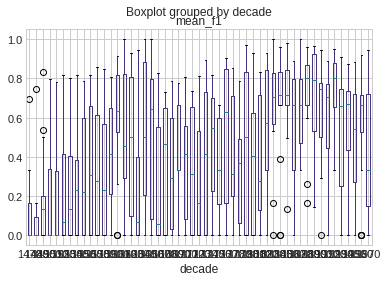

In [61]:
several_decades_results.boxplot("mean_f1",by="decade")

In [32]:
several_decades_results["decade"] = several_decades_results["decade"].astype(int)

In [33]:
several_decades_results.query("decade==1500")

class  mean_f1  mean_rec  mean_prec  \
5                                 Derecho    0.797     0.996      0.665   
0                    Artes y espectáculos    0.721     0.767      0.753   
6                   Historia y documentos    0.625     0.480      0.967   
12                     Verso lírico culto    0.463     0.311      1.000   
10                               Sociedad    0.296     0.333      0.278   
7         Novela y otras formas similares    0.167     0.167      0.167   
9                                Religión    0.000     0.000      0.000   
3   Ciencias exactas, físicas y naturales    0.000     0.000      0.000   
15            Verso narrativo tradicional    0.000     0.000      0.000   
8                   Prosa narrativa breve    0.000     0.000      0.000   
11                  Verso dramático breve    0.000     0.000      0.000   
2                      Ciencias aplicadas    0.000     0.000      0.000   
14                  Verso narrativo culto    0.000     0.000      0.000   
13               Verso lírico tradicional    0.000     0.000      0.000   
1                     Cartas y relaciones    0.000     0.000      0.000   
4         Ciencias sociales y humanidades    0.000     0.000      0.000   

    baseline  f1-baseline classifier_name text_representation   MFW  \
5        0.5        0.297              LR             zscores  3000   
0        0.5        0.221              LR             zscores  3000   
6        0.5        0.125              LR             zscores  3000   
12       0.5       -0.037              LR             zscores  3000   
10       0.5       -0.204              LR             zscores  3000   
7        0.5       -0.333              LR             zscores  3000   
9        0.5       -0.500              LR             zscores  3000   
3        0.5       -0.500              LR             zscores  3000   
15       0.5       -0.500              LR             zscores  3000   
8        0.5       -0.500              LR             zscores  3000   
11       0.5       -0.500              LR             zscores  3000   
2        0.5       -0.500              LR             zscores  3000   
14       0.5       -0.500              LR             zscores  3000   
13       0.5       -0.500              LR             zscores  3000   
1        0.5       -0.500              LR             zscores  3000   
4        0.5       -0.500              LR             zscores  3000   

    typography                                                f1s  \
5         True  [0.84 0.85 0.73 0.82 0.81 0.78 0.79 0.79 0.82 ...   
0         True  [0.86 0.75 0.4  0.86 0.75 0.67 0.8  0.67 0.8  ...   
6         True  [0.67 0.67 0.75 0.75 0.5  0.33 0.33 0.75 0.75 ...   
12        True  [0.4  0.6  0.6  0.44 0.25 0.44 0.25 0.44 0.6  ...   
10        True     [0.   0.67 1.   1.   0.   0.   0.   0.   0.  ]   
7         True                                [0. 0. 0. 0. 1. 0.]   
9         True                                      [0. 0. 0. 0.]   
3         True                                            [0. 0.]   
15        True                                      [0. 0. 0. 0.]   
8         True                                            [0. 0.]   
11        True                                         [0. 0. 0.]   
2         True                       [0. 0. 0. 0. 0. 0. 0. 0. 0.]   
14        True                                            [0. 0.]   
13        True                    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   
1         True                    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   
4         True                                   [0. 0. 0. 0. 0.]   

    test_result_pvalue                                             labels  \
5         2.428375e-09  archivo\nrepelon           0\nsanttorssub111  ...   
0         5.632840e-04  archivo\ndocupintsub3      1\nindiassub4      ...   
6         4.750870e-02  archivo\ndocupintsub14     0\ncarcolonsub91   ...   
12        4.217853e-01  archivo\nsanttorssub36     0\ndocmal2sub93    

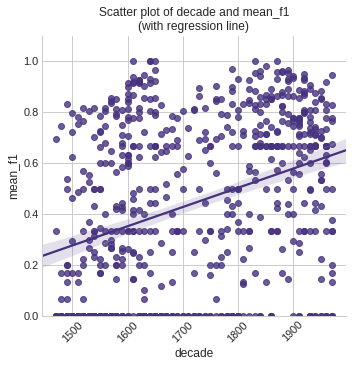

In [34]:
describe_data.describe_corpus_scatter(several_decades_results, wdir, "decade","mean_f1", "CORDE by decades", fit_reg=True)

In [35]:
from scipy import stats
stats.linregress(several_decades_results["decade"], several_decades_results["mean_f1"])

LinregressResult(slope=0.000754773432190926, intercept=-0.8555964711472475, rvalue=0.34644962871433144, pvalue=2.6662984660747724e-20, stderr=7.913127727563938e-05)

In [36]:
stats.linregress(several_decades_results["decade"], several_decades_results["mean_f1"])[0]*100

0.0754773432190926

In [37]:
stats.linregress(several_decades_results["sample_size"], several_decades_results["mean_f1"])

LinregressResult(slope=0.0012207545077225635, intercept=0.37589107406767225, rvalue=0.3992813503736041, pvalue=5.385511964131749e-27, stderr=0.00010853616556712292)

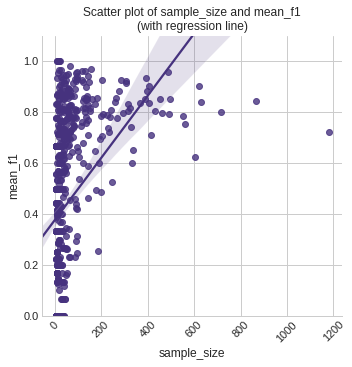

In [38]:
describe_data.describe_corpus_scatter(several_decades_results, wdir, "sample_size","mean_f1", "CORDE by centuries", fit_reg=True)


In [39]:
controled_sample_size_several_decades_results = several_decades_results.loc[(several_decades_results["sample_size"] > 10) &  (several_decades_results["sample_size"] < 30)]

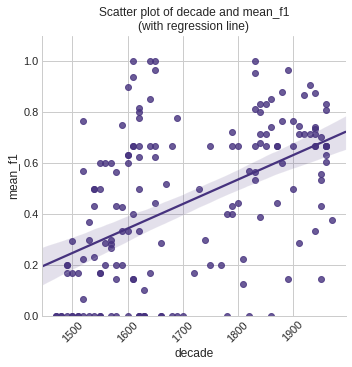

In [40]:
describe_data.describe_corpus_scatter(controled_sample_size_several_decades_results, wdir, "decade","mean_f1", "CORDE by decades, controlling sample size", fit_reg=True)

In [41]:
stats.linregress(controled_sample_size_several_decades_results["sample_size"], controled_sample_size_several_decades_results["mean_f1"])

LinregressResult(slope=0.009268164803950181, intercept=0.27190700576070537, rvalue=0.15391741017023203, pvalue=0.045071233807333244, stderr=0.004590342615870652)

# Visualizations for the Poster Slam

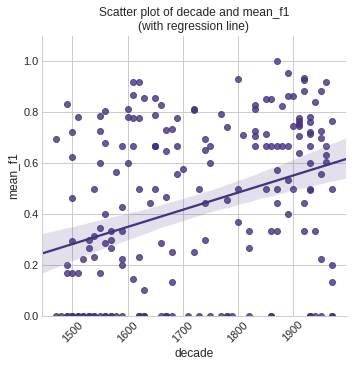

In [76]:
describe_data.describe_corpus_scatter(several_decades_results.sample(frac=0.3), wdir, "decade","mean_f1", "CORDE by decades (for slide)", fit_reg=True)

In [64]:
inversed_several_decades_results = several_decades_results.copy()

inversed_several_decades_results["decade"] = several_decades_results.sort_values(by="decade",ascending=False)["decade"].values.tolist()

In [77]:
inversed_several_decades_results.head()

class  mean_f1  mean_rec  mean_prec  baseline  \
3                   Derecho    0.695       1.0      0.534       0.5   
6  Verso lírico tradicional    0.333       0.5      0.250       0.5   
4     Historia y documentos    0.000       0.0      0.000       0.5   
5        Verso lírico culto    0.000       0.0      0.000       0.5   
1        Ciencias aplicadas    0.000       0.0      0.000       0.5   

   f1-baseline classifier_name text_representation   MFW  typography  \
3        0.195              LR             zscores  3000        True   
6       -0.167              LR             zscores  3000        True   
4       -0.500              LR             zscores  3000        True   
5       -0.500              LR             zscores  3000        True   
1       -0.500              LR             zscores  3000        True   

                                                 f1s  test_result_pvalue  \
3  [0.73 0.67 0.67 0.73 0.67 0.67 0.67 0.75 0.67 ...        5.482736e-08   
6                                        [0.67 0.  ]        7.048328e-01   
4                                         [0. 0. 0.]        0.000000e+00   
5                    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]        0.000000e+00   
1                                            [0. 0.]        0.000000e+00   

                                              labels  sample_size  cv  \
3  archivo\nnobili            0\ncancgomesub36   ...           68  10   
6  archivo\ntumbo1sub24       0\ncorfrenksub254  ...            4   2   
4  archivo\nnobili          1\ntumbo2sub217    0\...            6   3   
5  archivo\ncancgomesub81     1\ndocuara1sub139  ...           28  10   
1  archivo\nsanttorisub192    0\ngil             ...            4   2   

   sampling_times                                         classifier  decade  
3               1  LogisticRegression(C=1.0, class_weight=None, d...    1970  
6               1  LogisticRegression(C=1.0, class_weight=None, d...    1970  
4               1  LogisticRegression(C=1.0, class_weight=None, d...    1970  
5               1  LogisticRegression(C=1.0, class_weight=None, d...    1970  
1               1  LogisticRegression(C=1.0, class_weight=None, d...    1970

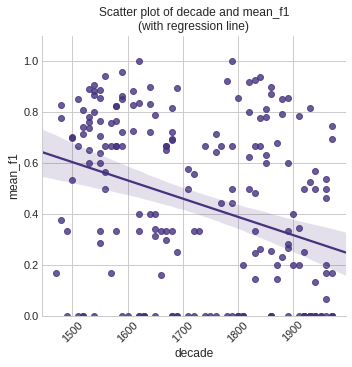

In [75]:
describe_data.describe_corpus_scatter(inversed_several_decades_results.sample(frac=0.3), wdir, "decade","mean_f1", "CORDE by decades (inversed)", fit_reg=True)

In [67]:
rand_several_decades_results = several_decades_results.copy()

rand_several_decades_results["decade"] = several_decades_results.sample(frac=1)["decade"].values.tolist()

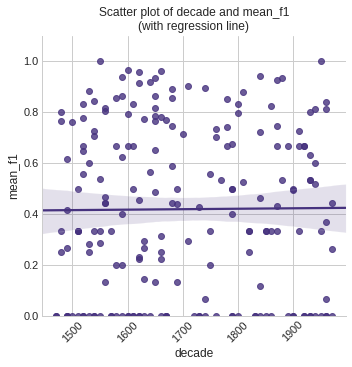

In [78]:
describe_data.describe_corpus_scatter(rand_several_decades_results.sample(frac=0.3), wdir, "decade","mean_f1", "CORDE by decades (rand)", fit_reg=True)